***The Movie Database Project***

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import scipy.stats as stats
import statsmodels.api as sm
from patsy import dmatrices
import re
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('movies.csv')
print(df.head(3))

                            Title  Rating  Year     Month Certificate Runtime   
0        Avatar: The Way of Water     7.8  2022  December       PG-13     192  \
1  Guillermo del Toro's Pinocchio     7.6  2022  December          PG     117   
2                    Bullet Train     7.3  2022    August           R     127   

                            Directors   
0                       James Cameron  \
1  Guillermo del Toro, Mark Gustafson   
2                        David Leitch   

                                               Stars   
0  Sam Worthington, Zoe Saldana, Sigourney Weaver...  \
1  Ewan McGregor, David Bradley, Gregory Mann, Bu...   
2  Brad Pitt, Joey King, Aaron Taylor Johnson, Br...   

                        Genre Filming_location         Budget   
0  Action, Adventure, Fantasy      New Zealand  $350,000,000   \
1    Animation, Drama, Family              USA   $35,000,000    
2    Action, Comedy, Thriller            Japan   $85,900,000    

            Income      

<class 'pandas.core.frame.DataFrame'>
Index: 1965 entries, 0 to 1999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Title              1965 non-null   object 
 1   Rating             1965 non-null   float64
 2   Year               1965 non-null   int64  
 3   Month              1965 non-null   object 
 4   Certificate        1965 non-null   object 
 5   Runtime            1965 non-null   int64  
 6   Directors          1965 non-null   object 
 7   Stars              1965 non-null   object 
 8   Genre              1965 non-null   object 
 9   Filming_location   1965 non-null   object 
 10  Budget             1965 non-null   object 
 11  Income             1965 non-null   object 
 12  Country_of_origin  1965 non-null   object 
dtypes: float64(1), int64(2), object(10)
memory usage: 214.9+ KB
None


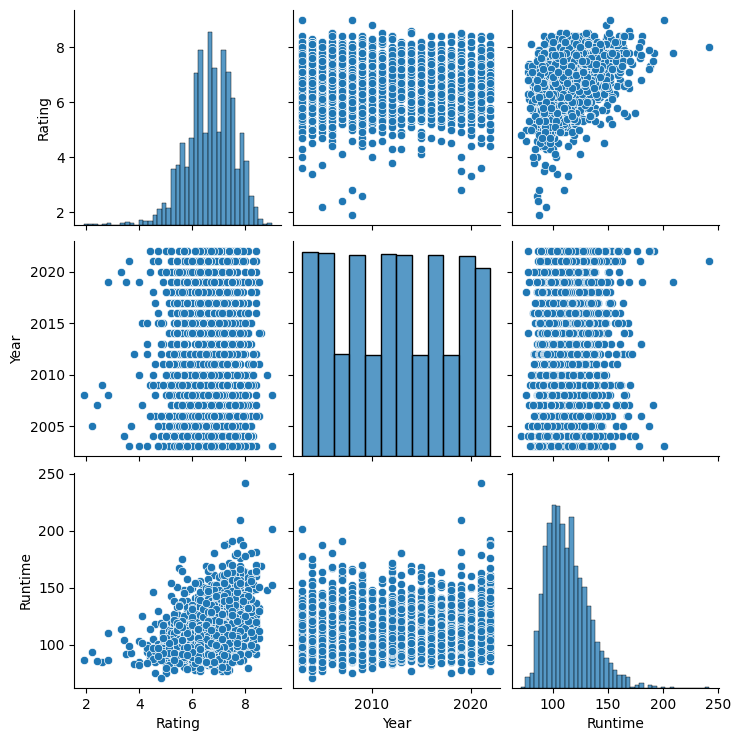

In [3]:
df = df.dropna(how="any")
df['Runtime'] = pd.to_numeric(df['Runtime'])
# df[df['Runtime'] == 0]
print(df.info())
sns.pairplot(df)

count    1965.000000
mean      113.375064
std        19.554673
min        71.000000
25%        99.000000
50%       110.000000
75%       124.000000
max       242.000000
Name: Runtime, dtype: float64


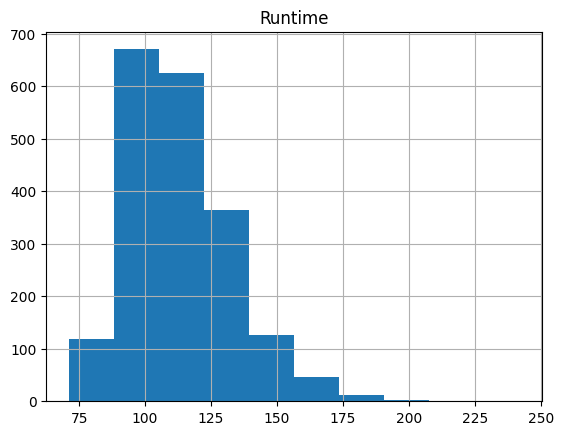

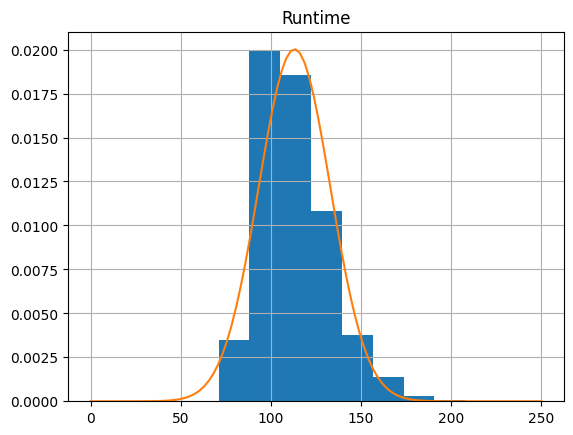

In [4]:
data = df['Runtime']
print(df["Runtime"].describe())
df.hist("Runtime")

x = np.linspace(0, 250, 100)
df.hist('Runtime', density = True)
plt.plot(x, stats.norm.pdf(x ,113.104500, 19.921998))

plt.show()

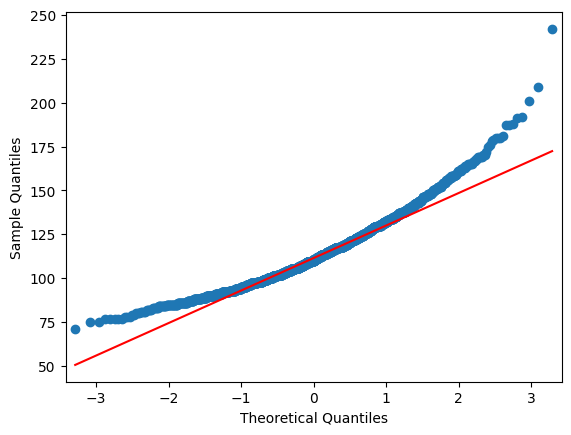

In [5]:
fig = sm.qqplot(data, line = 'q')
plt.show()

count    1965.000000
mean        6.673333
std         0.887783
min         1.900000
25%         6.200000
50%         6.700000
75%         7.300000
max         9.000000
Name: Rating, dtype: float64


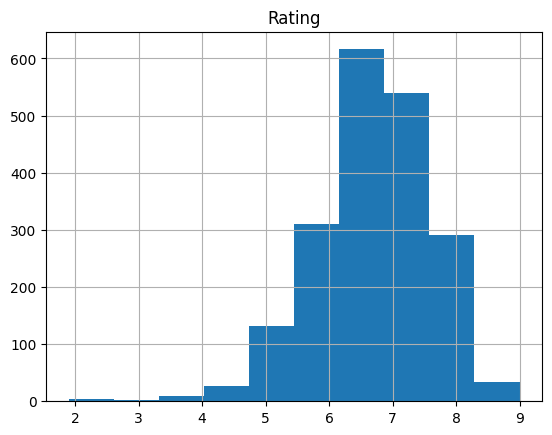

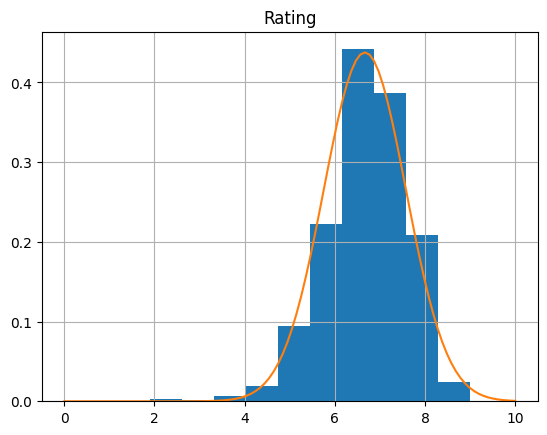

In [6]:
data = df['Rating']
print(df["Rating"].describe())
df.hist("Rating")

x = np.linspace(0, 10, 100)
df.hist('Rating', density = True)
plt.plot(x, stats.norm.pdf(x, 6.666583, 0.911704))

plt.show()

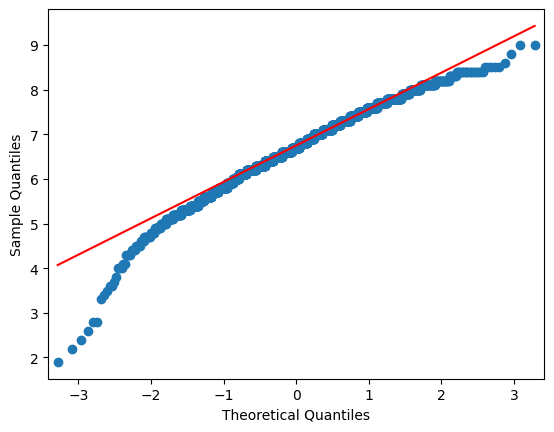

In [7]:
fig = sm.qqplot(data, line = 'q')
plt.show()

***Observations***

From what we can see already both the rating and the run time both seem to have a pretty normal disrtubution. None of them have a random secondary bell or something, which means that they follow some sort of pattern. This is shown by both the QQ-Plots and the normal distribution layed over the density histogram. So we will try to see the combinations between the two, create a 3d histogram and see what we can get going and eventually running the GMM from HW4.   

In [8]:
df['Runtime'].unique()
# df[df['Runtime'] == 201]

array([192, 117, 127, 114, 102, 132, 134, 112, 151, 107, 188, 105, 131,
       125, 126,  98, 101, 161, 140, 147, 139,  97, 154, 123, 130, 115,
       176,  87, 129, 104,  99,  93, 137, 128, 100, 148, 158,  96,  86,
       108,  89, 103, 135, 119, 136,  77, 118, 138, 159, 122, 187, 146,
       121, 116, 167, 141,  92, 155, 163, 106, 133,  88, 110, 150, 156,
       242, 109, 124, 143, 111, 152, 120,  90, 113, 144, 179, 142,  91,
        95, 160,  94,  85,  83, 181, 209, 169,  84, 149,  78,  75, 164,
       145,  82, 168, 165, 153, 180, 157, 172,  80, 162, 170,  79, 166,
        81, 191,  71, 175, 201, 178], dtype=int64)

In [9]:
df['Rating'].unique()

array([7.8, 7.6, 7.3, 6.4, 6.1, 6.9, 7.5, 6.6, 7. , 6.5, 6.7, 6.8, 5.8,
       8.1, 6.2, 5.1, 8.4, 7.1, 7.2, 5.2, 7.7, 7.4, 6.3, 4.4, 5.7, 5. ,
       7.9, 4.7, 5.5, 8. , 8.3, 3.6, 6. , 4.5, 5.4, 5.9, 3.3, 8.2, 5.3,
       4.9, 5.6, 4.8, 8.5, 2.8, 3.5, 4. , 4.6, 4.1, 4.3, 8.6, 3.8, 8.8,
       2.6, 9. , 1.9, 2.4, 3.7, 2.2, 3.4])

In [10]:
BI = df[(df['Budget'] != 'Unknown')]
BI = df[(df['Income'] != 'Unknown')]
# print(len(BI))
# print(len(df) - len(BI))


In [11]:
def convert(val):
    # South Korean Won ₩ to USD 1.00 --> 0.00075
    USD = 0
    if "₩" in val:
        new_val = val.replace("₩", "").replace(",", "")
        USD = int(new_val) * 0.00075
    # Canadian Dollar CA$ to USD 1.00 --> 0.74
    elif "CA$" in val:
        new_val = val.replace("CA$", "").replace(",", "")
        USD = int(new_val) * 0.74
    # Euro € to USD 1.00 --> 1.10
    elif "€" in val:
        new_val = val.replace("€", "").replace(",", "")
        USD = int(new_val)*1.10
    # Pound Sterling £ to USD 1.00 --> 1.24
    elif "£" in val:
        new_val = val.replace("£", "").replace(",", "")
        USD = int(new_val)*1.24    
    # Australian Dollar A$ to USD 1.00 --> .67
    elif "A$" in val:
        new_val = val.replace("A$", "").replace(",", "")
        USD = int(new_val)*0.67      
    # Swedish Krona SEK to USD 1.00 --> 0.097
    elif "SEK\xa0" in val:
        new_val = val.replace("SEK\xa0", "").replace(",", "")
        USD = int(new_val)*0.097      
    # Danish Krone DKK to USD 1.00 --> 0.15
    elif "DKK\xa0" in val:
        new_val = val.replace("DKK\xa0", "").replace(",", "")
        USD = int(new_val)*0.15     
    # Norwegian Krone NOK to USD 1.00 --> 0.094
    elif "NOK\xa0" in val:
        new_val = val.replace("NOK\xa0", "").replace(",", "")
        USD = int(new_val)*0.094     
    # Indian Rupee ₹ to USD 1.00 --> 0.012
    elif "₹" in val:
        new_val = val.replace("₹", "").replace(",", "")
        USD = int(new_val)*0.094       
    # Chinese Yuan CN¥ to USD 1.00 --> 0.15
    elif "CN¥" in val:
        new_val = val.replace("CN¥", "").replace(",", "")
        USD = int(new_val)*0.15     
    # Japanese Yen ¥ to USD 1.00 --> 0.0075
    elif "¥" in val:
        new_val = val.replace("¥", "").replace(",", "")
        USD = int(new_val)*0.0075
    # Our own USD $ last to pervent confusion between CA$ and A$
    elif "$" in val:
        new_val = val.replace("$", "").replace(",", "")
        USD = int(new_val)
        
    return USD 


In [12]:
BI.loc[:, 'Budget'] = BI.loc[:, 'Budget'].apply(convert)
BI.loc[:, 'Income'] = BI.loc[:, 'Income'].apply(convert)

netGain = BI.loc[:, 'Income'] - BI.loc[:, 'Budget']
netGain

0       1917946983.0
1        -34891033.0
2        153368602.0
3         19720823.0
4        159253910.0
            ...     
1995       1062878.0
1996      65099222.0
1997     101591324.0
1998      20235426.0
1999      54183487.0
Length: 1839, dtype: object

Text(0.5, 1.0, 'Income vs. rating:')

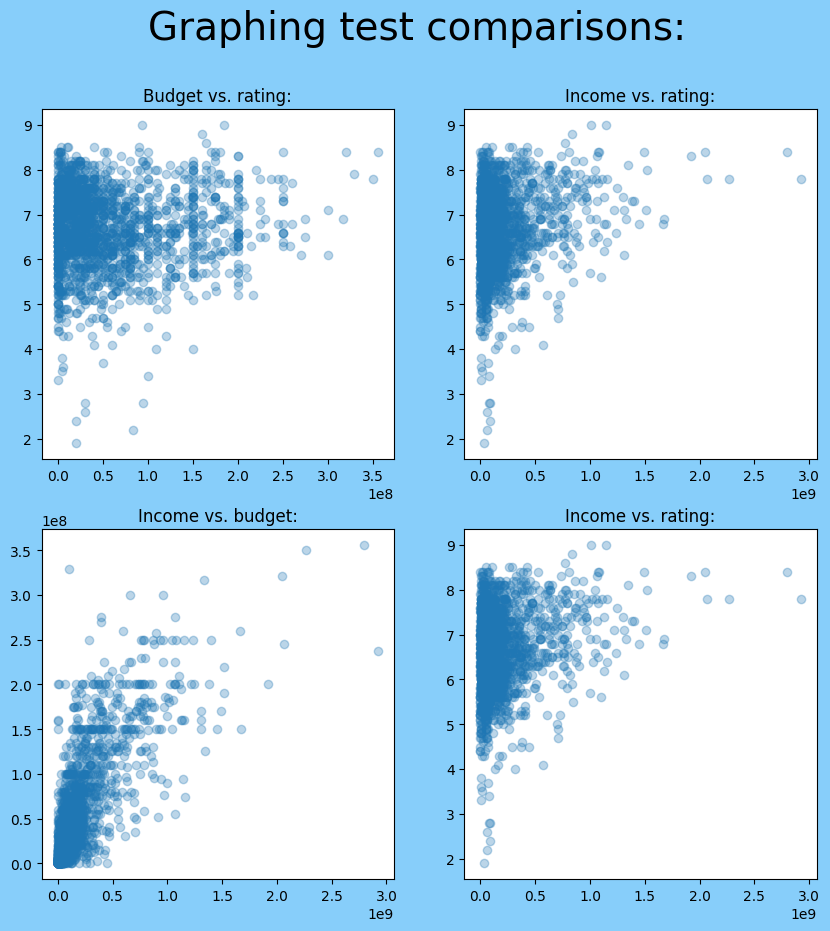

In [13]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10), facecolor='lightskyblue')
fig.suptitle("Graphing test comparisons:", fontsize=28)
ax[0, 0].scatter(BI['Budget'], BI['Rating'], alpha = 0.3)
ax[0, 0].set_title('Budget vs. rating:')
ax[0, 1].scatter(BI['Income'], BI['Rating'], alpha = 0.3)
ax[0, 1].set_title('Income vs. rating:')
ax[1, 0].scatter(BI['Income'], BI['Budget'], alpha = 0.3)
ax[1, 0].set_title('Income vs. budget:')
ax[1, 1].scatter(BI['Income'], BI['Rating'], alpha = 0.3)
ax[1, 1].set_title('Income vs. rating:')

Nan indices: []
[-226026838.0, -199545977.0, -185600000.0, -159821857.0, -158031147.0, -149962647.0, -130034626.0, -79929541.0, -74208137.0, -71331093.0, -70050595.0, -69447889.0, -57829155.0, -57072292.0, -54887223.0, -51675780.0, -50347943.0, -48754190.0, -47950177.0, -43440840.0, -43246177.0, -41577912.0, -41516203.0, -39117072.0, -37070316.0, -36941707.0, -36064237.0, -35067379.0, -34891033.0, -33059958.0, -32819548.0, -32702475.0, -32589251.0, -32217375.0, -31370522.0, -31222446.0, -30499639.0, -30397994.0, -29874313.0, -29506467.0, -29199769.0, -28984240.0, -26720000.0, -26661310.0, -26476717.0, -26330535.0, -26324934.0, -26054234.0, -25995050.0, -25592384.0, -24939118.0, -24838507.0, -24813233.0, -24529846.0, -24018452.0, -23983829.0, -23797119.0, -23216161.0, -22165191.0, -21635723.0, -21611680.0, -21602540.0, -20889706.0, -20370805.0, -20099408.0, -20042375.0, -19441075.0, -19407820.0, -19203370.0, -18531657.0, -18266314.0, -18033366.0, -17897621.0, -17854041.0, -17830406.0, -

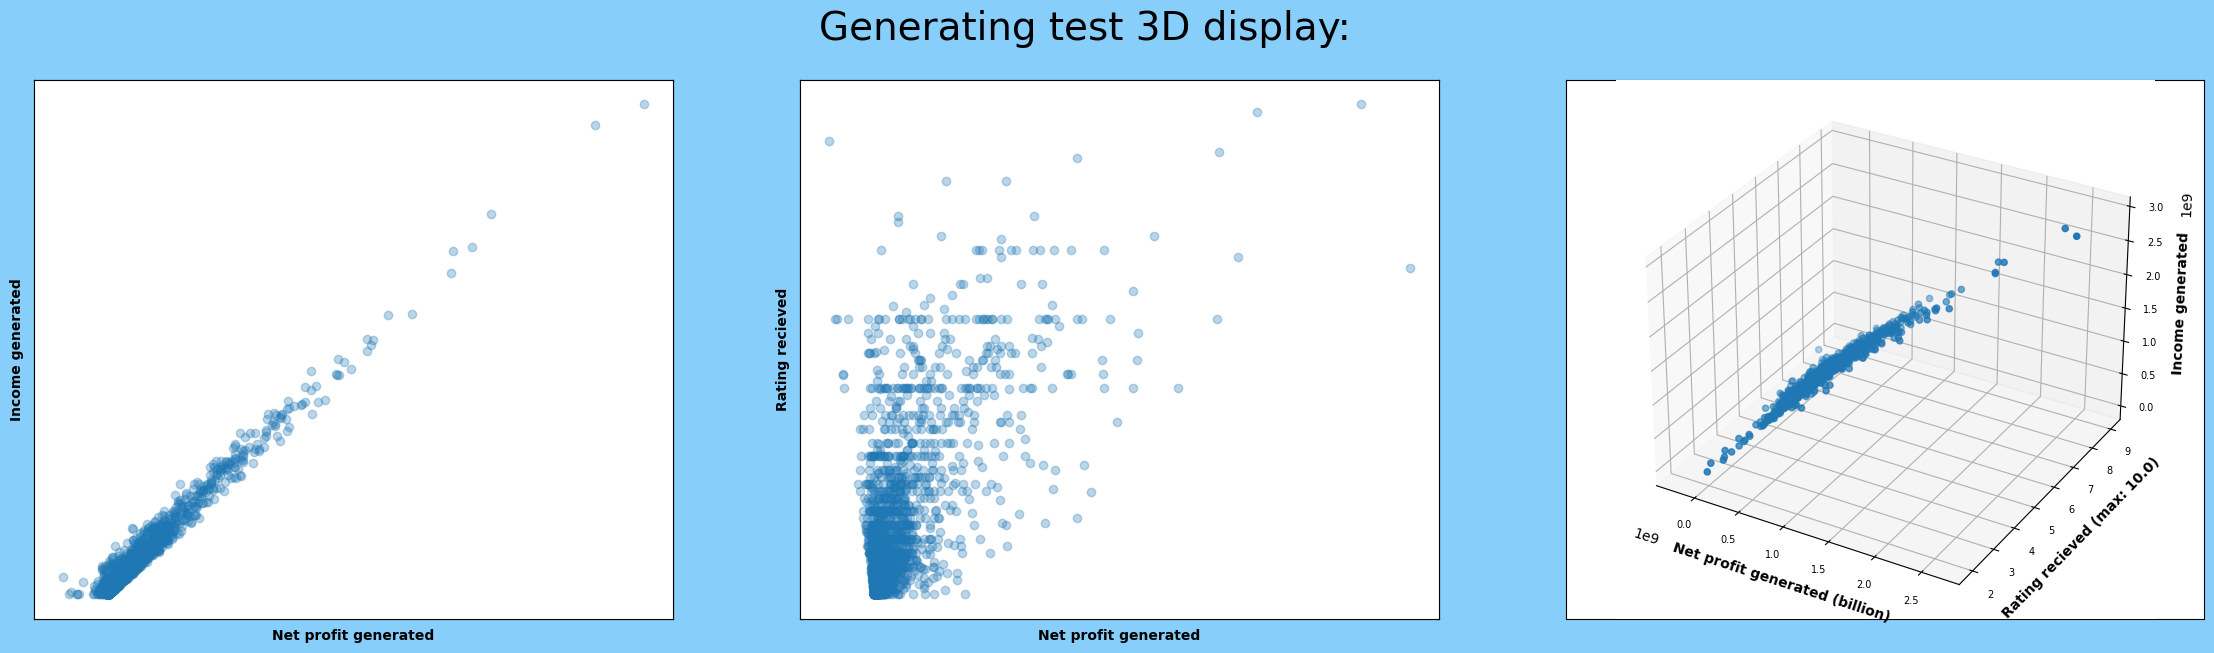

In [14]:
# Combining above plots into subplot display.
fig, ax = plt.subplots(1, 3, figsize=(28, 7), facecolor="lightskyblue")
fig.suptitle("Generating test 3D display:", fontsize=28)

# 2D projection for first two plots.
ax[0] = fig.add_subplot(1, 3, 1)
ax[1] = fig.add_subplot(1, 3, 2)
ratings = BI[(BI["Rating"] != 'nan')]

# Proving that no NaN values exist in Ratings column.
nans_indices = ratings.columns[ratings.isna().any()].tolist()
print(f"Nan indices: {nans_indices}")

sorted_rats = ratings["Rating"].sort_values(ascending=True).tolist()

print(netGain.sort_values(ascending=True).tolist())
sorted_gains = netGain.sort_values(ascending=True).tolist()

x_ticks = np.linspace(sorted_gains[-1], sorted_gains[0], num=7)
print(f'x_ticks: {x_ticks}')

# Graph 1: Net profit vs. income.
ax[0].scatter(netGain, BI['Income'], alpha=0.3)
ax[0].set_xlabel('Net profit generated', fontweight ='bold')
ax[0].set_ylabel('Income generated', fontweight ='bold')
ax[0].tick_params(axis='both', which='both', labelsize=7, labelbottom=True)

# plt.setp(plt.gcf().get_axes(), xticks=x_ticks, yticks=x_ticks)   # Setting tick marks on axes.
# BI = BI[(BI['Income'] != 'Unknown')]

# Graph 2: Rating vs. income.
ax[1].scatter(netGain, BI['Budget'], alpha=0.3)
ax[1].set_xlabel('Net profit generated', fontweight ='bold')
ax[1].set_ylabel('Rating recieved', fontweight ='bold')
ax[1].tick_params(axis='both', which='both', labelsize=7)

plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[])   # Setting tick marks on axes.

# Graph 3: 3D projection of both comparisons.
ax[2] = fig.add_subplot(1, 3, 3, projection="3d")
ax[2].scatter(netGain, BI['Rating'], BI['Income'])
ax[2].set_xlabel('Net profit generated (billion)', fontweight ='bold')
ax[2].set_ylabel('Rating recieved (max: 10.0)', fontweight ='bold')
ax[2].set_zlabel('Income generated', fontweight ='bold')
ax[2].tick_params(axis='both', which='both', labelsize=7)

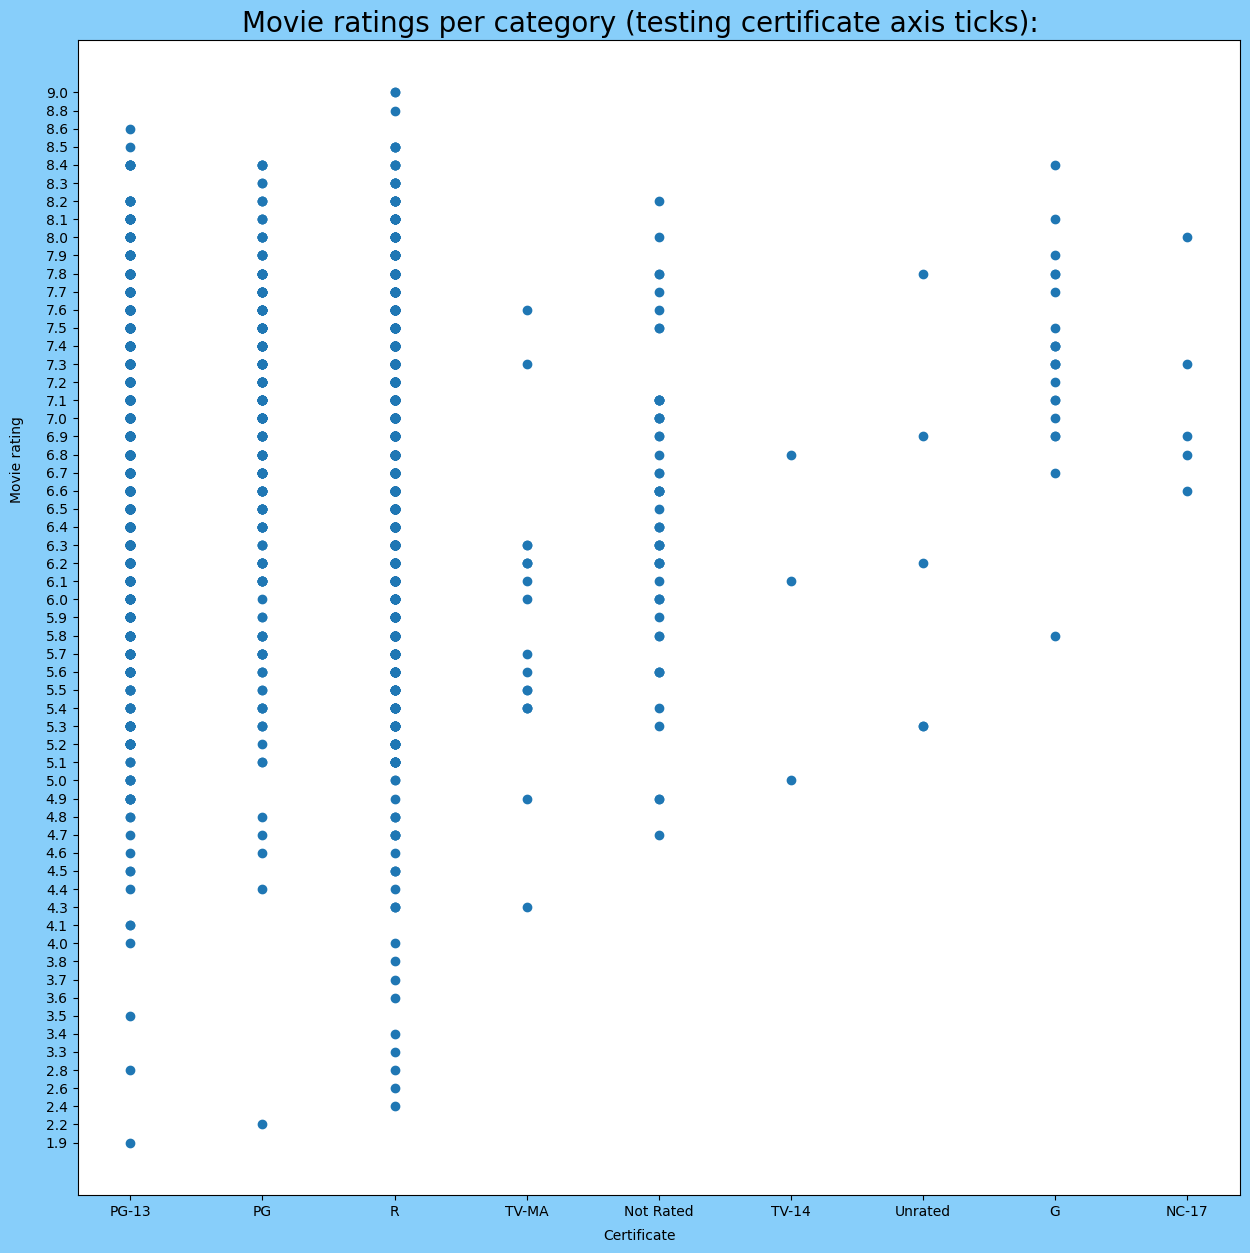

In [15]:
# Generating genre / certificate scatter plot.
fig, ax = plt.subplots(1, 1, figsize=(15, 15), facecolor="lightskyblue")
fig.text(0.5, 0.08, "Certificate", ha='center')
fig.text(0.08, 0.6, "Movie rating", va='center', rotation='vertical')
fig.suptitle('Movie ratings per category (testing certificate axis ticks):', fontsize=20, y=0.9)
ax.scatter(BI['Certificate'].astype(str), BI['Rating'].sort_values(ascending=True).astype(str))

In [16]:
def GMM(dat, k):    
    # Defining variables for use in algorithm.
    p_class = np.zeros(k)
    means = np.zeros((k, 2))
    covars = np.zeros((k, 2, 2))
    p_data_given_class = np.zeros((len(dat), k))
    mean_dist = np.array(0)
    init_idx = np.random.choice(range(len(dat)), size=k, replace=False)
    
    """ Initializing means, covs, p_classes. """
    for dim in range(k):
        covars[dim, :, :] = np.cov(np.transpose(dat).astype(float))
        means[dim, :] = dat.iloc[init_idx[dim]]
        p_class[dim] = 1/k
        
        
    for _ in range(200):  
        """ Expectation step. """
        for dim in range(k):
            p_data_given_class[:,dim]=  np.array([stats.multivariate_normal.pdf(x=dat, mean=means[dim,:], cov=covars[dim,:,:], allow_singular=True)])
            
        p_class_given_data=p_data_given_class*p_class

        sums=np.sum(p_class_given_data, axis=1)

        for dim in range(k):
            p_class_given_data[:,dim] = p_class_given_data[:, dim] * (1/sums)
        
        """ Maximization step. """
        n_class = np.sum(p_class_given_data, axis=0)

        p_class = n_class / len(dat)

        for dim in range(k): 
            means[dim, 0] = np.sum(p_class_given_data[:, dim] * dat.iloc[:, 0]) * (1/n_class[dim])
            means[dim, 1] = np.sum(p_class_given_data[:, dim] * dat.iloc[:, 1]) * (1/n_class[dim])
            
            X_new = dat.copy()
            X_new.iloc[:,0] = X_new.iloc[:,0] - means[dim,0]
            X_new.iloc[:,1] = X_new.iloc[:,1] - means[dim,1]            
            
            covars[dim, :, :] = np.matmul((np.asarray(X_new).T) * (p_class_given_data[:,dim]) ,X_new) / (n_class[dim])
                                               
    mean_dist = 0
    for pt in range(len(dat)):
        for dim in range(k): 
            mean_dist += np.sqrt(np.sum((means[dim, :] - np.array(dat.iloc[pt])) ** 2) * p_class_given_data[pt,dim])
    mean_dist = mean_dist/(len(dat)*k)

    return p_class_given_data, means, covars, p_class, mean_dist

First I ran some ks on **rating vs budget** to see what the ideal k would be for this it happens to be k=4. And the plots with k=4 is the only one with the actual upper decade comparison. As we go along for something like month we see its something like k=8 to be a better predictor. 

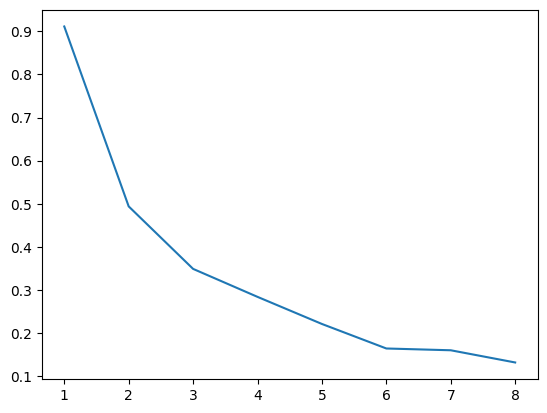

In [17]:
def M_to_num(val):
    dic_month = {'January':1,'February':2,'March':3,'April':4,'May':5, 'June':6,'July':7, 
             'August':8,'September':9,'October':10,'November':11,'December':12}
 
    num = dic_month[val]
    
    return num

def C_to_idx(val):
    cert_dict = {
        'G': 0, 'PG': 1, 'PG-13': 2, 'TV-14': 3, 
        'R': 4, 'NC-17': 5, 'TV-MA': 6, 'Unrated': 7, 'TV-PG': 8, 'TV-Y7': 9, 'TV-G': 10
    }
    return cert_dict[val]

df2 = df.copy()
df2 = df2[df2['Certificate'] != 'Not Rated']
df2.loc[:, 'Certificate'] = df2['Certificate'].apply(C_to_idx)
df2['Certificate'] = df2["Certificate"].replace(8, 1)
df2['Certificate'] = df2["Certificate"].replace(9, 3)
df2['Certificate'] = df2['Certificate'].replace(10, 0)
df2 = df2[(df2['Budget'] != 'Unknown')]
df2 = df2[(df2['Income'] != 'Unknown')]
df2 = df2[df2['Month'] != '2008']
df2.loc[:,'Budget'] = df2.loc[:,'Budget'].apply(convert)
df2.loc[:,'Income'] = df2.loc[:,'Income'].apply(convert)
df2.loc[:,'Month'] = df2.loc[:,'Month'].apply(M_to_num)
df2['Profit'] = (df2['Income'].astype(float) - df2['Budget'].astype(float))/1000000000
df2['Income'] = df2['Income'].astype(float).div(1000000000)
df2['Income'] = df2['Income'].astype(float).div(1000000000)
df2['Budget'] = df2['Budget'].astype(float).div(100000000)

# Splitting data into decades.
pe50 = df2[df2['Year'] <=2012]
up50 = df2[df2['Year'] > 2012]

pmi1, mu1, sig1, p1, d1 = GMM(pe50[['Rating', 'Budget']],1)
pmi2, mu2, sig2, p2, d2 = GMM(pe50[['Rating', 'Budget']],2)
pmi3, mu3, sig3, p3, d3 = GMM(pe50[['Rating', 'Budget']],3)
pmi4, mu4, sig4, p4, d4 = GMM(pe50[['Rating', 'Budget']],4)
pmi5, mu5, sig5, p5, d5 = GMM(pe50[['Rating', 'Budget']],5)
pmi6, mu6, sig6, p6, d6 = GMM(pe50[['Rating', 'Budget']],6)
pmi7, mu7, sig7, p7, d7 = GMM(pe50[['Rating', 'Budget']],7)
pmi8, mu8, sig8, p8, d8 = GMM(pe50[['Rating', 'Budget']],8)

plt.plot([1,2,3,4,5,6,7,8], [d1,d2,d3,d4,d5,d6,d7,d8])

In [18]:
sim2=np.zeros((len(pe50), 2))
sim3=np.zeros((len(pe50), 2))
sim4=np.zeros((len(pe50), 2))
sim5=np.zeros((len(pe50), 2))
sim6=np.zeros((len(pe50), 2))
sim7=np.zeros((len(pe50), 2))
sim8=np.zeros((len(pe50), 2))

for i in range(len(pe50)): 
    cluster=np.random.choice(range(2), p=p2)
    sim2[i,:]=stats.multivariate_normal.rvs(mean=mu2[cluster,:], cov=sig2[cluster,:,:])
    
    cluster=np.random.choice(range(3), p=p3)
    sim3[i,:]=stats.multivariate_normal.rvs(mean=mu3[cluster,:], cov=sig3[cluster,:,:])
    
    cluster=np.random.choice(range(4), p=p4)
    sim4[i,:]=stats.multivariate_normal.rvs(mean=mu4[cluster,:], cov=sig4[cluster,:,:])
    
    cluster=np.random.choice(range(5), p=p5)
    sim5[i,:]=stats.multivariate_normal.rvs(mean=mu5[cluster,:], cov=sig5[cluster,:,:])
    
    cluster=np.random.choice(range(6), p=p6)
    sim6[i,:]=stats.multivariate_normal.rvs(mean=mu6[cluster,:], cov=sig6[cluster,:,:])
    
    cluster=np.random.choice(range(7), p=p7)
    sim7[i,:]=stats.multivariate_normal.rvs(mean=mu7[cluster,:], cov=sig7[cluster,:,:])
    
    cluster=np.random.choice(range(8), p=p8)
    sim8[i,:]=stats.multivariate_normal.rvs(mean=mu8[cluster,:], cov=sig8[cluster,:,:])

Text(0.5, 1.0, 'k=2 GMM Sim')

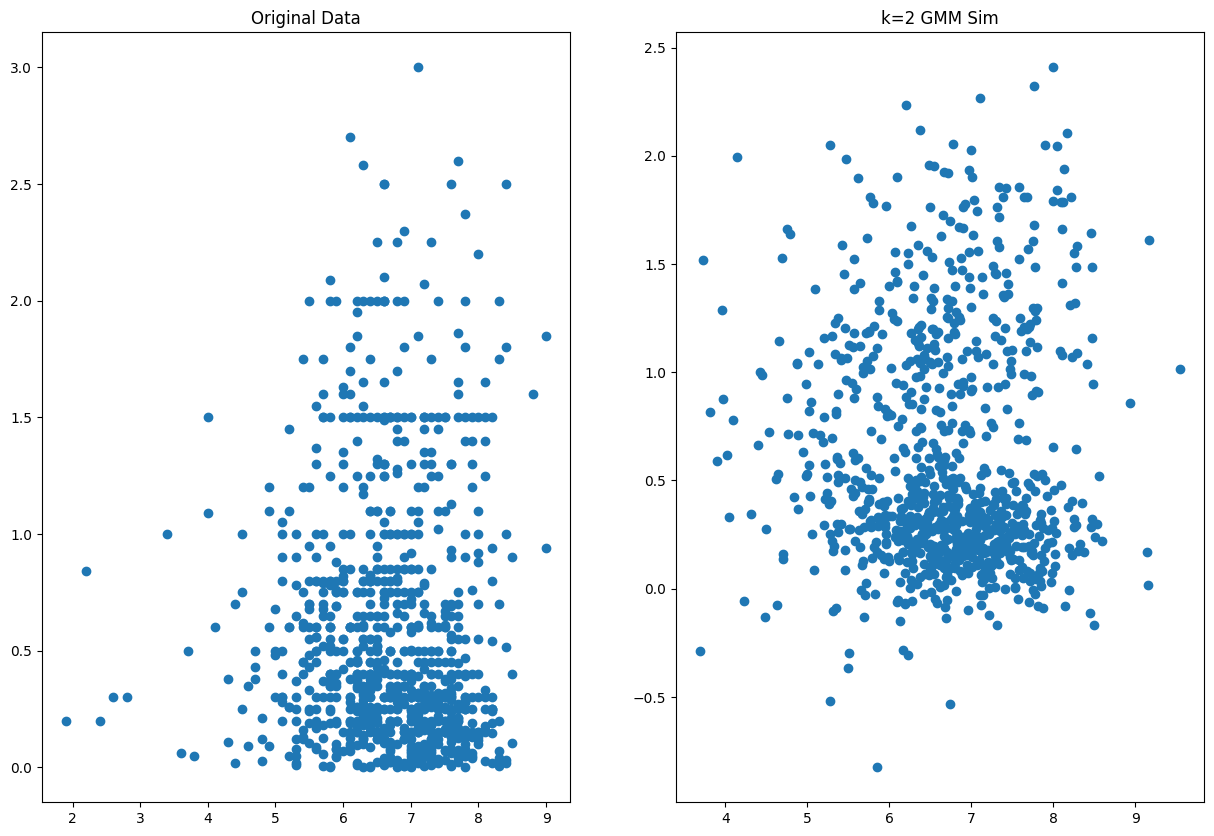

In [19]:
fig, ax = plt.subplots(figsize=(15,10), ncols=2)
ax[0].scatter(pe50['Rating'], pe50['Budget'])
ax[0].set_title('Original Data')
ax[1].scatter(sim2[:,0],sim2[:,1])
ax[1].set_title('k=2 GMM Sim')

Text(0.5, 1.0, 'k=3 GMM Sim')

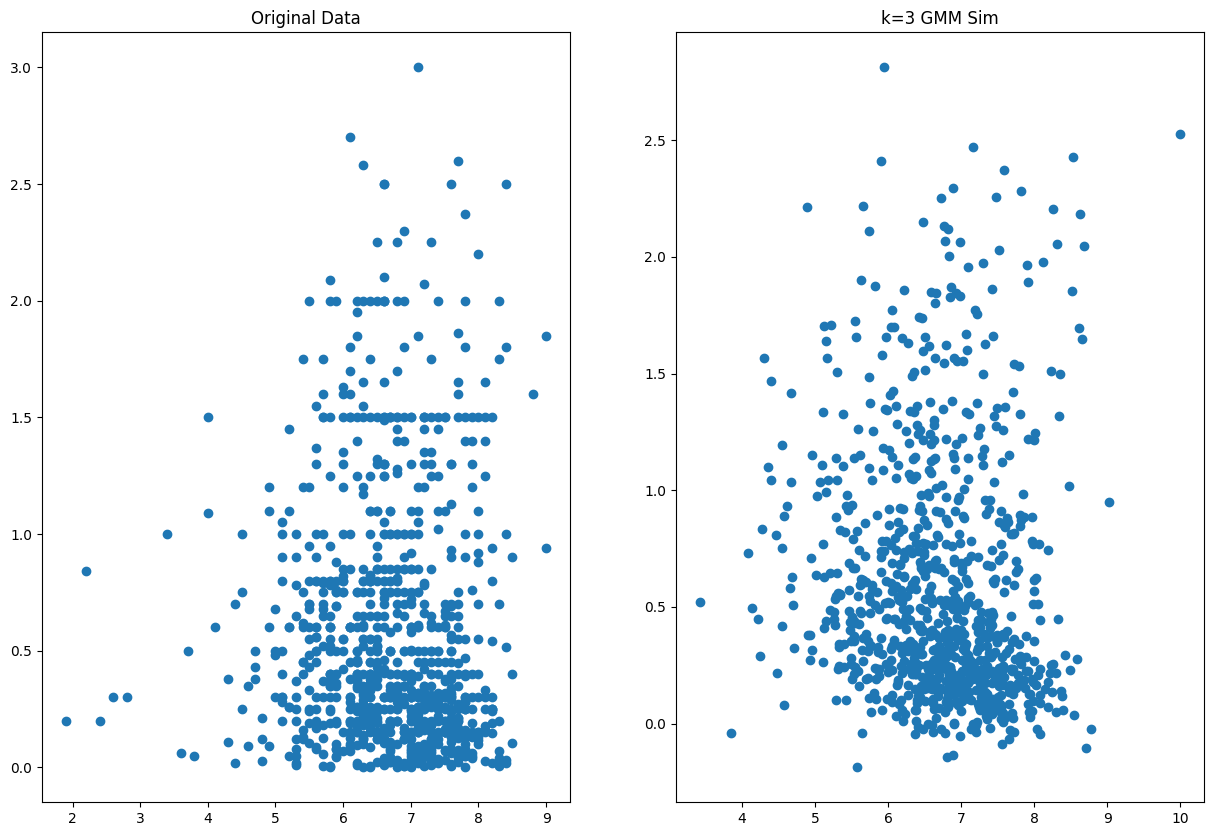

In [20]:
fig, ax = plt.subplots(figsize=(15,10), ncols=2)
ax[0].scatter(pe50['Rating'], pe50['Budget'])
ax[0].set_title('Original Data')
ax[1].scatter(sim3[:,0],sim3[:,1])
ax[1].set_title('k=3 GMM Sim')

Text(0.5, 1.0, 'Actual Second Decade Data')

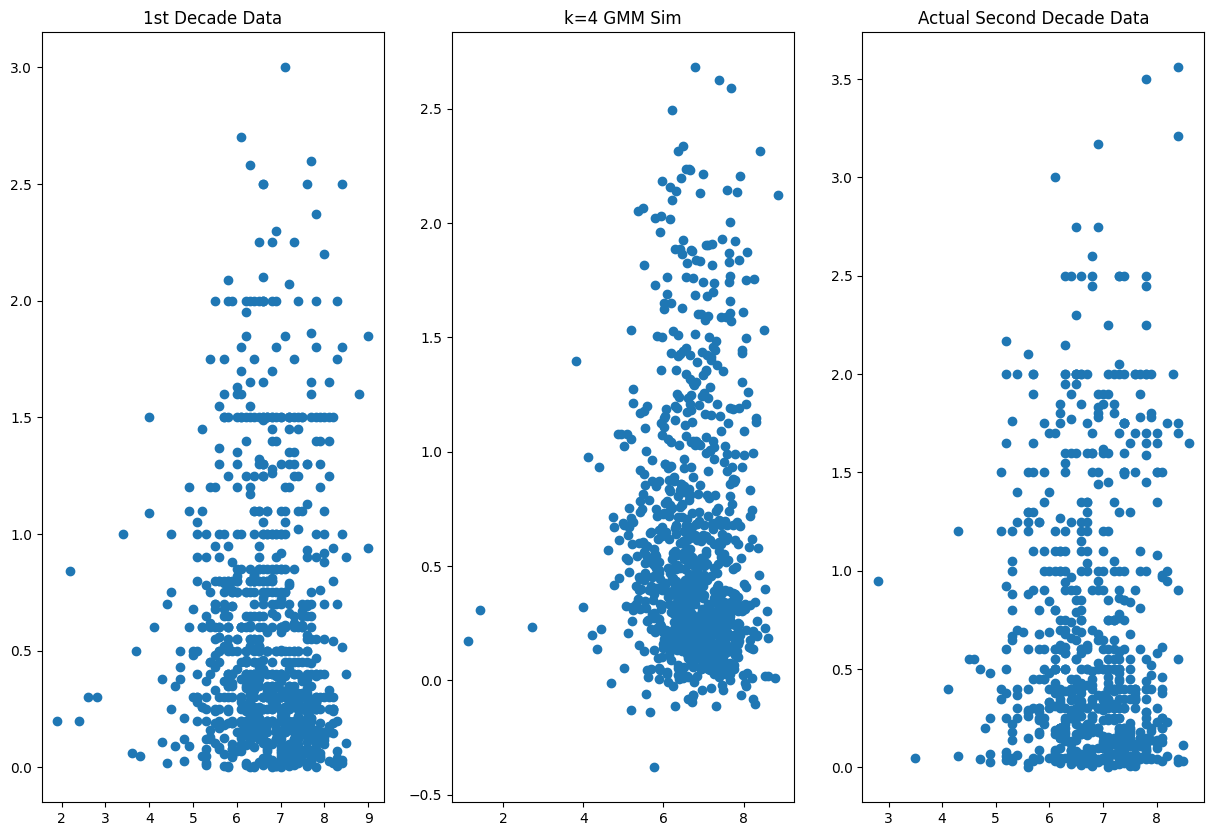

In [21]:
fig, ax = plt.subplots(figsize=(15,10), ncols=3)
ax[0].scatter(pe50['Rating'], pe50['Budget'])
ax[0].set_title('1st Decade Data')
ax[1].scatter(sim4[:,0],sim4[:,1])
ax[1].set_title('k=4 GMM Sim')
ax[2].scatter(up50['Rating'],up50['Budget'])
ax[2].set_title('Actual Second Decade Data')

Text(0.5, 1.0, 'k=5 GMM Sim')

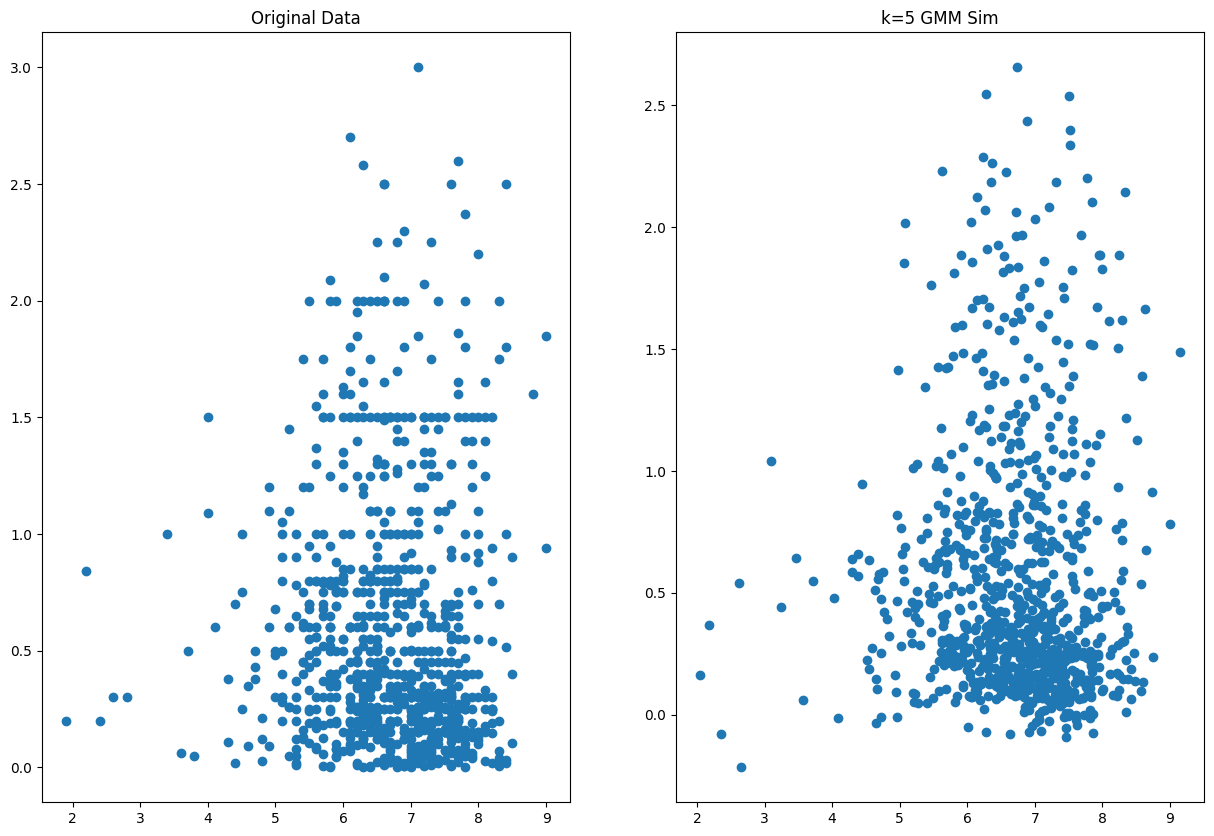

In [22]:
fig, ax = plt.subplots(figsize=(15,10), ncols=2)
ax[0].scatter(pe50['Rating'], pe50['Budget'])
ax[0].set_title('Original Data')
ax[1].scatter(sim5[:,0],sim5[:,1])
ax[1].set_title('k=5 GMM Sim')

Text(0.5, 1.0, 'k=6 GMM Sim')

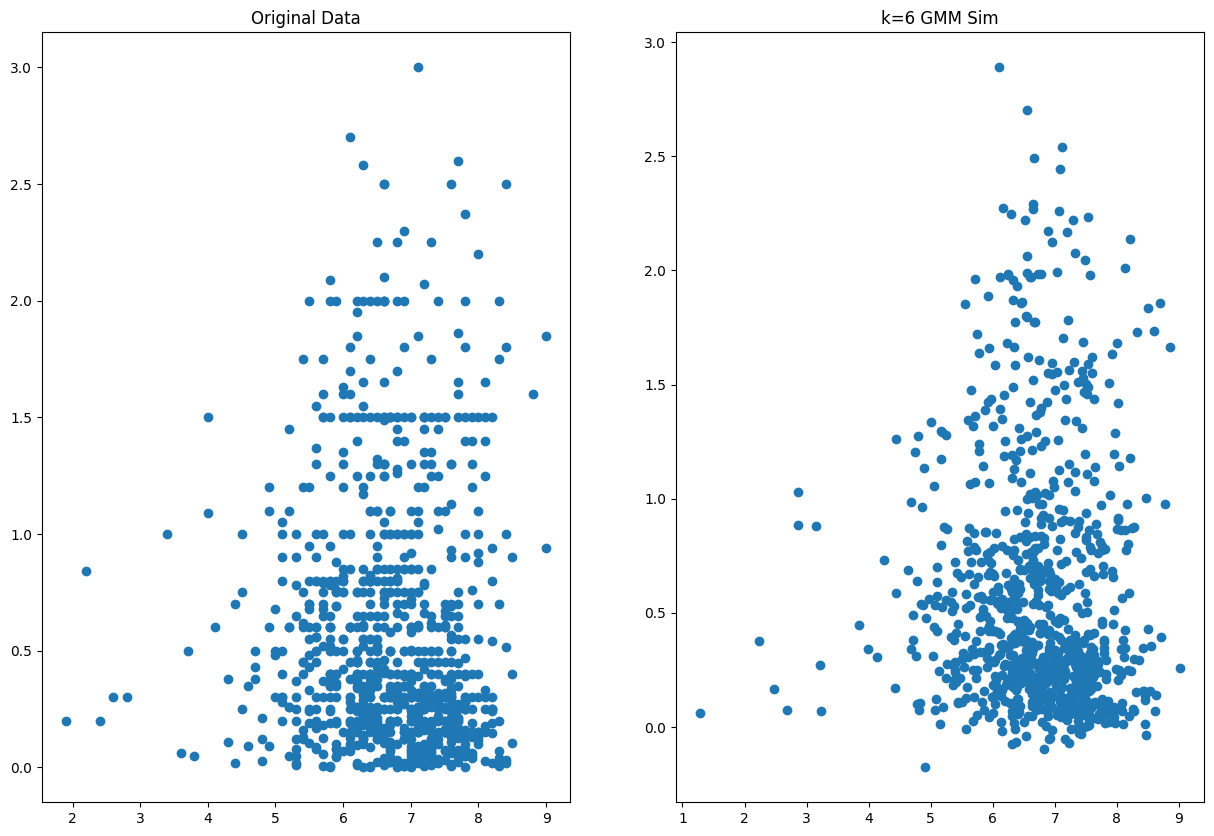

In [23]:
fig, ax = plt.subplots(figsize=(15,10), ncols=2)
ax[0].scatter(pe50['Rating'], pe50['Budget'])
ax[0].set_title('Original Data')
ax[1].scatter(sim6[:,0],sim6[:,1])
ax[1].set_title('k=6 GMM Sim')

Text(0.5, 1.0, 'k=7 GMM Sim')

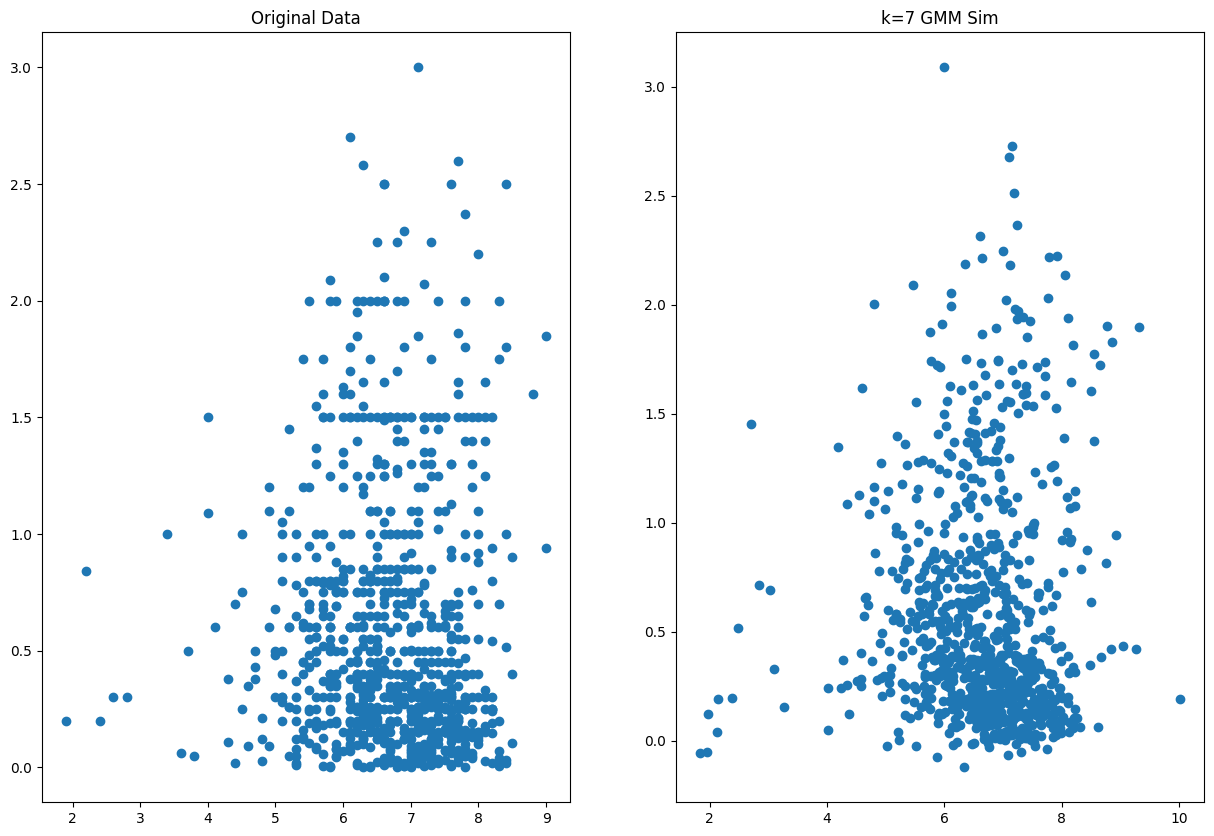

In [24]:
fig, ax = plt.subplots(figsize=(15,10), ncols=2)
ax[0].scatter(pe50['Rating'], pe50['Budget'])
ax[0].set_title('Original Data')
ax[1].scatter(sim7[:,0],sim7[:,1])
ax[1].set_title('k=7 GMM Sim')

Text(0.5, 1.0, 'k=8 GMM Sim')

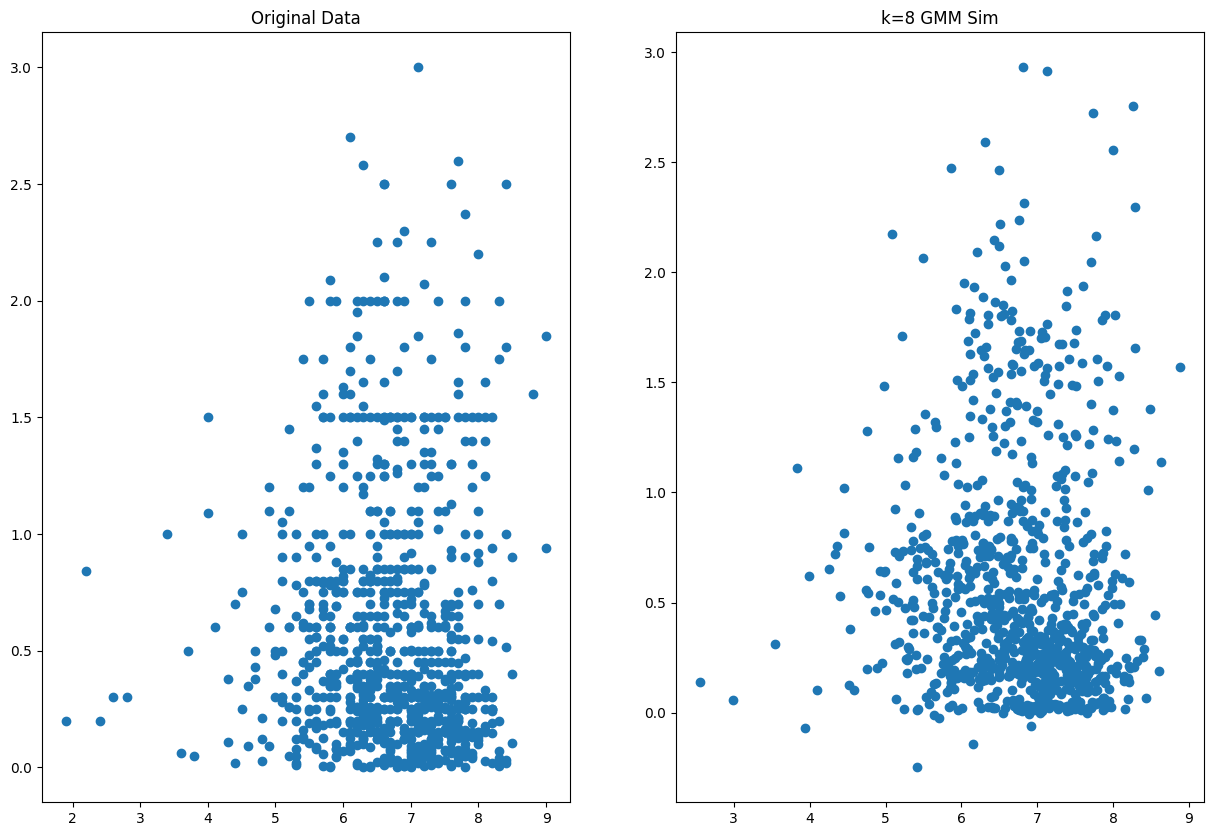

In [25]:
fig, ax = plt.subplots(figsize=(15,10), ncols=2)
ax[0].scatter(pe50['Rating'], pe50['Budget'])
ax[0].set_title('Original Data')
ax[1].scatter(sim8[:,0],sim8[:,1])
ax[1].set_title('k=8 GMM Sim')

**Rating vs. Profit**

Text(0.5, 1.0, 'Actual Second Decade Data')

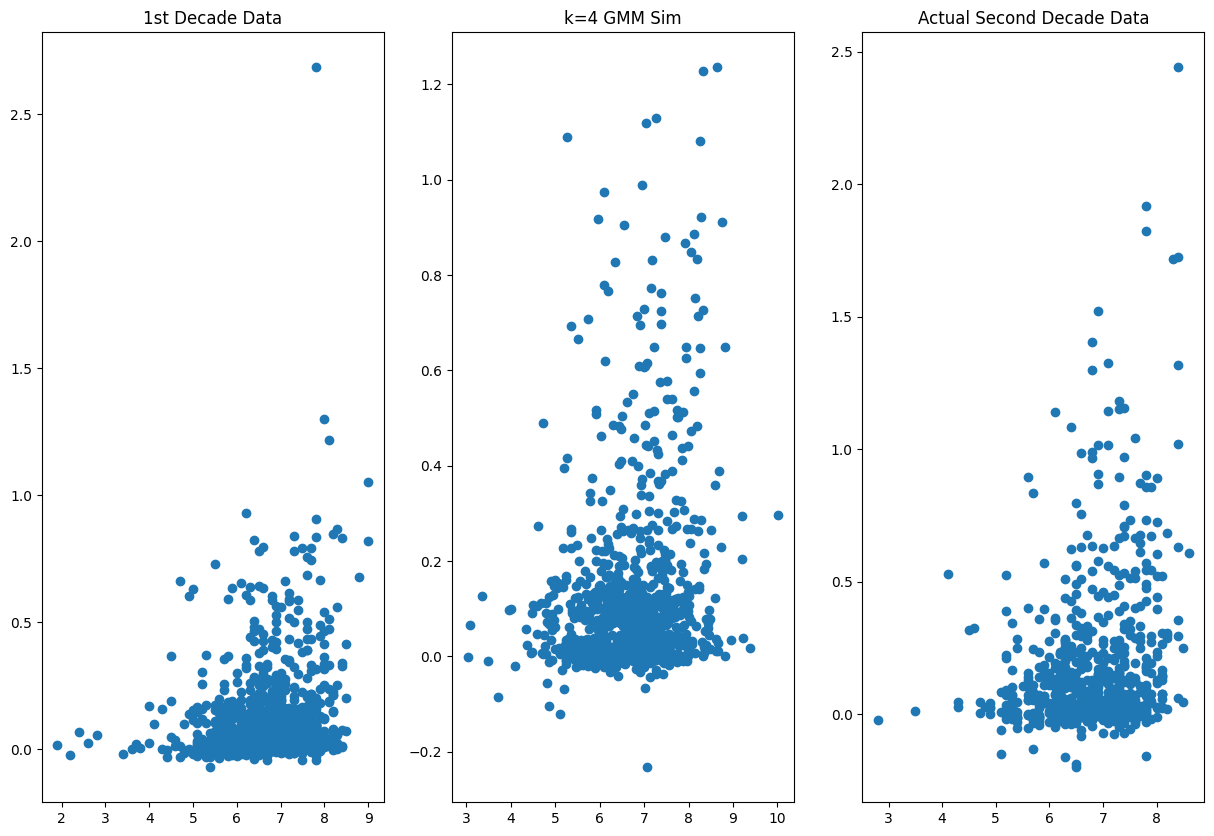

In [26]:
pmi4, mu4, sig4, p4, d4 = GMM(pe50[['Rating', 'Profit']],4)

sim4=np.zeros((len(pe50), 2))

for i in range(len(pe50)):     
    cluster=np.random.choice(range(4), p=p4)
    sim4[i,:]=stats.multivariate_normal.rvs(mean=mu4[cluster,:], cov=sig4[cluster,:,:])
    
    
fig, ax = plt.subplots(figsize=(15,10), ncols=3)
ax[0].scatter(pe50['Rating'], pe50['Profit'])
ax[0].set_title('1st Decade Data')
ax[1].scatter(sim4[:,0],sim4[:,1])
ax[1].set_title('k=4 GMM Sim')
ax[2].scatter(up50['Rating'],up50['Profit'])
ax[2].set_title('Actual Second Decade Data')

**Runtime vs. Budget**

Text(0.5, 1.0, 'Actual Second Decade Data')

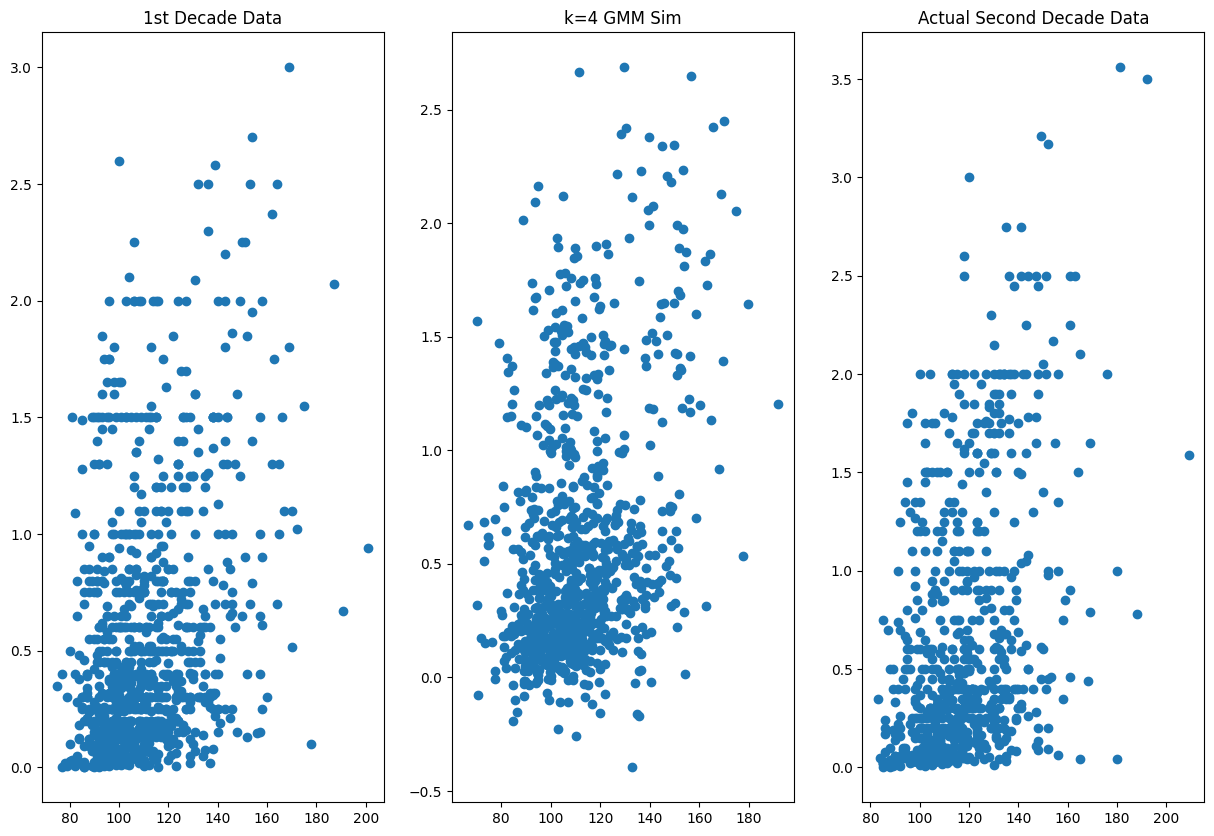

In [27]:
pmi4, mu4, sig4, p4, d4 = GMM(pe50[['Runtime', 'Budget']],4)

sim4=np.zeros((len(pe50), 2))

for i in range(len(pe50)):     
    cluster=np.random.choice(range(4), p=p4)
    sim4[i,:]=stats.multivariate_normal.rvs(mean=mu4[cluster,:], cov=sig4[cluster,:,:])
    
    
fig, ax = plt.subplots(figsize=(15,10), ncols=3)
ax[0].scatter(pe50['Runtime'], pe50['Budget'])
ax[0].set_title('1st Decade Data')
ax[1].scatter(sim4[:,0],sim4[:,1])
ax[1].set_title('k=4 GMM Sim')
ax[2].scatter(up50['Runtime'],up50['Budget'])
ax[2].set_title('Actual Second Decade Data')

**Runtime vs. Profit**

Text(0.5, 1.0, 'Actual Second Decade Data')

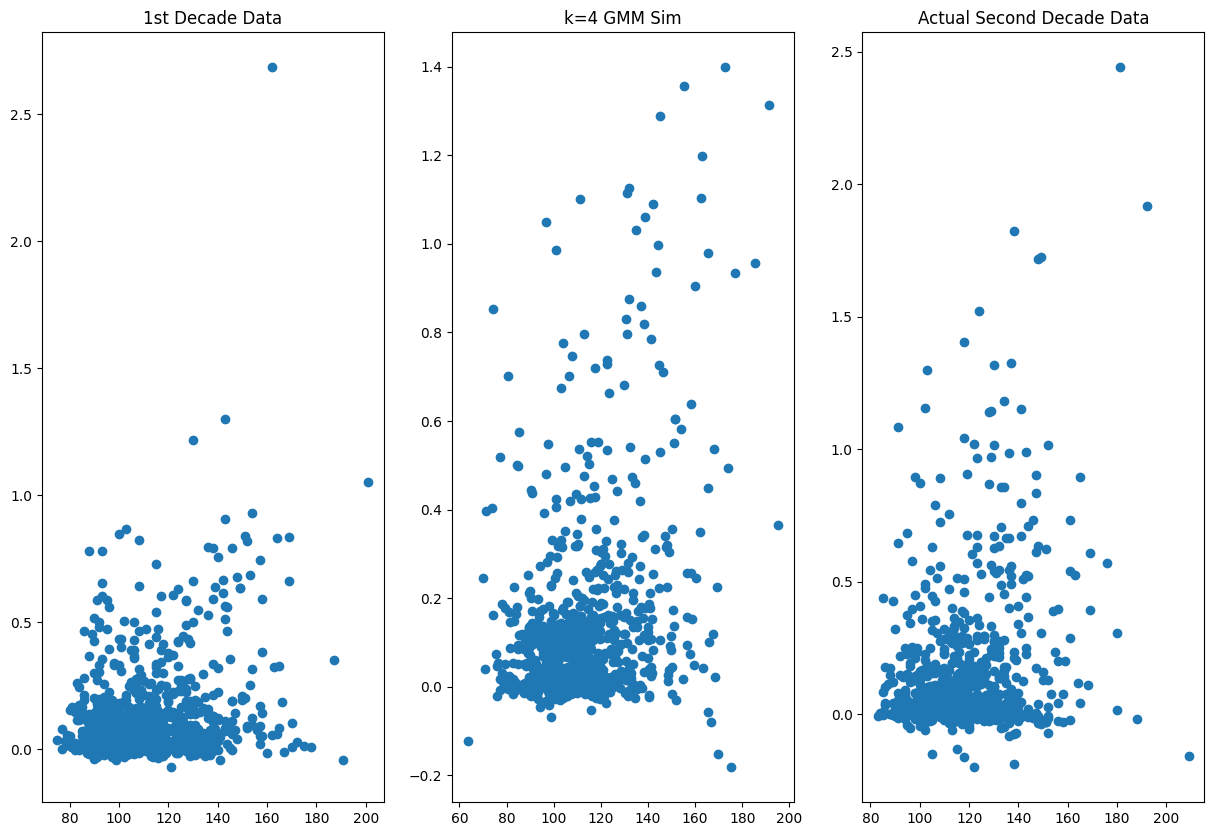

In [28]:
pmi4, mu4, sig4, p4, d4 = GMM(pe50[['Runtime', 'Profit']],4)

sim4=np.zeros((len(pe50), 2))

for i in range(len(pe50)):     
    cluster=np.random.choice(range(4), p=p4)
    sim4[i,:]=stats.multivariate_normal.rvs(mean=mu4[cluster,:], cov=sig4[cluster,:,:])
    
    
fig, ax = plt.subplots(figsize=(15,10), ncols=3)
ax[0].scatter(pe50['Runtime'], pe50['Profit'])
ax[0].set_title('1st Decade Data')
ax[1].scatter(sim4[:,0],sim4[:,1])
ax[1].set_title('k=4 GMM Sim')
ax[2].scatter(up50['Runtime'],up50['Profit'])
ax[2].set_title('Actual Second Decade Data')

**Month vs. Budget**

Text(0.5, 1.0, 'Actual Second Decade Data')

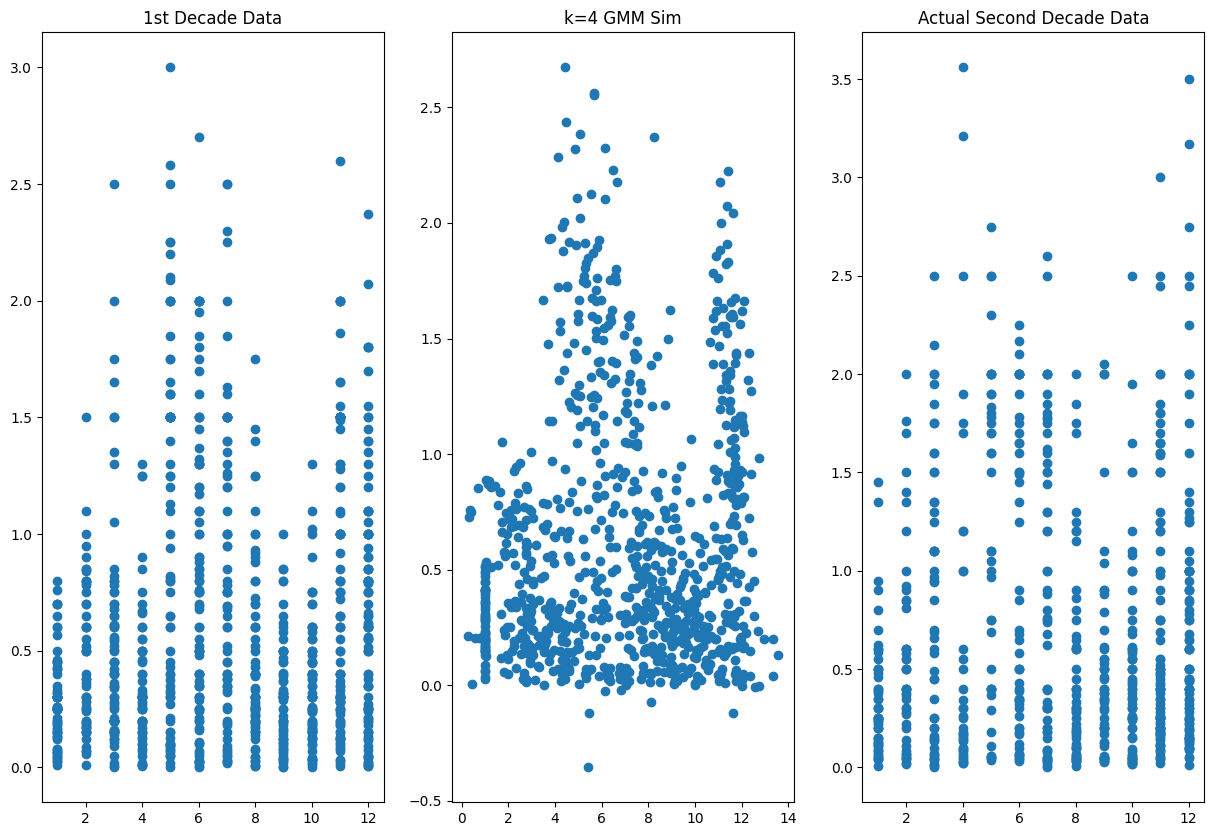

In [29]:
pmi4, mu4, sig4, p4, d4 = GMM(pe50[['Month', 'Budget']],8)

sim4=np.zeros((len(pe50), 2))

for i in range(len(pe50)):     
    cluster=np.random.choice(range(8), p=p4)
    sim4[i,:]=stats.multivariate_normal.rvs(mean=mu4[cluster,:], cov=sig4[cluster,:,:])
    
    
fig, ax = plt.subplots(figsize=(15,10), ncols=3)
ax[0].scatter(pe50['Month'], pe50['Budget'])
ax[0].set_title('1st Decade Data')
ax[1].scatter(sim4[:,0],sim4[:,1])
ax[1].set_title('k=4 GMM Sim')
ax[2].scatter(up50['Month'],up50['Budget'])
ax[2].set_title('Actual Second Decade Data')

**Month vs. Profit**

Text(0.5, 1.0, 'Actual Second Decade Data')

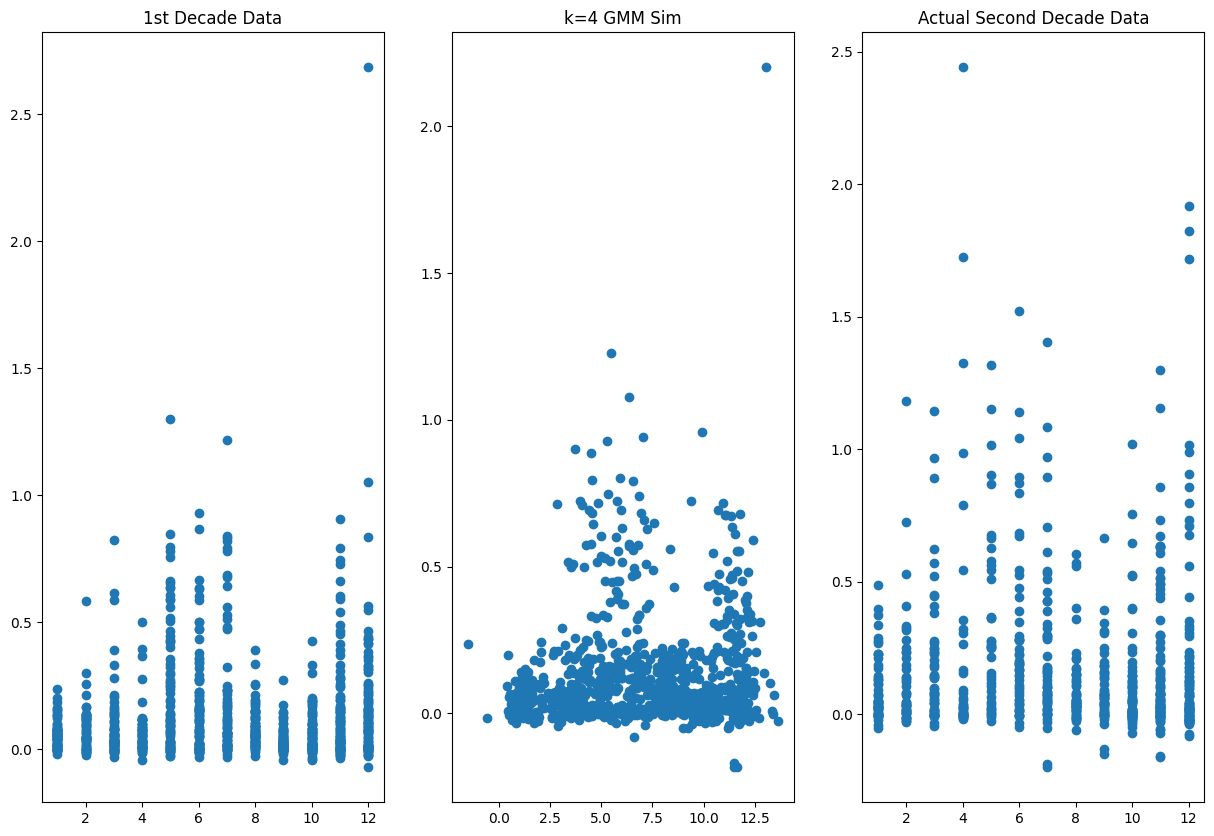

In [30]:
pmi4, mu4, sig4, p4, d4 = GMM(pe50[['Month', 'Profit']],8)

sim4=np.zeros((len(pe50), 2))

for i in range(len(pe50)):     
    cluster=np.random.choice(range(8), p=p4)
    sim4[i,:]=stats.multivariate_normal.rvs(mean=mu4[cluster,:], cov=sig4[cluster,:,:])
    
    
fig, ax = plt.subplots(figsize=(15,10), ncols=3)
ax[0].scatter(pe50['Month'], pe50['Profit'])
ax[0].set_title('1st Decade Data')
ax[1].scatter(sim4[:,0],sim4[:,1])
ax[1].set_title('k=4 GMM Sim')
ax[2].scatter(up50['Month'],up50['Profit'])
ax[2].set_title('Actual Second Decade Data')

**Month vs. Runtime**

Text(0.5, 1.0, 'Actual Second Decade Data')

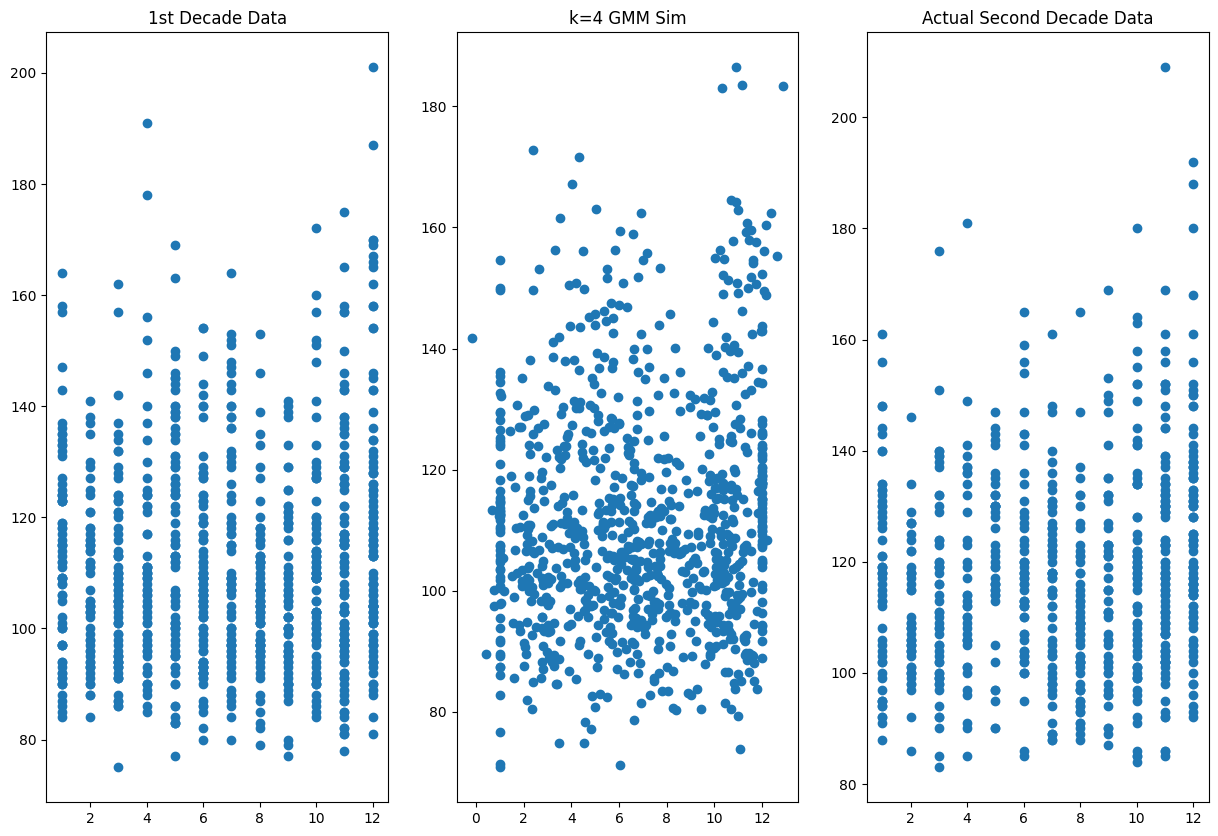

In [31]:
pmi4, mu4, sig4, p4, d4 = GMM(pe50[['Month', 'Runtime']],8)

sim4=np.zeros((len(pe50), 2))

for i in range(len(pe50)):     
    cluster=np.random.choice(range(8), p=p4)
    sim4[i,:]=stats.multivariate_normal.rvs(mean=mu4[cluster,:], cov=sig4[cluster,:,:])
    
    
fig, ax = plt.subplots(figsize=(15,10), ncols=3)
ax[0].scatter(pe50['Month'], pe50['Runtime'])
ax[0].set_title('1st Decade Data')
ax[1].scatter(sim4[:,0],sim4[:,1])
ax[1].set_title('k=4 GMM Sim')
ax[2].scatter(up50['Month'],up50['Runtime'])
ax[2].set_title('Actual Second Decade Data')

**Certiciate vs. rating**

Text(0.5, 1.0, 'Actual Second Decade Data')

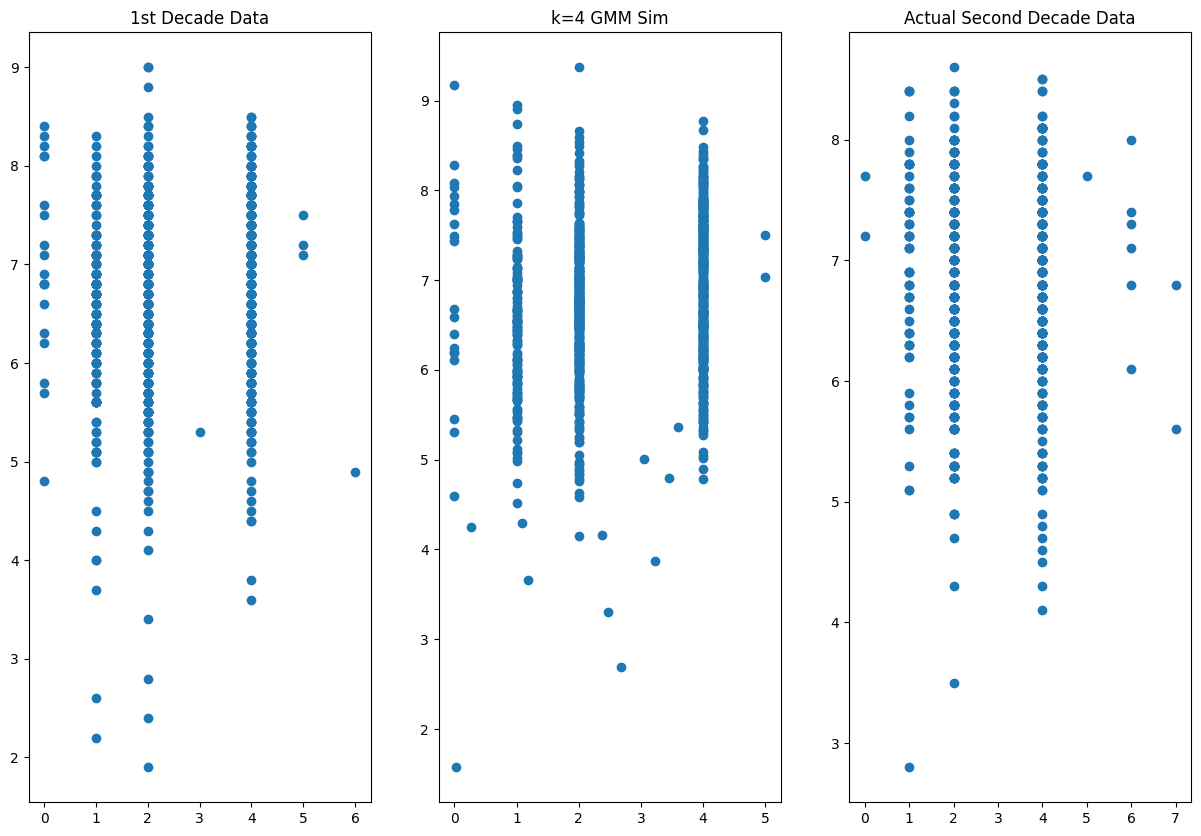

In [32]:
pmi4, mu4, sig4, p4, d4 = GMM(pe50[['Certificate', 'Rating']],8)

sim4=np.zeros((len(pe50), 2))

for i in range(len(pe50)):     
    cluster=np.random.choice(range(8), p=p4)
    sim4[i,:]=stats.multivariate_normal.rvs(mean=mu4[cluster,:], cov=sig4[cluster,:,:])
    
    
fig, ax = plt.subplots(figsize=(15,10), ncols=3)
ax[0].scatter(pe50['Certificate'], pe50['Rating'])
ax[0].set_title('1st Decade Data')
ax[1].scatter(sim4[:,0],sim4[:,1])
ax[1].set_title('k=4 GMM Sim')
ax[2].scatter(up50['Certificate'],up50['Rating'])
ax[2].set_title('Actual Second Decade Data')

**Certificate vs. budget**

Text(0.5, 1.0, 'Actual Second Decade Data')

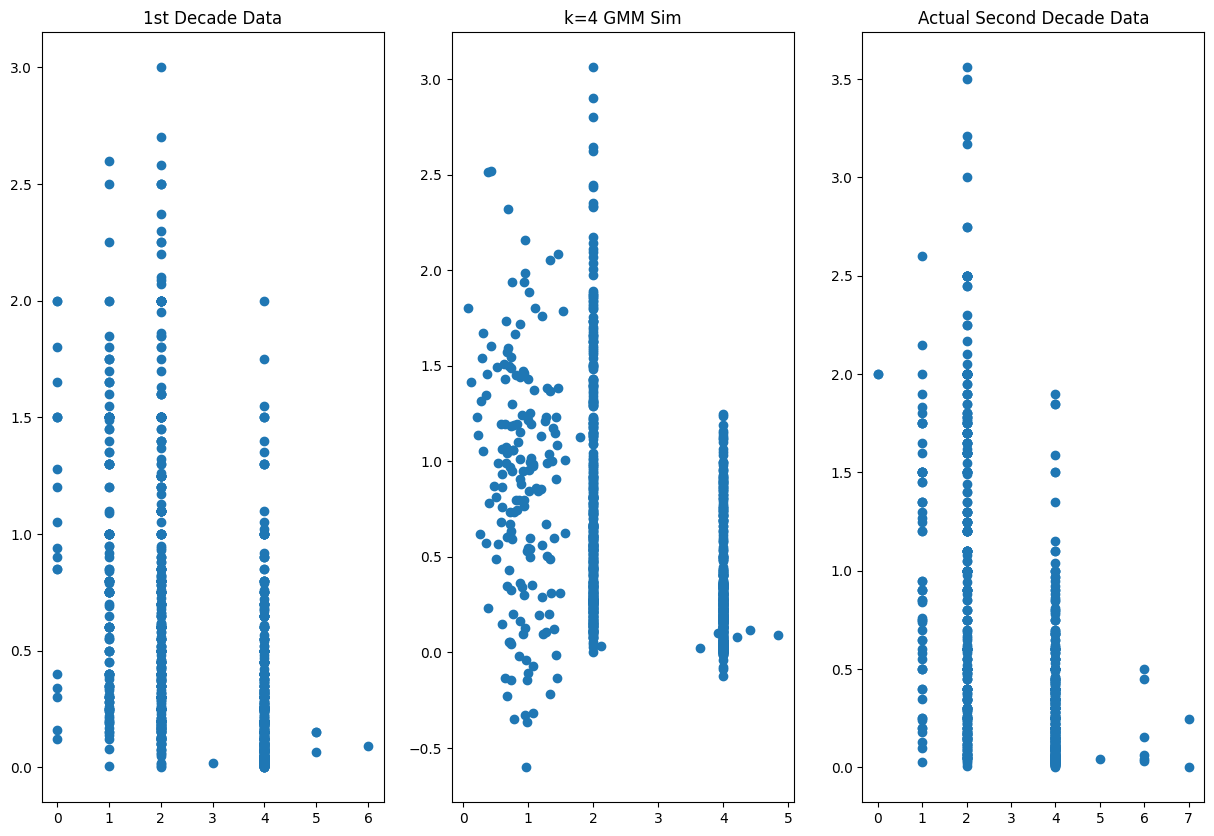

In [33]:
pmi4, mu4, sig4, p4, d4 = GMM(pe50[['Certificate', 'Budget']],8)

sim4=np.zeros((len(pe50), 2))

for i in range(len(pe50)):     
    cluster=np.random.choice(range(8), p=p4)
    sim4[i,:]=stats.multivariate_normal.rvs(mean=mu4[cluster,:], cov=sig4[cluster,:,:])
    
    
fig, ax = plt.subplots(figsize=(15,10), ncols=3)
ax[0].scatter(pe50['Certificate'], pe50['Budget'])
ax[0].set_title('1st Decade Data')
ax[1].scatter(sim4[:,0],sim4[:,1])
ax[1].set_title('k=4 GMM Sim')
ax[2].scatter(up50['Certificate'],up50['Budget'])
ax[2].set_title('Actual Second Decade Data')

**Certificate vs. net profit**

Text(0.5, 1.0, 'Actual Second Decade Data')

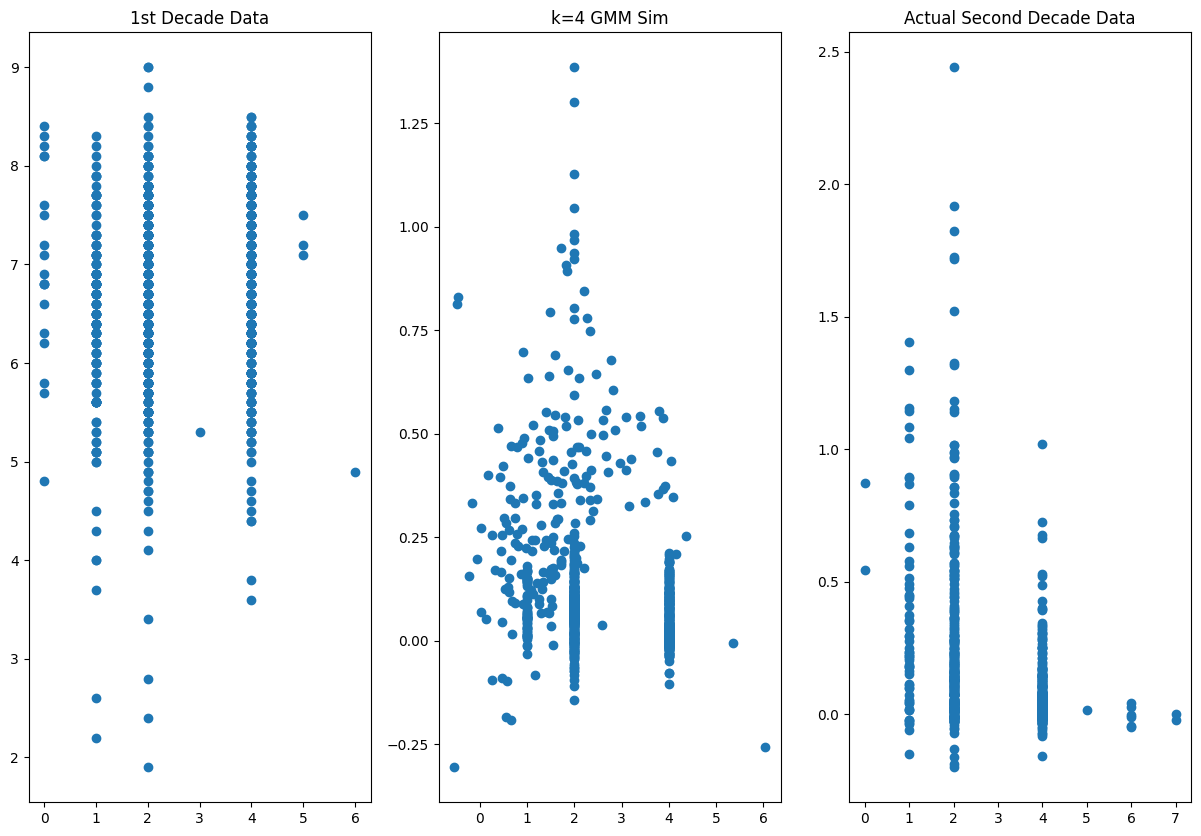

In [34]:
pmi4, mu4, sig4, p4, d4 = GMM(pe50[['Certificate', 'Profit']],8)

sim4=np.zeros((len(pe50), 2))

for i in range(len(pe50)):     
    cluster=np.random.choice(range(8), p=p4)
    sim4[i,:]=stats.multivariate_normal.rvs(mean=mu4[cluster,:], cov=sig4[cluster,:,:])
    
    
fig, ax = plt.subplots(figsize=(15,10), ncols=3)
ax[0].scatter(pe50['Certificate'], pe50['Rating'])
ax[0].set_title('1st Decade Data')
ax[1].scatter(sim4[:,0],sim4[:,1])
ax[1].set_title('k=4 GMM Sim')
ax[2].scatter(up50['Certificate'],up50['Profit'])
ax[2].set_title('Actual Second Decade Data')

**Month of release vs. certificate**

Text(0.5, 1.0, 'Actual Second Decade Data')

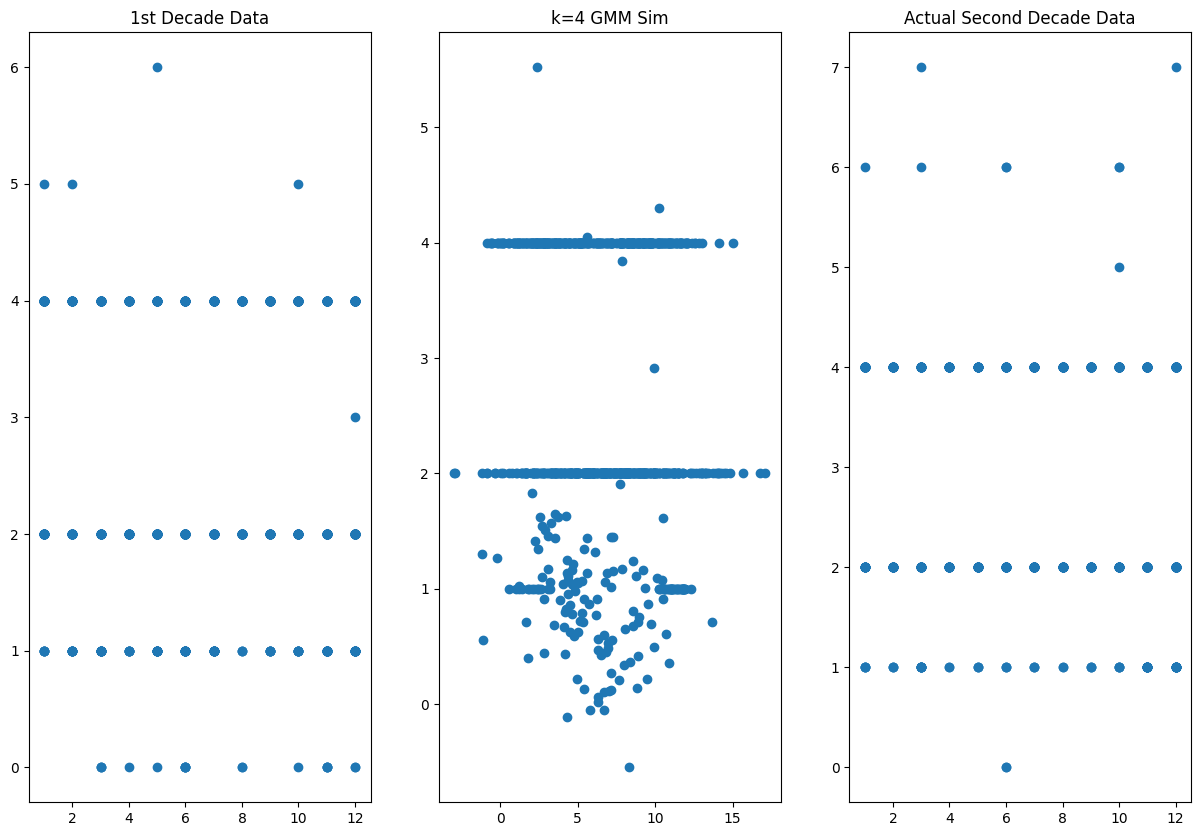

In [36]:
# Note: Sometimes division by 0 error. Run again if encountered.
pmi4, mu4, sig4, p4, d4 = GMM(pe50[['Month', 'Certificate']],8)

sim4=np.zeros((len(pe50), 2))

for i in range(len(pe50)):     
    cluster=np.random.choice(range(8), p=p4)
    sim4[i,:]=stats.multivariate_normal.rvs(mean=mu4[cluster,:], cov=sig4[cluster,:,:])
    
    
fig, ax = plt.subplots(figsize=(15,10), ncols=3)
ax[0].scatter(pe50['Month'], pe50['Certificate'])
ax[0].set_title('1st Decade Data')
ax[1].scatter(sim4[:,0],sim4[:,1])
ax[1].set_title('k=4 GMM Sim')
ax[2].scatter(up50['Month'],up50['Certificate'])
ax[2].set_title('Actual Second Decade Data')

                      Title  Rating  Year     Month Certificate  Runtime   
0  Avatar: The Way of Water     7.8  2022  December       PG-13      192  \

       Directors                                              Stars   
0  James Cameron  Sam Worthington, Zoe Saldana, Sigourney Weaver...  \

                        Genre Filming_location       Budget      Income   
0  Action, Adventure, Fantasy      New Zealand  350000000.0  2267946983  \

  Country_of_origin  
0     United States  
           Budget  Rating
0     350000000.0     7.8
1      35000000.0     7.6
2      85900000.0     7.3
3             0.0     7.8
4      12000000.0     6.4
...           ...     ...
1995          0.0     7.1
1996   95000000.0     5.5
1997   40000000.0     5.8
1998          0.0     7.1
1999     500000.0     5.8

[1839 rows x 2 columns]
           Budget
0     350000000.0
1      35000000.0
2      85900000.0
3             0.0
4      12000000.0
...           ...
1995          0.0
1996   95000000.0
1997   400

Text(0, 0.5, 'Rating received')

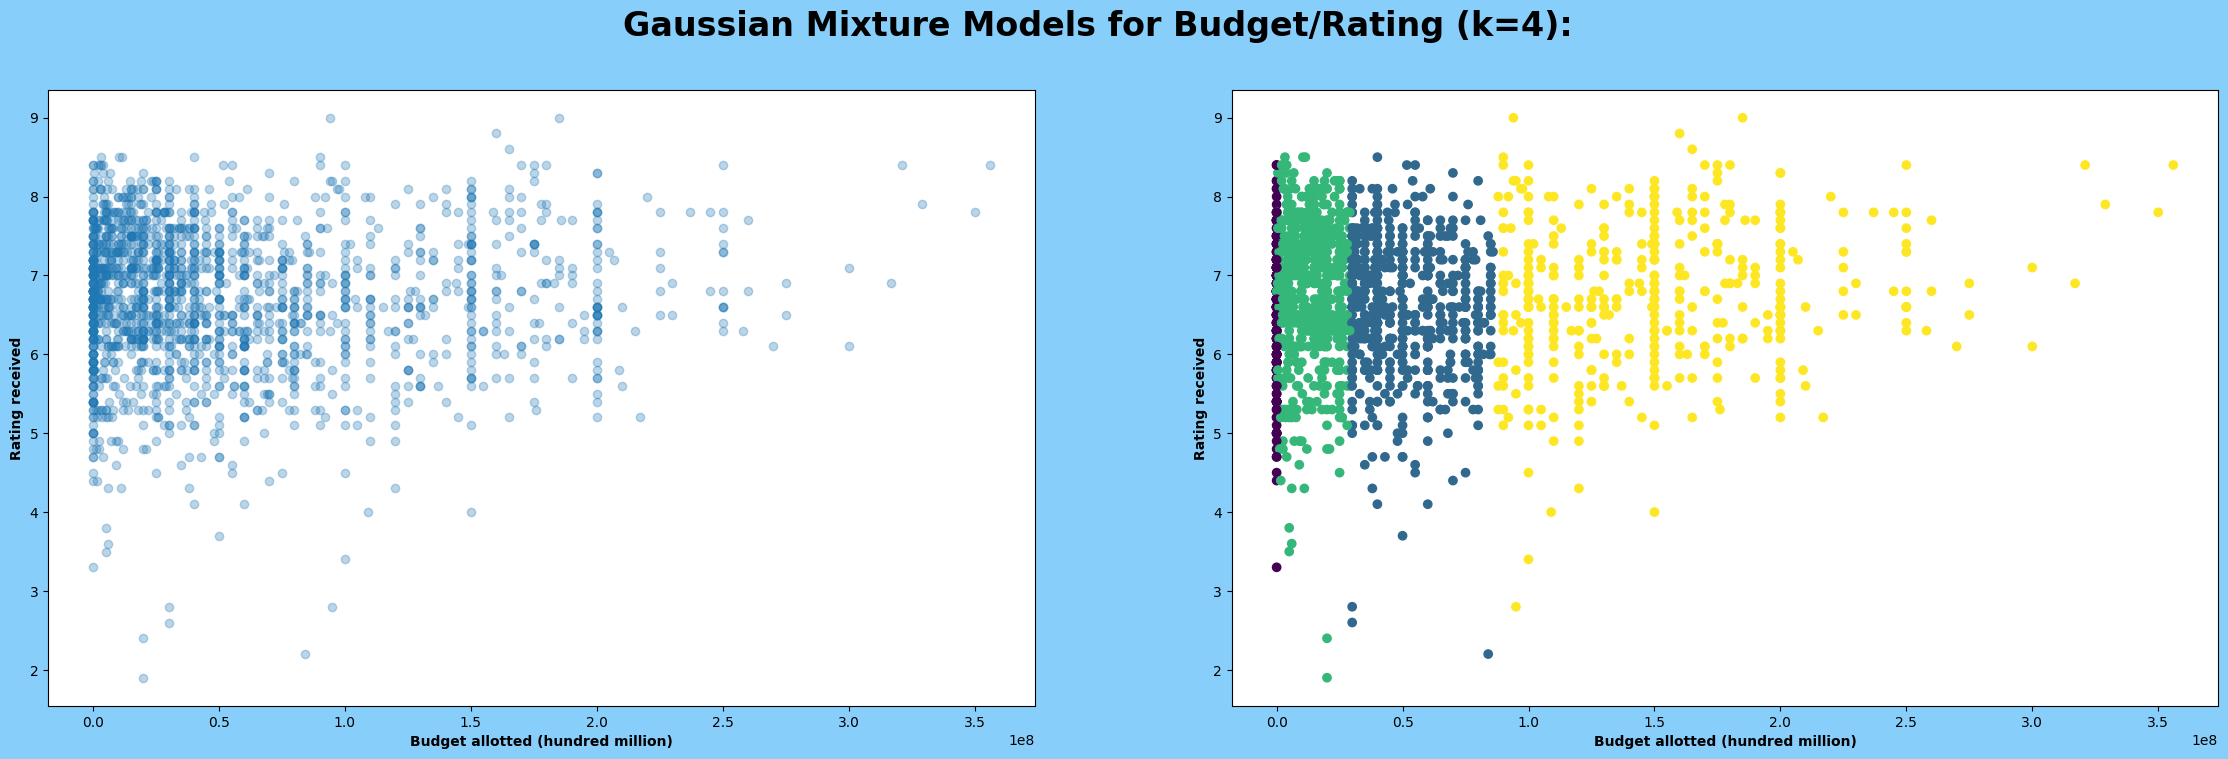

In [38]:
# Creating GMM and clustering by film budget vs. rating received.
BI = BI[(BI['Income'] != 'Unknown')]
    
budgets = BI[['Budget']]['Budget'].to_list()
b_indices = np.round(np.linspace(8, len(budgets) - 1, 10)).astype(int)
t = list(map(lambda _: budgets[_], b_indices))
x_ticks = list(map(lambda _: '$' + str(int(_)), t))

budgets_f = BI[['Budget', 'Rating']].astype(float)
print(BI[BI['Budget'] == 350000000.0])
print(budgets_f)

print(BI[['Budget']])

pmi1, mu1, sig1, p1, d1 = GMM(budgets_f, 4)
clust_assign = np.argmax(pmi1, axis=1)

# GMM test: printing results.
# print(f'P class given data: {pmi1}')
# print(f'Final means: {mu1}')
# print(f'Final covariances: {sig1}')
# print(f'P class returned: {p1}')
# print(f'Reconstructive mean error: {d1}')

# Creating display of GMM for clustering by film budget and rating received.
fig, ax = plt.subplots(1, 2, figsize=(28, 8), facecolor="lightskyblue")
fig.suptitle('Gaussian Mixture Models for Budget/Rating (k=4):', fontsize=24, fontweight ='bold')

ax[0].scatter(BI['Budget'],BI['Rating'],alpha = 0.3)
ax[0].set_xlabel('Budget allotted (hundred million)', fontweight ='bold')
ax[0].set_ylabel('Rating received', fontweight ='bold')

ax[1].scatter(budgets_f['Budget'], budgets_f['Rating'], c=clust_assign)
ax[1].set_xlabel('Budget allotted (hundred million)', fontweight ='bold')
ax[1].set_ylabel('Rating received', fontweight ='bold')

Text(0, 0.5, 'Rating received')

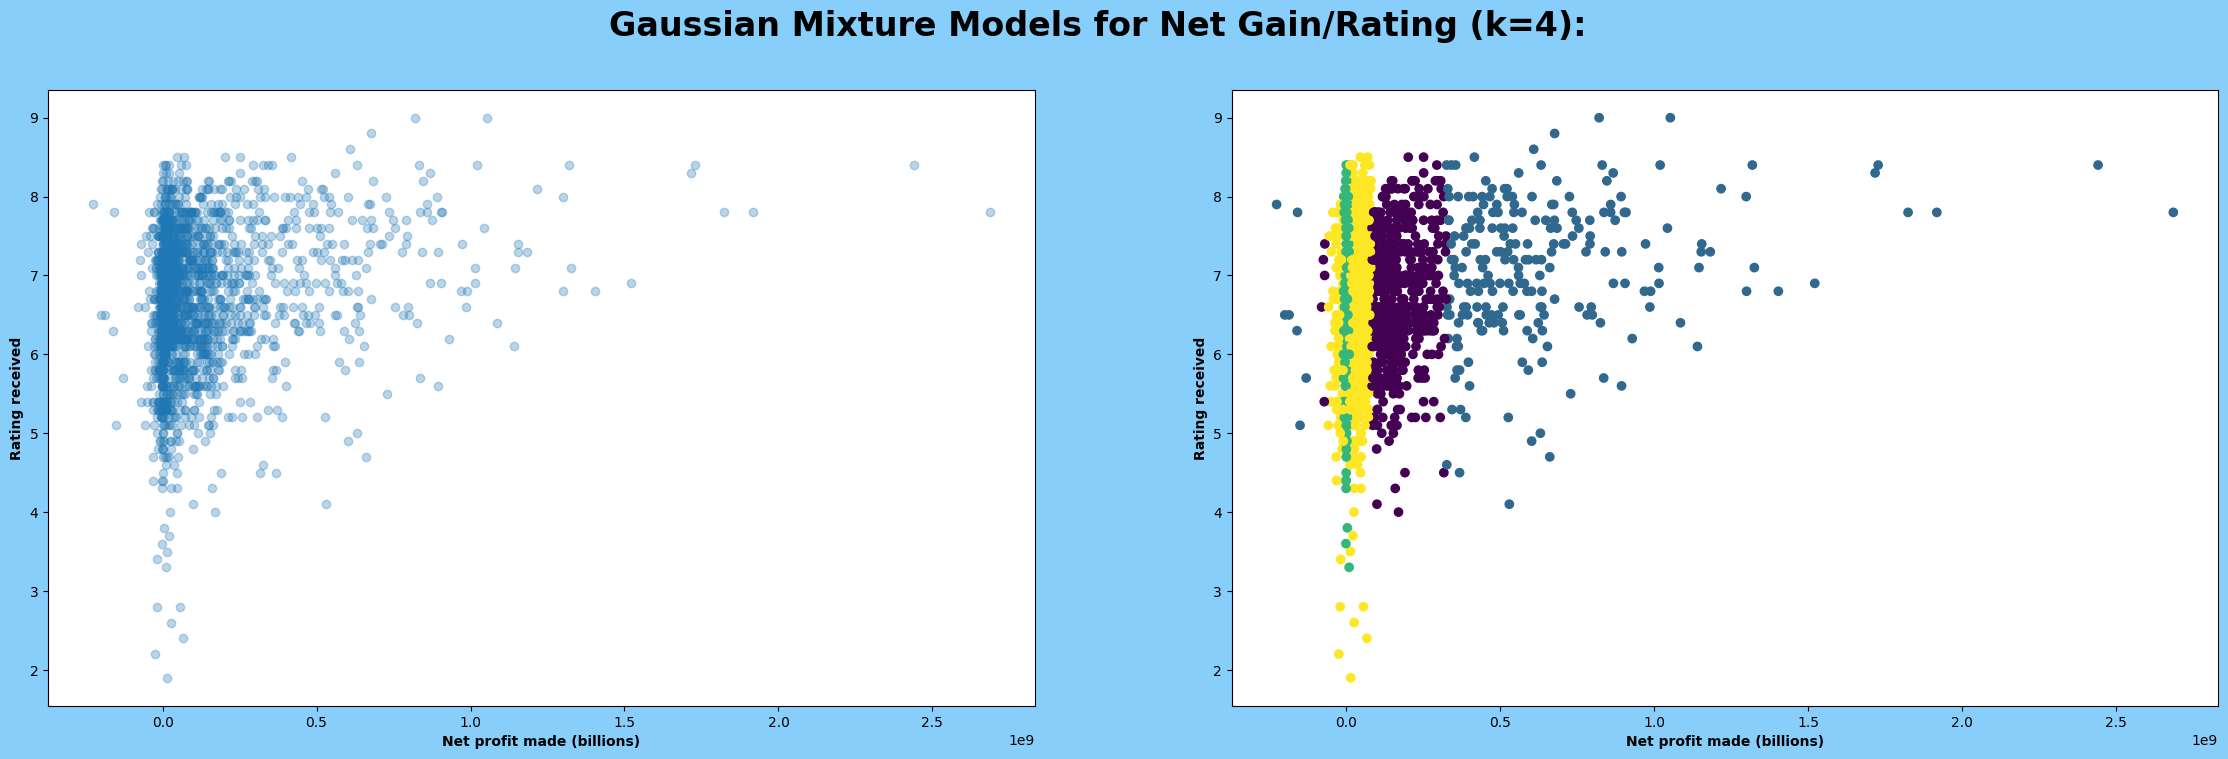

In [39]:
# Creating GMM and clustering by net gain vs. rating received.
zipped = pd.DataFrame(netGain).join(BI['Rating'])
zipped.columns = ['NetGain', 'Rating']

pmi1, mu1, sig1, p1, d1 = GMM(zipped, 4)
clust_assign = np.argmax(pmi1, axis=1)

# Creating display of GMM for clustering by film budget and rating received.
fig, ax = plt.subplots(1, 2, figsize=(28, 8), facecolor="lightskyblue")
fig.suptitle('Gaussian Mixture Models for Net Gain/Rating (k=4):', fontsize=24, fontweight='bold')

ax[0].scatter(zipped['NetGain'], zipped['Rating'], alpha = 0.3)
ax[0].set_xlabel('Net profit made (billions)', fontweight='bold')
ax[0].set_ylabel('Rating received', fontweight='bold')

ax[1].scatter(zipped['NetGain'], zipped['Rating'], c=clust_assign)
ax[1].set_xlabel('Net profit made (billions)', fontweight='bold')
ax[1].set_ylabel('Rating received', fontweight='bold')

           Budget  Runtime
0     350000000.0    192.0
1      35000000.0    117.0
2      85900000.0    127.0
3             0.0    114.0
4      12000000.0    102.0
...           ...      ...
1995          0.0    114.0
1996   95000000.0    117.0
1997   40000000.0     98.0
1998          0.0    105.0
1999     500000.0     79.0

[1839 rows x 2 columns]


Text(0, 0.5, 'Runtime of film (minutes)')

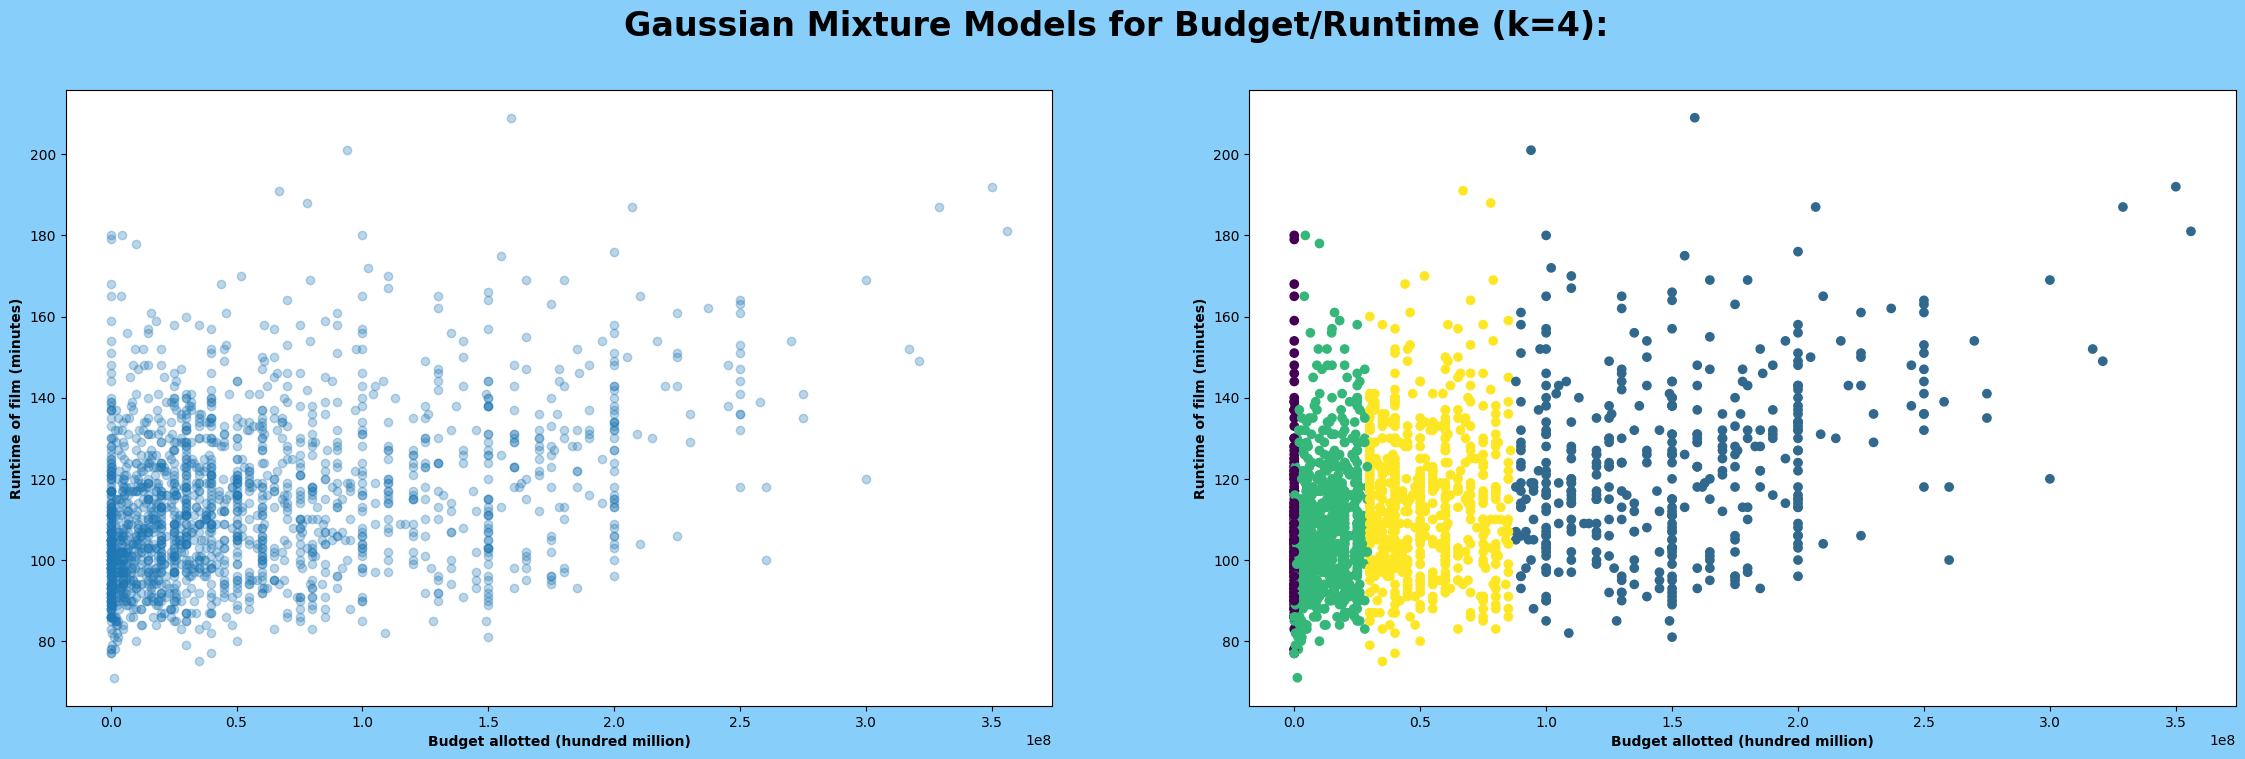

In [40]:
# df['Runtime']
# print(BI['Runtime'])

bud_run_f = BI[['Budget', 'Runtime']].astype(float)
print(bud_run_f)

pmi1, mu1, sig1, p1, d1 = GMM(bud_run_f, 4)
clust_assign = np.argmax(pmi1, axis=1)

# Creating display of GMM for clustering by film budget and rating received.
fig, ax = plt.subplots(1, 2, figsize=(28, 8), facecolor="lightskyblue")
fig.suptitle('Gaussian Mixture Models for Budget/Runtime (k=4):', fontsize=24, fontweight='bold')

ax[0].scatter(bud_run_f['Budget'], bud_run_f['Runtime'], alpha=0.3)
ax[0].set_xlabel('Budget allotted (hundred million)', fontweight ='bold')
ax[0].set_ylabel('Runtime of film (minutes)', fontweight ='bold')

ax[1].scatter(bud_run_f['Budget'], bud_run_f['Runtime'], c=clust_assign)
ax[1].set_xlabel('Budget allotted (hundred million)', fontweight ='bold')
ax[1].set_ylabel('Runtime of film (minutes)', fontweight ='bold')

           NetGain                                       Title
0     1917946983.0                    Avatar: The Way of Water
1      -34891033.0              Guillermo del Toro's Pinocchio
2      153368602.0                                Bullet Train
3       19720823.0                   The Banshees of Inisherin
4      159253910.0                                       M3gan
...            ...                                         ...
1995     1062878.0                       A Tale of Two Sisters
1996    65099222.0  Lara Croft Tomb Raider: The Cradle of Life
1997   101591324.0                                     Gothika
1998    20235426.0                   Ong-Bak: The Thai Warrior
1999    54183487.0                                  Open Water

[1839 rows x 2 columns]
[2685917914.0, 2441501328.0, 1917946983.0, 1824521700.0, 1727359754.0, 1717430023.0, 1521537444.0, 1403250487.0, 1325341399.0, 1318732821.0, 1300026933.0, 1298815515.0, 1217359942.0, 1182248826.0, 1154550716.0, 11528095

Text(0, 0.5, 'Runtime of film (minutes)')

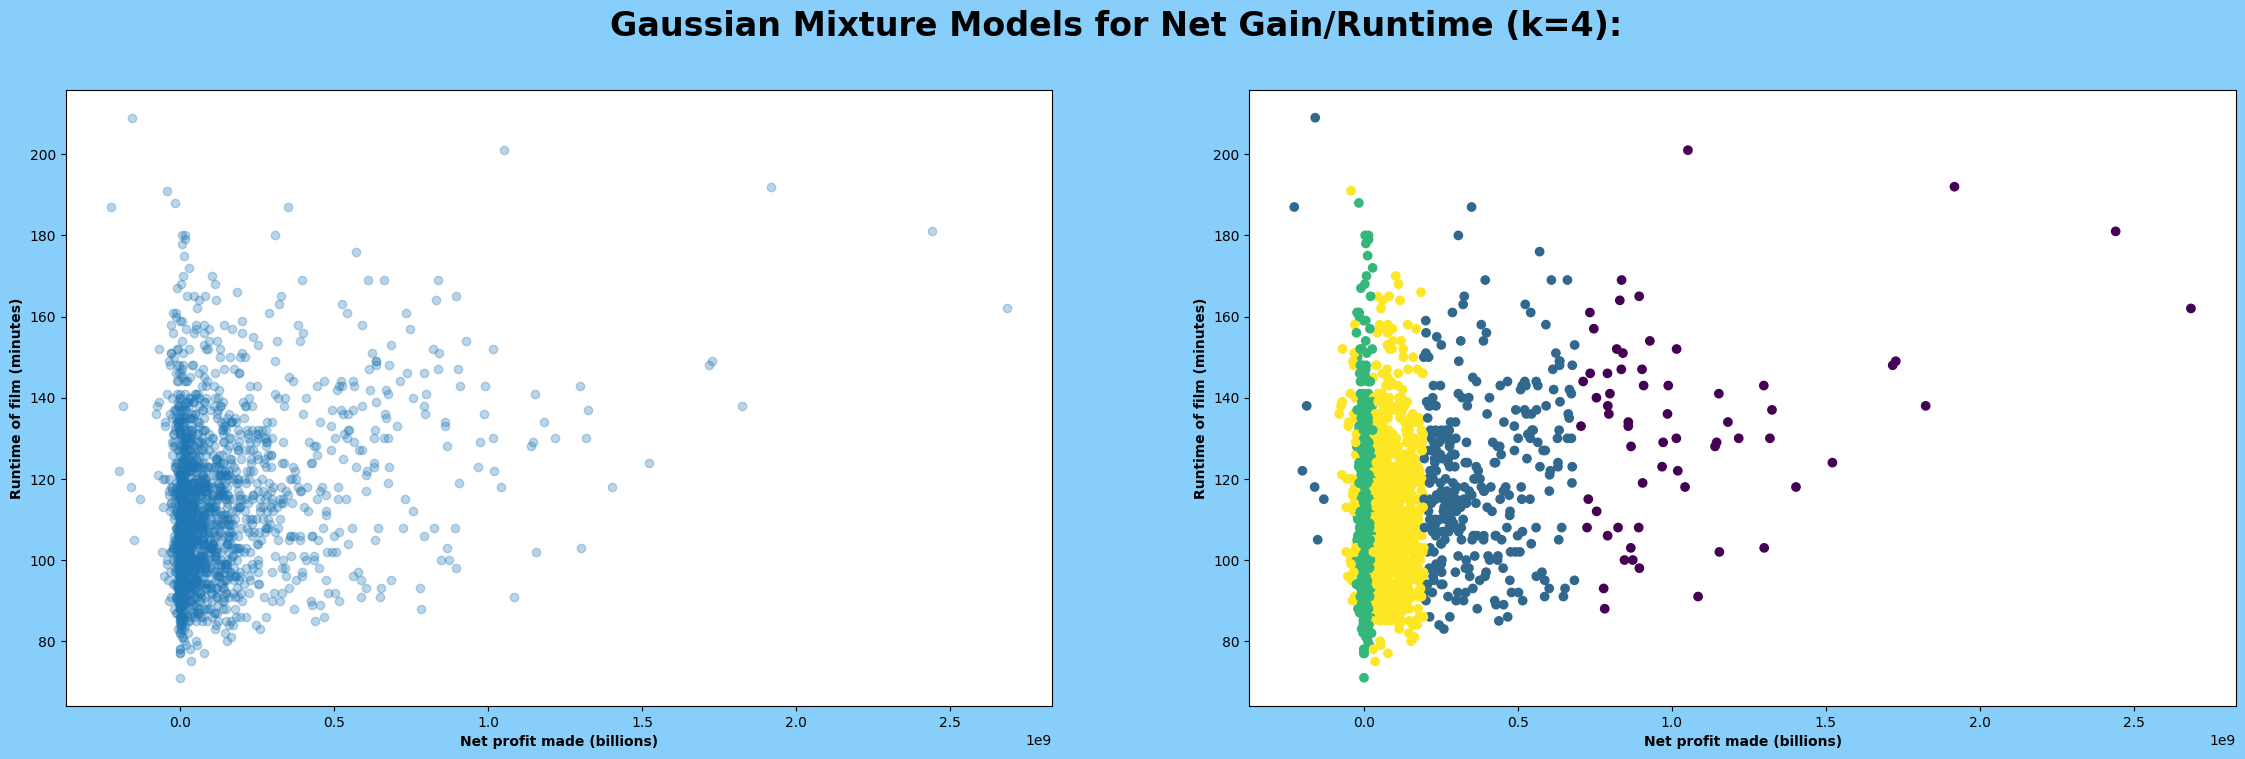

In [41]:
# Creating GMM and clustering by net gain vs. runtime of film.
zipped = pd.DataFrame(netGain).join(BI['Runtime'])
zipped.columns = ['NetGain', 'Runtime']
# print(zipped)

zipped2 = pd.DataFrame(netGain).join(BI['Title'])
zipped2.columns = ['NetGain', 'Title']
print(zipped2)

print(sorted(netGain, reverse=True))

print(zipped2[zipped2['NetGain'] == 2441501328.0])
# print(df['Runtime'])

# print(df[(float(df.loc[:, 'Income']) - float(df.loc[:, 'Budget'])) == 2685917914.0])

pmi1, mu1, sig1, p1, d1 = GMM(zipped, 4)
clust_assign = np.argmax(pmi1, axis=1)

# Creating display of GMM for clustering by film budget and rating received.
fig, ax = plt.subplots(1, 2, figsize=(28, 8), facecolor="lightskyblue")
fig.suptitle('Gaussian Mixture Models for Net Gain/Runtime (k=4):', fontsize=24, fontweight='bold')

ax[0].scatter(zipped['NetGain'], zipped['Runtime'], alpha = 0.3)
ax[0].set_xlabel('Net profit made (billions)', fontweight='bold')
ax[0].set_ylabel('Runtime of film (minutes)', fontweight='bold')

ax[1].scatter(zipped['NetGain'], zipped['Runtime'], c=clust_assign)
ax[1].set_xlabel('Net profit made (billions)', fontweight='bold')
ax[1].set_ylabel('Runtime of film (minutes)', fontweight='bold')

months:
['April', 'April', 'April', 'April', 'April', 'April', 'April', 'April', 'April', 'April', 'April', 'April', 'April', 'April', 'April', 'April', 'April', 'April', 'April', 'April', 'April', 'April', 'April', 'April', 'April', 'April', 'April', 'April', 'April', 'April', 'April', 'April', 'April', 'April', 'April', 'April', 'April', 'April', 'April', 'April', 'April', 'April', 'April', 'April', 'April', 'April', 'April', 'April', 'April', 'April', 'April', 'April', 'April', 'April', 'April', 'April', 'April', 'April', 'April', 'April', 'April', 'April', 'April', 'April', 'April', 'April', 'April', 'April', 'April', 'April', 'April', 'April', 'April', 'April', 'April', 'April', 'April', 'April', 'April', 'April', 'April', 'April', 'April', 'April', 'April', 'April', 'April', 'April', 'April', 'April', 'April', 'April', 'April', 'April', 'April', 'April', 'April', 'April', 'April', 'April', 'April', 'April', 'April', 'April', 'April', 'April', 'April', 'April', 'April', 'April', '

Text(0, 0.5, 'Budget allotted (hundred million)')

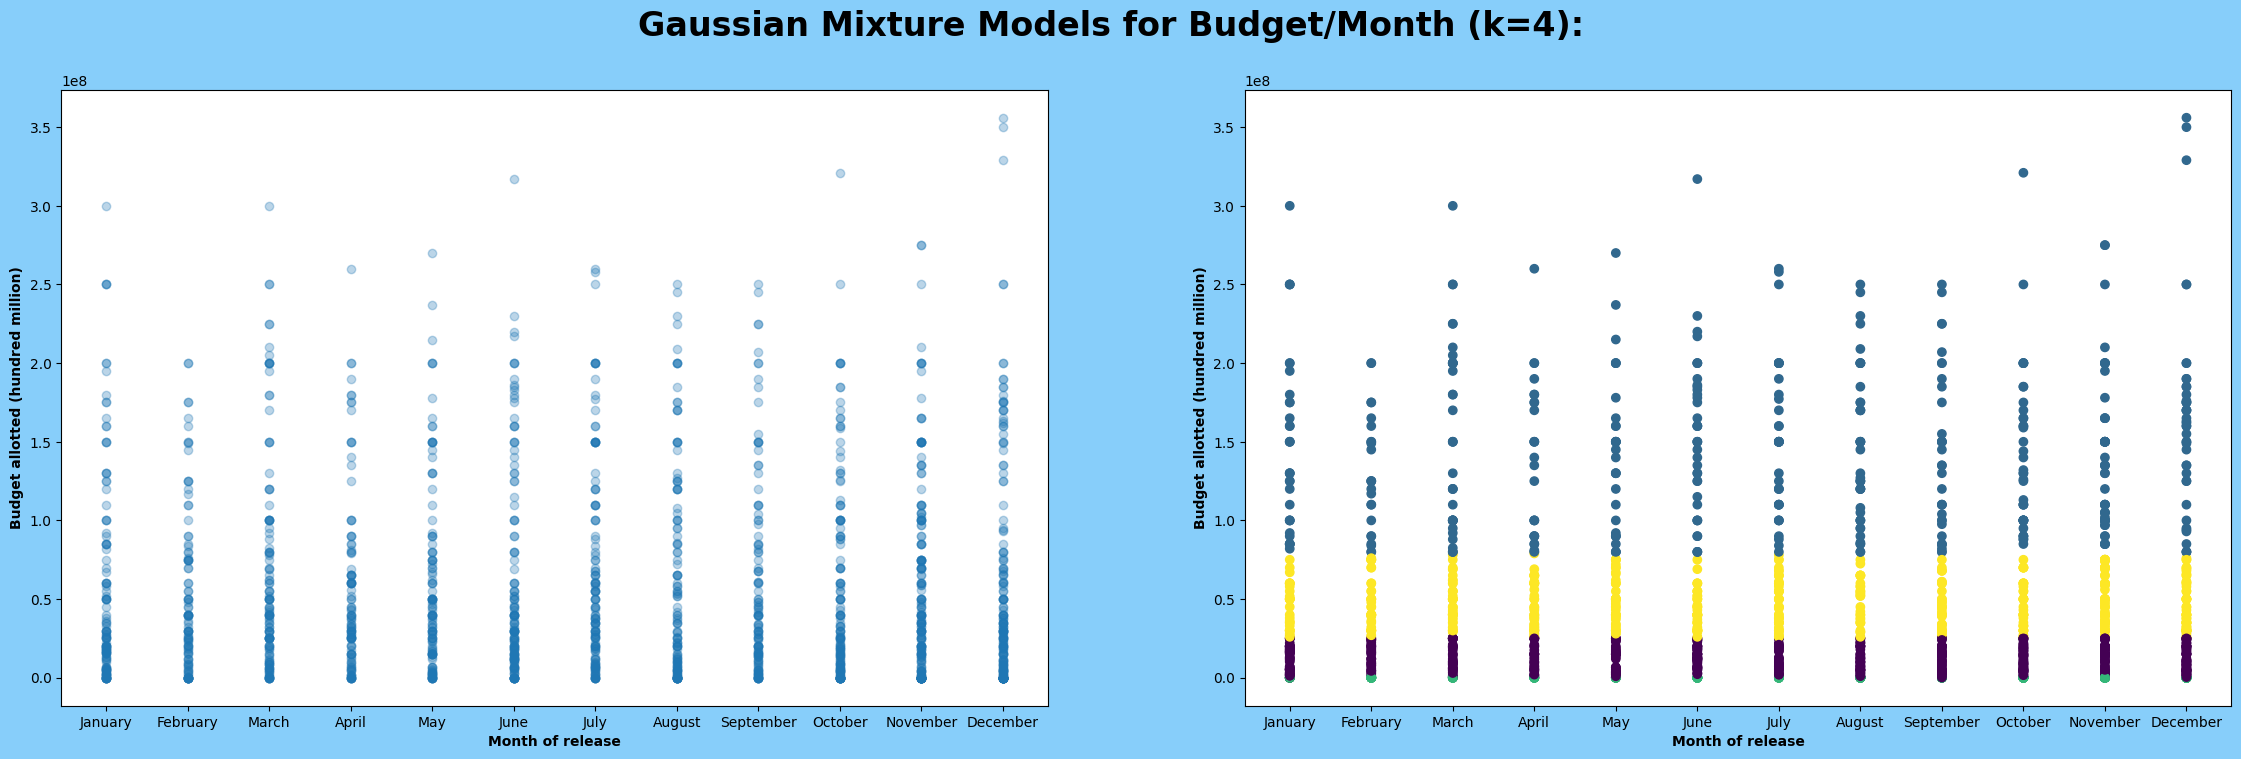

In [42]:
# Pull month col, convert to indices (0-12).as_integer_ratio
buds = BI.dropna(subset=['Budget'])
buds = buds[buds['Month'] != '2008']
months = buds['Month']
print('months:')
print(sorted(months))

# BI = BI[(BI['Income'] != 'Unknown')]

mth_idx_dict = {
    "January": 1, "February": 2, "March": 3, "April": 4, "May": 5, "June": 6, 
    "July": 7, "August": 8, "September": 9, "October": 10, "November": 11, "December": 12
}

# Format data.
mth_indices = list(map(lambda _: mth_idx_dict.get(_), months))
print('\nmonth indices:')
print(mth_indices)

zipped = pd.DataFrame(mth_indices).join(buds['Budget'])
zipped.columns = ['Month', 'Budget']
zipped = zipped.dropna()
print('\nzipped data:')
print(zipped)

# Cluster and plot.
pmi1, mu1, sig1, p1, d1 = GMM(zipped, 4)
clust_assign = np.argmax(pmi1, axis=1)

# Creating display of GMM for clustering by film budget and rating received.
fig, ax = plt.subplots(1, 2, figsize=(28, 8), facecolor="lightskyblue")
fig.suptitle('Gaussian Mixture Models for Budget/Month (k=4):', fontsize=24, fontweight='bold')
x_ticks = mth_idx_dict.keys()

ax[0].scatter(zipped['Month'], zipped['Budget'], alpha = 0.3)
ax[0].set_xlabel('Month of release', fontweight='bold')
ax[0].set_xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
ax[0].set_xticklabels(x_ticks)
ax[0].set_ylabel('Budget allotted (hundred million)', fontweight='bold')

ax[1].scatter(zipped['Month'], zipped['Budget'], c=clust_assign)
ax[1].set_xlabel('Month of release', fontweight='bold')
ax[1].set_xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
ax[1].set_xticklabels(x_ticks)
ax[1].set_ylabel('Budget allotted (hundred million)', fontweight='bold')

In [43]:
print(df[df['Title'] == 'John Wick'])

         Title  Rating  Year    Month Certificate  Runtime   
806  John Wick     7.4  2014  October           R      101  \

                        Directors   
806  Chad Stahelski, David Leitch  \

                                                 Stars   
806  Keanu Reeves, Michael Nyqvist, Alfie Allen, Wi...  \

                       Genre Filming_location        Budget        Income   
806  Action, Crime, Thriller              USA  $20,000,000   $86,081,711   \

                        Country_of_origin  
806  United States, United Kingdom, China  


In [44]:
print(sorted(list(netGain), reverse=True))
print

[2685917914.0, 2441501328.0, 1917946983.0, 1824521700.0, 1727359754.0, 1717430023.0, 1521537444.0, 1403250487.0, 1325341399.0, 1318732821.0, 1300026933.0, 1298815515.0, 1217359942.0, 1182248826.0, 1154550716.0, 1152809540.0, 1145611599.0, 1140466296.0, 1085444662.0, 1052457748.0, 1043089244.0, 1019458282.0, 1015698830.0, 1014811252.0, 988528393.0, 986005118.0, 971927996.0, 968462972.0, 928794079.0, 908569499.0, 905339117.0, 903337496.0, 894766005.0, 894054072.0, 892533689.0, 873394593.0, 867693953.0, 866970811.0, 858809311.0, 858682142.0, 846352645.0, 841179747.0, 837030651.0, 836136080.0, 831169825.0, 825468216.0, 821234167.0, 799149279.0, 795713802.0, 792235757.0, 791554929.0, 791070383.0, 782244782.0, 778760770.0, 756085151.0, 755390560.0, 746815106.0, 735011746.0, 734027992.0, 728853382.0, 724836791.0, 712201338.0, 705166924.0, 684504700.0, 683848019.0, 676848102.0, 676693929.0, 675896609.0, 673983879.0, 673854286.0, 667660766.0, 666842551.0, 663756051.0, 661025481.0, 660996492.0, 

<function print(*args, sep=' ', end='\n', file=None, flush=False)>

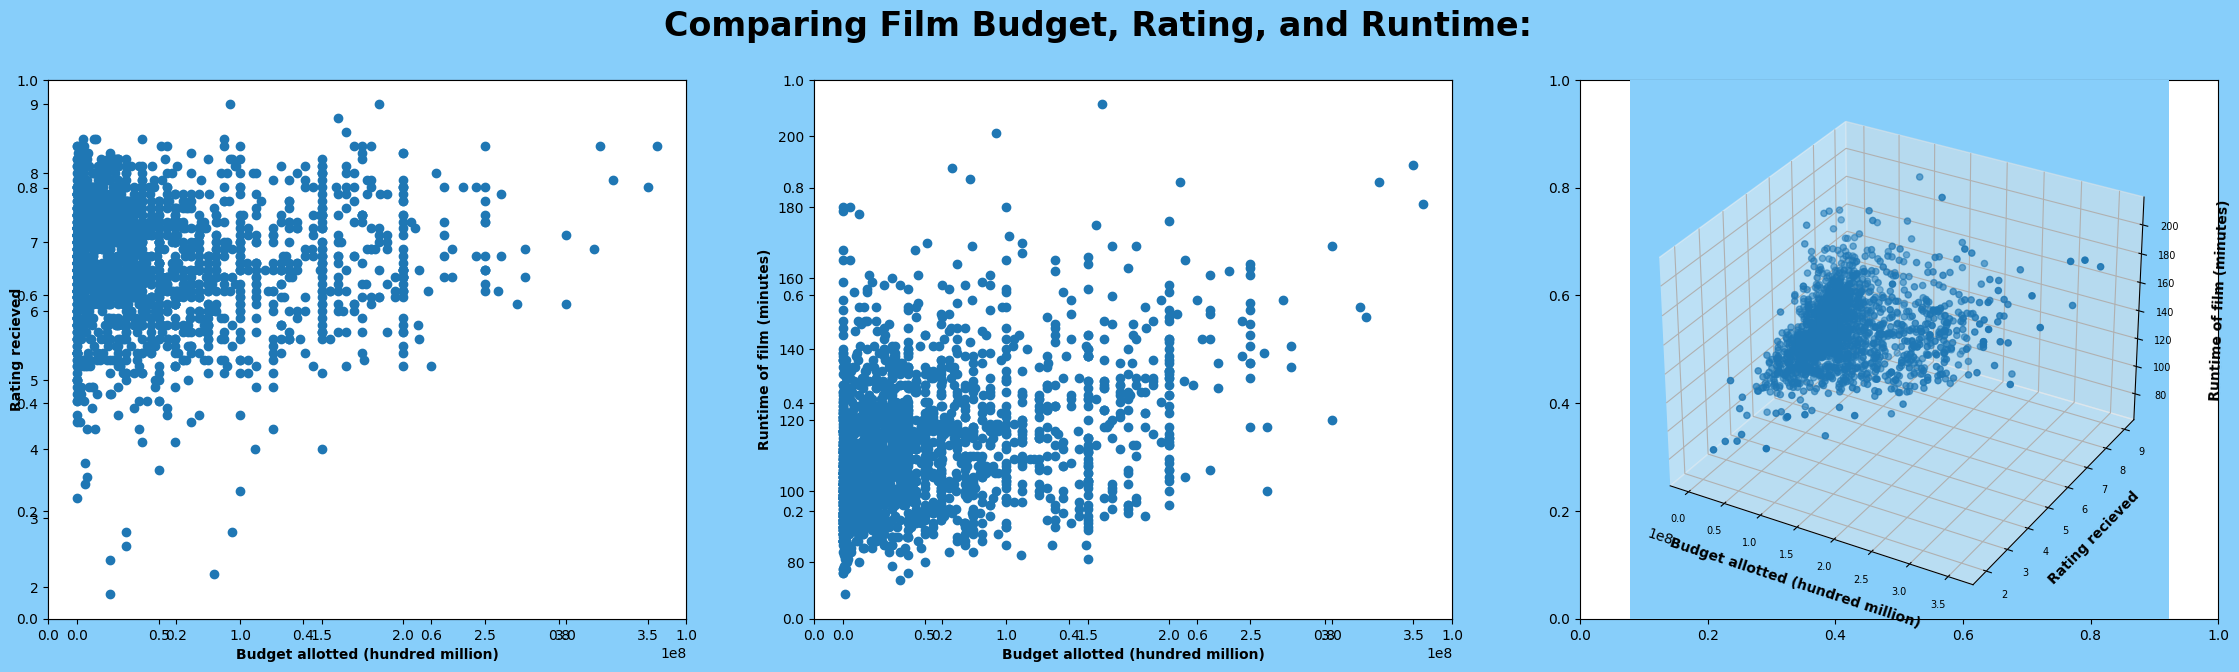

In [45]:
cert_dict = {
    'G': 0, 'PG': 1, 'PG-13': 2, 'TV-14': 3, 
    'R': 4, 'NC-17': 5, 'TV-MA': 6, 'Unrated': 7
}

# 3D display for budget, rating, and runtime.
fig, ax = plt.subplots(1, 3, figsize=(28, 7), facecolor="lightskyblue")
# fig = plt.figure(figsize=(24, 8), facecolor="lightskyblue")
ax[0] = fig.add_subplot(1, 3, 1)
ax[1] = fig.add_subplot(1, 3, 2)
ax[2] = fig.add_subplot(1, 3, 3, projection="3d", facecolor="lightskyblue")
fig.suptitle('Comparing Film Budget, Rating, and Runtime:', fontsize=24, fontweight='bold')
x_ticks = list(cert_dict.keys())

ax[0].scatter(BI['Budget'], BI['Rating'])
ax[0].set_xlabel('Budget allotted (hundred million)', fontweight='bold')
ax[0].set_ylabel('Rating recieved', fontweight='bold')

ax[1].scatter(BI['Budget'], BI['Runtime'])
ax[1].set_xlabel('Budget allotted (hundred million)', fontweight='bold')
ax[1].set_ylabel('Runtime of film (minutes)', fontweight='bold')

# ax[2] = fig.add_subplot(1, 3, 3, projection="3d")
ax[2].scatter(BI['Budget'], BI['Rating'], BI['Runtime'])
ax[2].set_xlabel('Budget allotted (hundred million)', fontweight ='bold')
ax[2].set_ylabel('Rating recieved', fontweight ='bold')
ax[2].set_zlabel('Runtime of film (minutes)', fontweight ='bold', labelpad=15)
ax[2].tick_params(axis='both', which='both', labelsize=7)

1838
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>

month indices:
[12, 12, 8, 11, 12, 10, 12, 12, 11, 11, 12, 3, 11, 10, 11, 12, 9, 3, 8, 12, 9, 9, 5, 9, 3, 9, 11, 10, 10, 4, 12, 10, 12, 7, 7, 1, 11, 9, 9, 12, 7, 12, 11, 12, 11, 10, 9, 10, 6, 7, 3, 12, 12, 8, 10, 2, 2, 6, 12, 4, 12, 10, 12, 1, 10, 11, 8, 12, 6, 12, 12, 12, 4, 10, 3, 12, 11, 10, 8, 10, 11, 11, 12, 11, 5, 7, 6, 8, 10, 2, 12, 9, 12, 5, 7, 11, 7, 10, 11, 11, 9, 6, 11, 7, 5, 3, 3, 5, 12, 11, 1, 11, 4, 10, 12, 7, 10, 9, 11, 9, 11, 10, 7, 11, 1, 12, 7, 5, 12, 11, 8, 10, 6, 12, 10, 7, 3, 7, 12, 6, 6, 9, 11, 3, 11, 10, 12, 12, 12, 5, 2, 11, 11, 5, 9, 10, 10, 8, 3, 2, 1, 12, 11, 2, 3, 9, 8, 11, 2, 7, 2, 6, 3, 10, 10, 10, 3, 10, 12, 7, 12, 2, 2, 8, 7, 10, 8, 12, 12, 1, 5, 10, 2, 11, 10, 1, 1, 4, 5, 9, 10, 6, 3, 1, 4, 2, 11, 11, 7, 7, 4, 10, 1, 11, 10, 12, 8, 2, 1, 11, 12, 4, 11, 11, 4, 3, 12, 12, 11, 11, 11, 3, 5, 12, 11, 3, 9, 11, 9, 5, 8, 3, 1, 7, 11, 7, 12, 12, 2, 12, 9, 12, 1, 6, 8, 9, 11, 4, 5, 6, 

Text(0, 0.5, 'Net profit made (billion)')

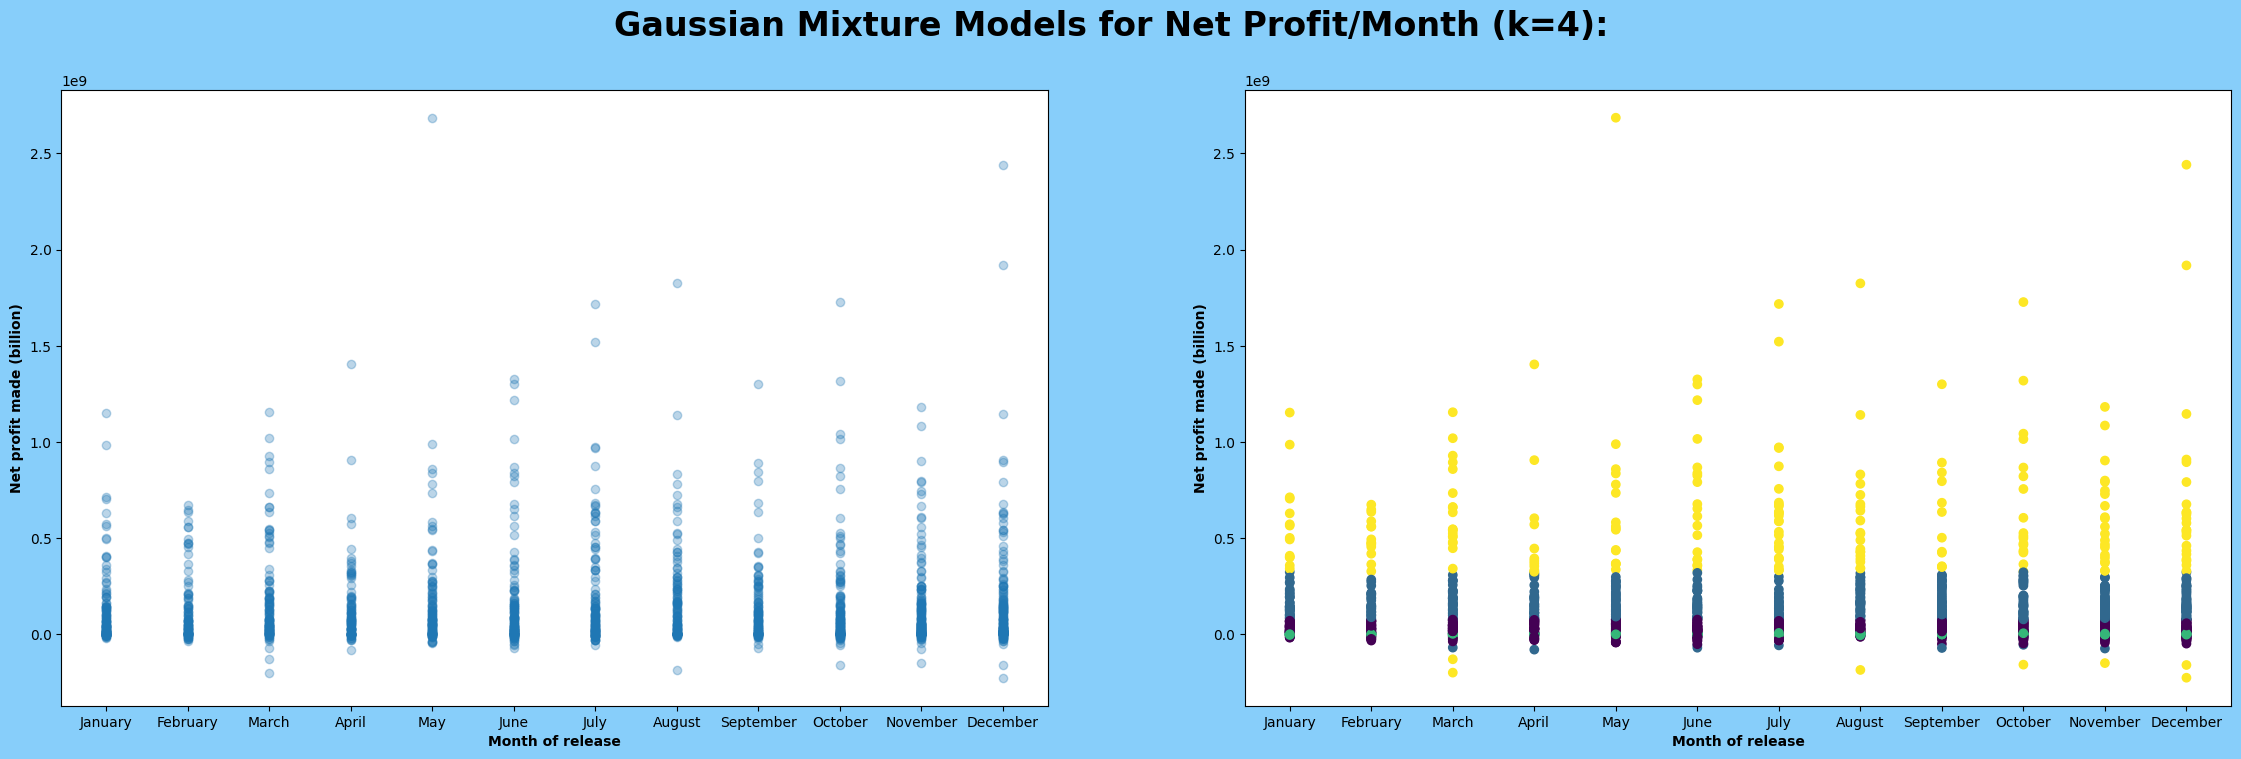

In [46]:
# Running GMM on month of release and net profit made.
months = buds['Month']
netGain_months = buds.loc[:, 'Income'] - buds.loc[:, 'Budget']
print(len(months))
print(type(months))
print(type(netGain_months))

# Format data.
mth_indices = list(map(lambda _: mth_idx_dict.get(_), months))
print('\nmonth indices:')
print(mth_indices)

mth_series = pd.Series(mth_indices).rename('Months')
print(mth_series)

zipped = pd.DataFrame(mth_series).join(netGain_months.rename('NetGainMonths'))
zipped.columns = ['Months', 'NetGainMonths']
zipped = zipped.dropna()
print('\nzipped data:')
print(zipped)

# Cluster and plot.
pmi1, mu1, sig1, p1, d1 = GMM(zipped, 4)
clust_assign = np.argmax(pmi1, axis=1)

# Creating display of GMM for clustering by film budget and rating received.
fig, ax = plt.subplots(1, 2, figsize=(28, 8), facecolor="lightskyblue")
fig.suptitle('Gaussian Mixture Models for Net Profit/Month (k=4):', fontsize=24, fontweight='bold')
x_ticks = mth_idx_dict.keys()

ax[0].scatter(zipped['Months'], zipped['NetGainMonths'], alpha = 0.3)
ax[0].set_xlabel('Month of release', fontweight='bold')
ax[0].set_xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
ax[0].set_xticklabels(x_ticks)
ax[0].set_ylabel('Net profit made (billion)', fontweight='bold')

ax[1].scatter(zipped['Months'], zipped['NetGainMonths'], c=clust_assign)
ax[1].set_xlabel('Month of release', fontweight='bold')
ax[1].set_xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
ax[1].set_xticklabels(x_ticks)
ax[1].set_ylabel('Net profit made (billion)', fontweight='bold')

months:
['April', 'April', 'April', 'April', 'April', 'April', 'April', 'April', 'April', 'April', 'April', 'April', 'April', 'April', 'April', 'April', 'April', 'April', 'April', 'April', 'April', 'April', 'April', 'April', 'April', 'April', 'April', 'April', 'April', 'April', 'April', 'April', 'April', 'April', 'April', 'April', 'April', 'April', 'April', 'April', 'April', 'April', 'April', 'April', 'April', 'April', 'April', 'April', 'April', 'April', 'April', 'April', 'April', 'April', 'April', 'April', 'April', 'April', 'April', 'April', 'April', 'April', 'April', 'April', 'April', 'April', 'April', 'April', 'April', 'April', 'April', 'April', 'April', 'April', 'April', 'April', 'April', 'April', 'April', 'April', 'April', 'April', 'April', 'April', 'April', 'April', 'April', 'April', 'April', 'April', 'April', 'April', 'April', 'April', 'April', 'April', 'April', 'April', 'April', 'April', 'April', 'April', 'April', 'April', 'April', 'April', 'April', 'April', 'April', 'April', '

Text(0, 0.5, 'Runtime of film (minutes)')

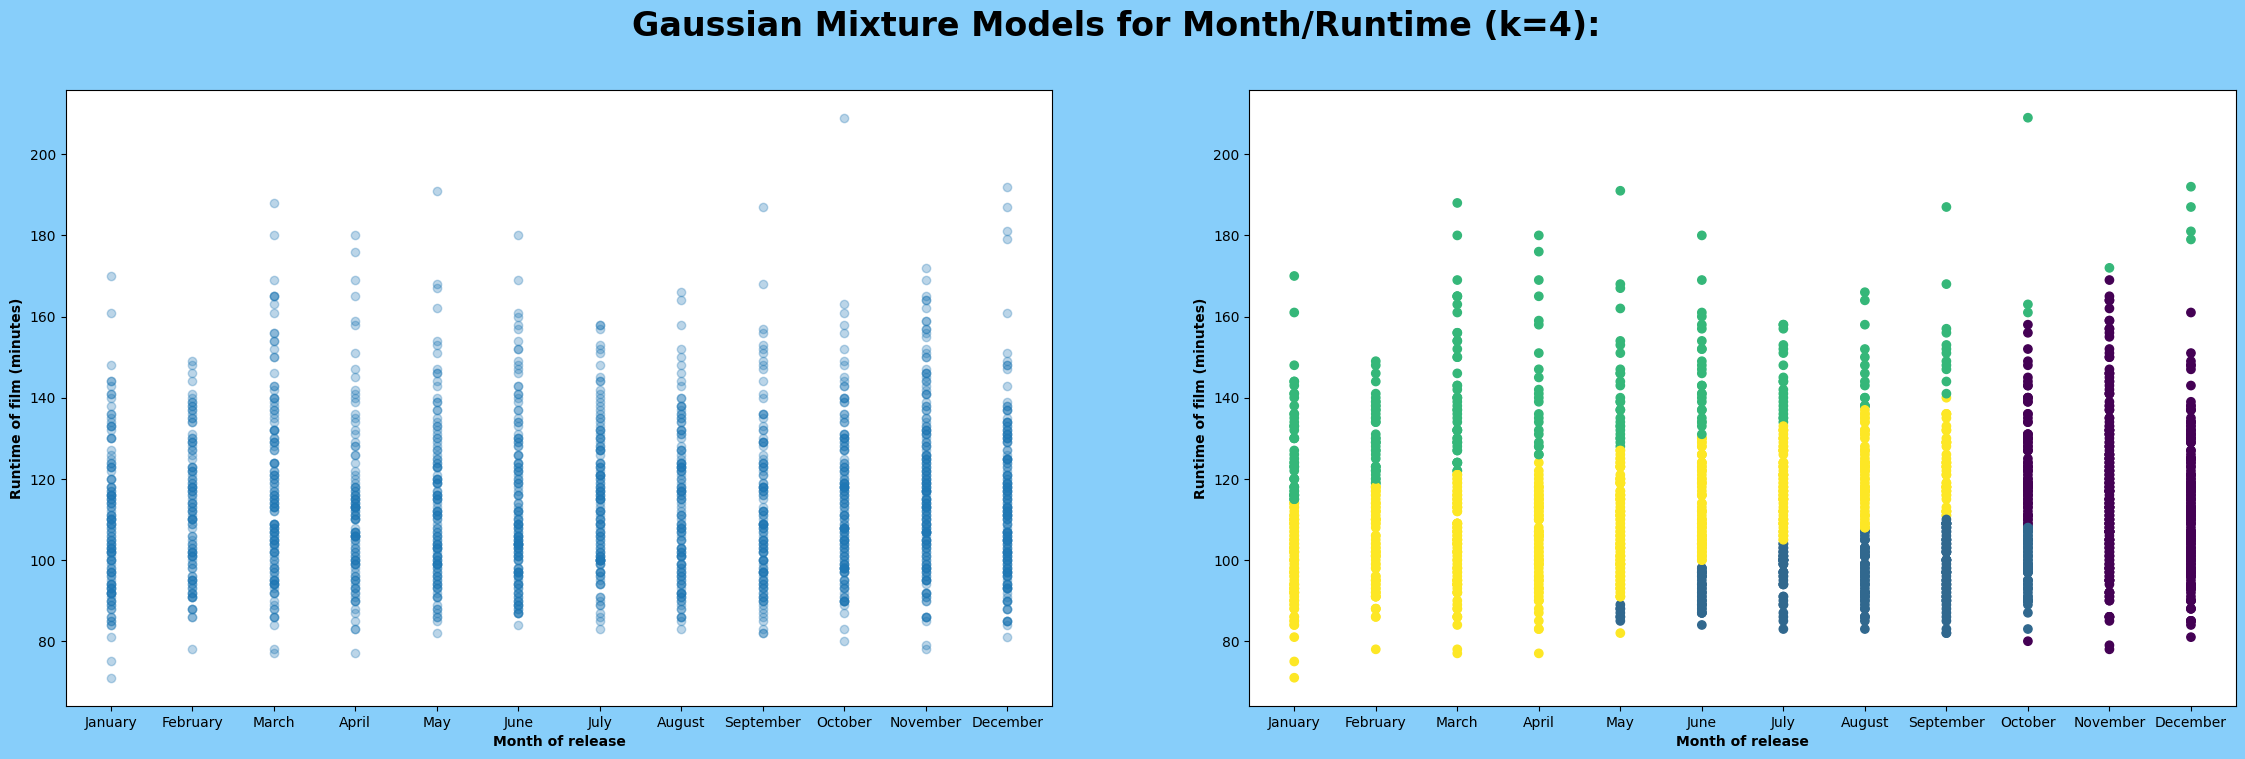

In [47]:
# Pull month col, convert to indices (0-12).as_integer_ratio
months = BI[BI['Month'] != '2008']['Month']
print('months:')
print(sorted(months))

mth_idx_dict = {
    "January": 1, "February": 2, "March": 3, "April": 4, "May": 5, "June": 6, 
    "July": 7, "August": 8, "September": 9, "October": 10, "November": 11, "December": 12
}

# Format data.
mth_indices = list(map(lambda _: mth_idx_dict.get(_), months))
print('\nmonth indices:')
print(mth_indices)

zipped = pd.DataFrame(mth_indices).join(BI['Runtime'])
zipped.columns = ['Month', 'Runtime']
zipped = zipped.dropna()
print('\nzipped data:')
print(zipped)

# Cluster and plot.
pmi1, mu1, sig1, p1, d1 = GMM(zipped, 4)
clust_assign = np.argmax(pmi1, axis=1)

# Creating display of GMM for clustering by film budget and rating received.
fig, ax = plt.subplots(1, 2, figsize=(28, 8), facecolor="lightskyblue")
fig.suptitle('Gaussian Mixture Models for Month/Runtime (k=4):', fontsize=24, fontweight='bold')
x_ticks = list(mth_idx_dict.keys())

ax[0].scatter(zipped['Month'], zipped['Runtime'], alpha = 0.3)
ax[0].set_xlabel('Month of release', fontweight='bold')
ax[0].set_xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
ax[0].set_xticklabels(x_ticks)
ax[0].set_ylabel('Runtime of film (minutes)', fontweight='bold')

ax[1].scatter(zipped['Month'], zipped['Runtime'], c=clust_assign)
ax[1].set_xlabel('Month of release', fontweight='bold')
ax[1].set_xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
ax[1].set_xticklabels(x_ticks)
ax[1].set_ylabel('Runtime of film (minutes)', fontweight='bold')

certificates:
['PG-13', 'PG', 'R', 'R', 'PG-13', 'R', 'R', 'R', 'PG-13', 'R', 'R', 'R', 'R', 'PG-13', 'PG-13', 'PG-13', 'R', 'R', 'R', 'TV-MA', 'R', 'PG', 'PG-13', 'R', 'PG-13', 'R', 'R', 'PG-13', 'PG-13', 'R', 'PG', 'R', 'R', 'PG-13', 'R', 'PG', 'R', 'PG-13', 'R', 'PG-13', 'R', 'R', 'PG', 'PG-13', 'PG-13', 'TV-MA', 'PG-13', 'PG-13', 'PG-13', 'R', 'PG-13', 'R', 'PG-13', 'PG-13', 'PG-13', 'PG-13', 'R', 'TV-14', 'PG-13', 'PG-13', 'R', 'PG-13', 'PG', 'R', 'R', 'R', 'R', 'R', 'PG', 'R', 'R', 'R', 'R', 'PG-13', 'R', 'PG-13', 'R', 'R', 'PG', 'R', 'PG-13', 'R', 'PG-13', 'PG-13', 'PG-13', 'R', 'PG-13', 'R', 'PG-13', 'PG-13', 'PG-13', 'PG-13', 'PG-13', 'R', 'R', 'PG-13', 'PG-13', 'R', 'PG', 'PG-13', 'PG-13', 'R', 'PG', 'PG-13', 'PG-13', 'Unrated', 'R', 'R', 'R', 'PG-13', 'PG-13', 'R', 'R', 'PG', 'PG-13', 'R', 'PG-13', 'R', 'PG-13', 'Unrated', 'R', 'R', 'R', 'TV-MA', 'R', 'R', 'R', 'R', 'PG', 'R', 'R', 'R', 'PG', 'R', 'PG-13', 'R', 'TV-MA', 'PG-13', 'PG-13', 'PG', 'R', 'R', 'PG-13', 'R', 'PG-13'

Text(0, 0.5, 'Budget allotted (hundred million)')

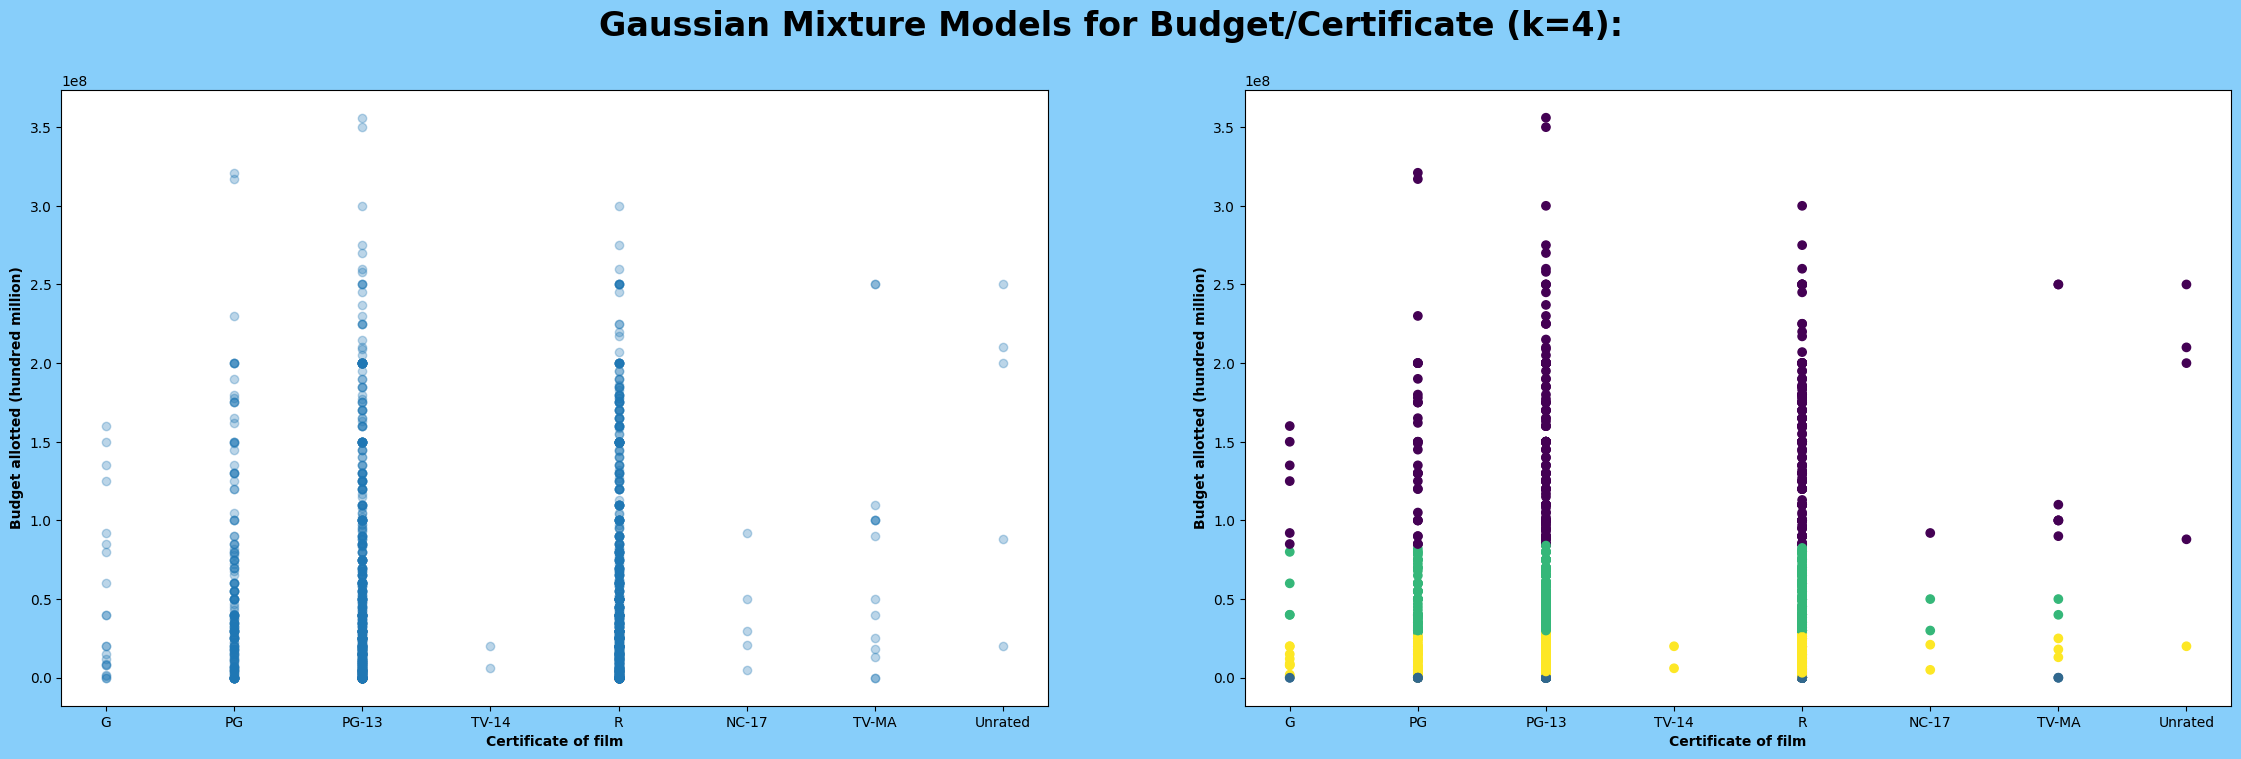

In [48]:
# Creating GMM and clustering by budget vs. certificate of film.
cert_dict = {
    'G': 0, 'PG': 1, 'PG-13': 2, 'TV-14': 3, 
    'R': 4, 'NC-17': 5, 'TV-MA': 6, 'Unrated': 7
}

buds = buds[buds['Certificate'] != 'Not Rated']
certs = buds['Certificate']
cert_idxs = list(map(lambda _: cert_dict.get(_), certs))

print('certificates:')
print(certs.tolist())
print('\ncertificate indices:')
print(cert_idxs)

zipped = pd.DataFrame(cert_idxs).join(buds['Budget'])
zipped.columns = ['Certificate', 'Budget']
zipped = zipped.dropna()
print('\nzipped data:')
print(zipped)

# Cluster and plot.
pmi1, mu1, sig1, p1, d1 = GMM(zipped, 4)
clust_assign = np.argmax(pmi1, axis=1)

# Creating display of GMM for clustering by film budget and rating received.
fig, ax = plt.subplots(1, 2, figsize=(28, 8), facecolor="lightskyblue")
fig.suptitle('Gaussian Mixture Models for Budget/Certificate (k=4):', fontsize=24, fontweight='bold')
x_ticks = list(cert_dict.keys())

ax[0].scatter(zipped['Certificate'], zipped['Budget'], alpha = 0.3)
ax[0].set_xlabel('Certificate of film', fontweight='bold')
ax[0].set_xticks([0, 1, 2, 3, 4, 5, 6, 7])
ax[0].set_xticklabels(x_ticks)
ax[0].set_ylabel('Budget allotted (hundred million)', fontweight='bold')

ax[1].scatter(zipped['Certificate'], zipped['Budget'], c=clust_assign)
ax[1].set_xlabel('Certificate of film', fontweight='bold')
ax[1].set_xticks([0, 1, 2, 3, 4, 5, 6, 7])
ax[1].set_xticklabels(x_ticks)
ax[1].set_ylabel('Budget allotted (hundred million)', fontweight='bold')

1784
<class 'pandas.core.series.Series'>
<class 'list'>
1784
0       2
1       1
2       4
3       4
4       2
       ..
1779    4
1780    2
1781    4
1782    4
1783    4
Name: Certificates, Length: 1784, dtype: int64

zipped data:
      Certificate       NetGain
0               2  1917946983.0
1               1   -34891033.0
2               4   153368602.0
3               4    19720823.0
4               2   159253910.0
...           ...           ...
1779            4     9598131.0
1780            2   -24018452.0
1781            4    40442443.0
1782            4    20684149.0
1783            4   -11588043.0

[1574 rows x 2 columns]


Text(0, 0.5, 'Net profit made (billion)')

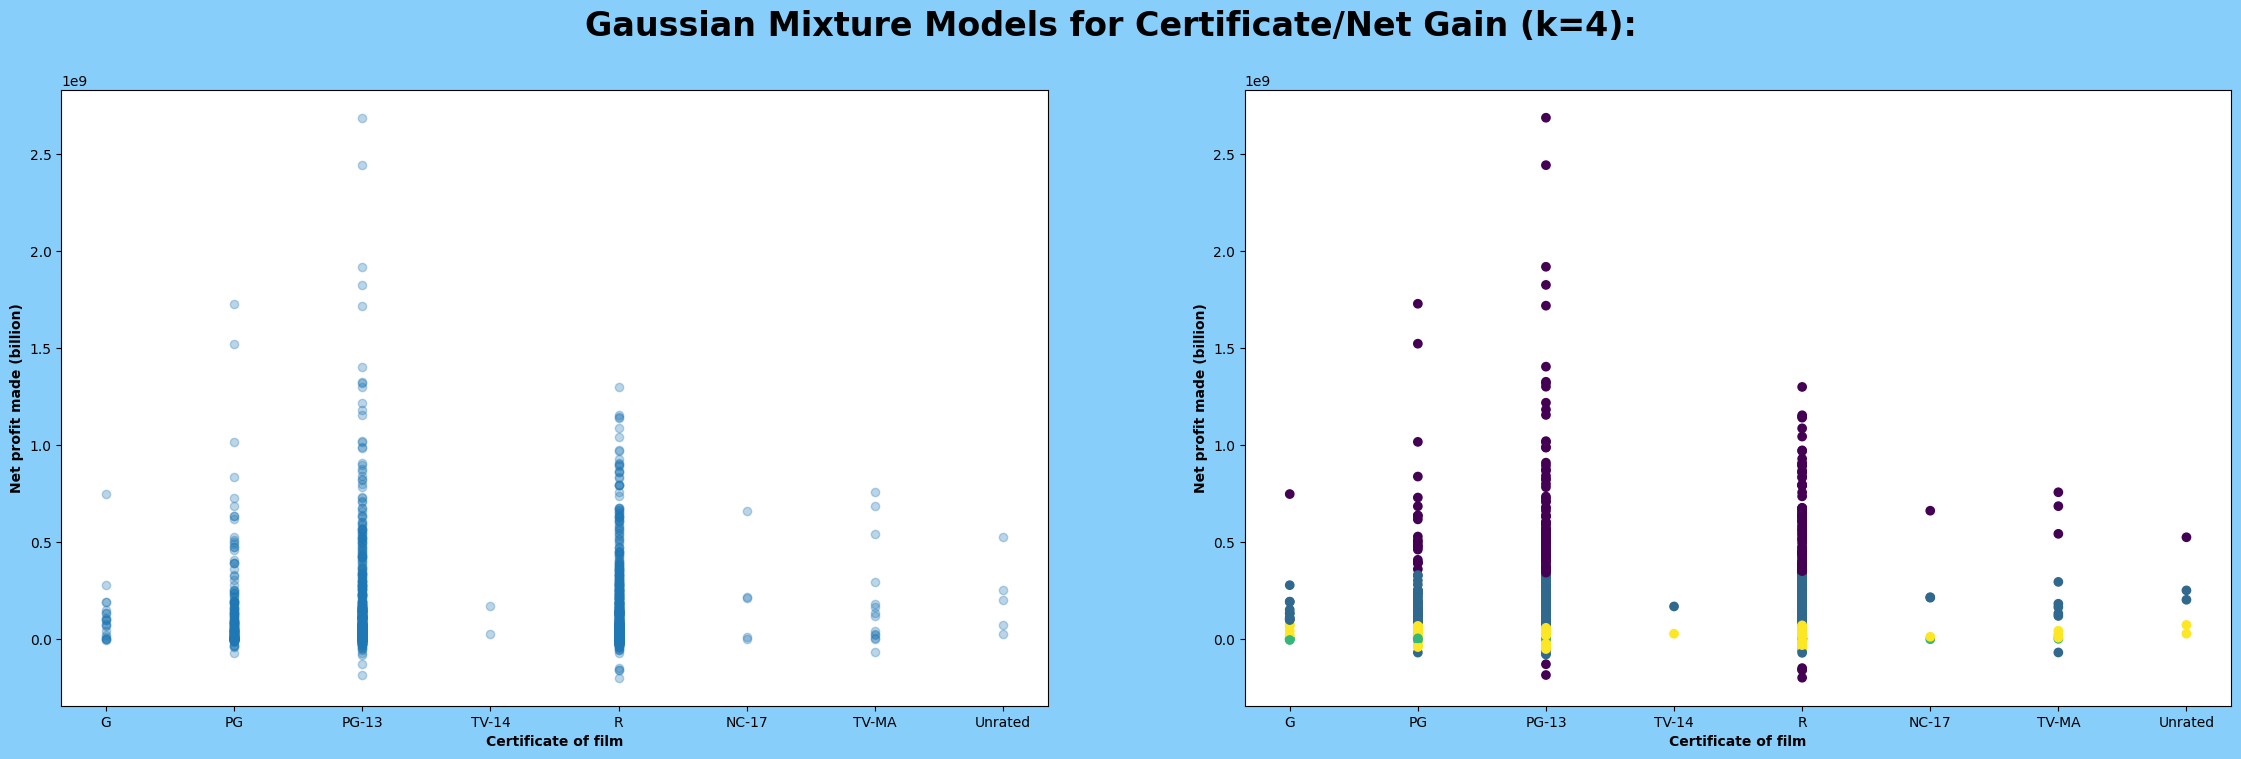

In [49]:
# Creating GMM and clustering by certificate of film vs. net profit made.
netGains = buds.loc[:, 'Income'] - buds.loc[:, 'Budget']
print(len(cert_idxs))
print(type(netGains))
print(type(cert_idxs))
print(len(list(netGains)))
cert_series = pd.Series(cert_idxs).rename('Certificates')
print(cert_series)

zipped = pd.DataFrame(cert_series).join(netGains.rename('netGains'))
zipped.columns = ['Certificate', 'NetGain']
zipped = zipped.dropna()
print('\nzipped data:')
print(zipped)

# Cluster and plot.
pmi1, mu1, sig1, p1, d1 = GMM(zipped, 4)
clust_assign = np.argmax(pmi1, axis=1)

# Creating display of GMM for clustering by film budget and rating received.
fig, ax = plt.subplots(1, 2, figsize=(28, 8), facecolor="lightskyblue")
fig.suptitle('Gaussian Mixture Models for Certificate/Net Gain (k=4):', fontsize=24, fontweight='bold')
x_ticks = list(cert_dict.keys())

ax[0].scatter(zipped['Certificate'], zipped['NetGain'], alpha = 0.3)
ax[0].set_xlabel('Certificate of film', fontweight='bold')
ax[0].set_xticks([0, 1, 2, 3, 4, 5, 6, 7])
ax[0].set_xticklabels(x_ticks)
ax[0].set_ylabel('Net profit made (billion)', fontweight='bold')

ax[1].scatter(zipped['Certificate'], zipped['NetGain'], c=clust_assign)
ax[1].set_xlabel('Certificate of film', fontweight='bold')
ax[1].set_xticks([0, 1, 2, 3, 4, 5, 6, 7])
ax[1].set_xticklabels(x_ticks)
ax[1].set_ylabel('Net profit made (billion)', fontweight='bold')

1785
1785

zipped data:
      Certificate  Rating
0               2     7.8
1               1     7.6
2               4     7.3
3               4     7.8
4               2     6.4
...           ...     ...
1780            4     2.2
1781            2     5.8
1782            4     7.5
1783            4     7.1
1784            4     7.3

[1576 rows x 2 columns]


Text(0, 0.5, 'Rating recieved')

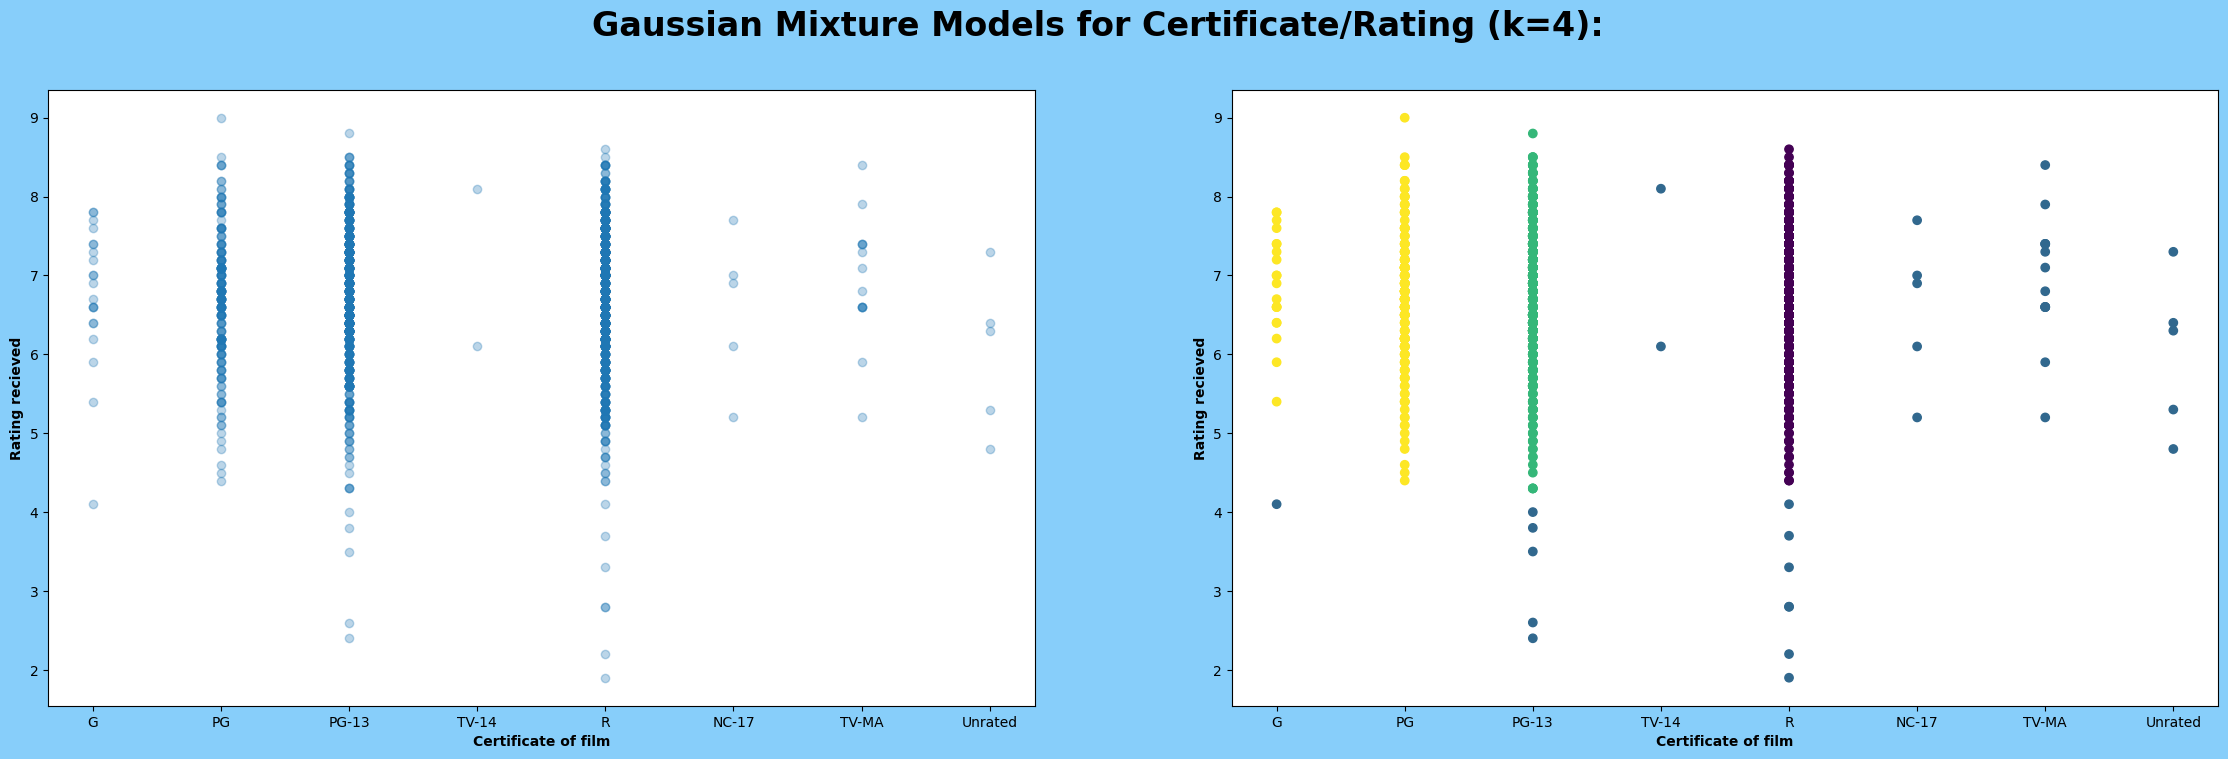

In [50]:
# Creating GMM and clustering by certificate of film vs. rating recieved.
cert_df = BI[BI['Certificate'] != 'Not Rated']
certs = buds['Certificate']
cert_idxs = list(map(lambda _: cert_dict.get(_), cert_df['Certificate']))

print(len(cert_idxs))
print(len(cert_df['Rating']))

zipped = pd.DataFrame(cert_idxs).join(cert_df['Rating'])
zipped.columns = ['Certificate', 'Rating']
zipped = zipped.dropna()
print('\nzipped data:')
print(zipped)

# Cluster and plot.
pmi1, mu1, sig1, p1, d1 = GMM(zipped, 4)
clust_assign = np.argmax(pmi1, axis=1)

# Creating display of GMM for clustering by film budget and rating received.
fig, ax = plt.subplots(1, 2, figsize=(28, 8), facecolor="lightskyblue")
fig.suptitle('Gaussian Mixture Models for Certificate/Rating (k=4):', fontsize=24, fontweight='bold')
x_ticks = list(cert_dict.keys())

ax[0].scatter(zipped['Certificate'], zipped['Rating'], alpha = 0.3)
ax[0].set_xlabel('Certificate of film', fontweight='bold')
ax[0].set_xticks([0, 1, 2, 3, 4, 5, 6, 7])
ax[0].set_xticklabels(x_ticks)
ax[0].set_ylabel('Rating recieved', fontweight='bold')

ax[1].scatter(zipped['Certificate'], zipped['Rating'], c=clust_assign)
ax[1].set_xlabel('Certificate of film', fontweight='bold')
ax[1].set_xticks([0, 1, 2, 3, 4, 5, 6, 7])
ax[1].set_xticklabels(x_ticks)
ax[1].set_ylabel('Rating recieved', fontweight='bold')

Text(0, 0.5, 'Runtime of film (minute)')

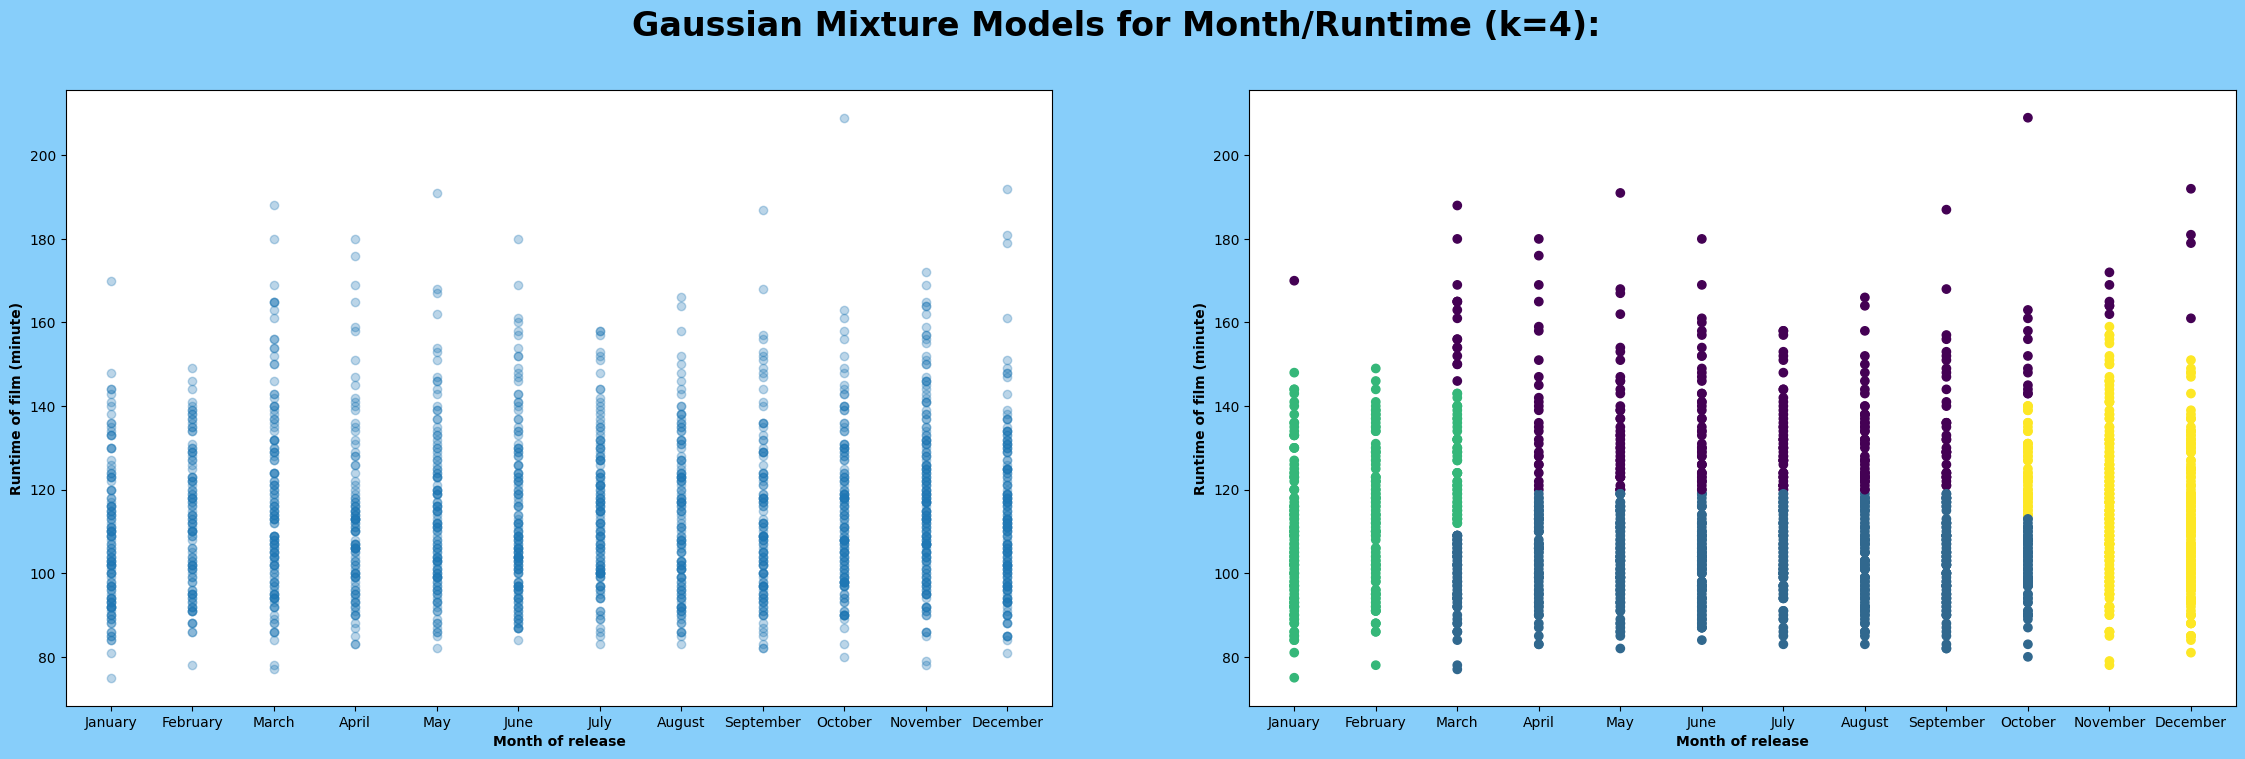

In [51]:
# GMM for month of release and runtime.

# Format data.
runtime_mths = buds['Runtime']
mth_indices = list(map(lambda _: mth_idx_dict.get(_), months))
mth_series = pd.Series(mth_indices).rename('Months')
zipped = pd.DataFrame(mth_series).join(runtime_mths.rename('RuntimeMonths'))
zipped.columns = ['Months', 'RuntimeMonths']
zipped = zipped.dropna()

# Cluster and plot.
pmi1, mu1, sig1, p1, d1 = GMM(zipped, 4)
clust_assign = np.argmax(pmi1, axis=1)

# Creating display of GMM for clustering by month of release and runtime of film.
fig, ax = plt.subplots(1, 2, figsize=(28, 8), facecolor="lightskyblue")
fig.suptitle('Gaussian Mixture Models for Month/Runtime (k=4):', fontsize=24, fontweight='bold')
x_ticks = mth_idx_dict.keys()

ax[0].scatter(zipped['Months'], zipped['RuntimeMonths'], alpha = 0.3)
ax[0].set_xlabel('Month of release', fontweight='bold')
ax[0].set_xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
ax[0].set_xticklabels(x_ticks)
ax[0].set_ylabel('Runtime of film (minute)', fontweight='bold')

ax[1].scatter(zipped['Months'], zipped['RuntimeMonths'], c=clust_assign)
ax[1].set_xlabel('Month of release', fontweight='bold')
ax[1].set_xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
ax[1].set_xticklabels(x_ticks)
ax[1].set_ylabel('Runtime of film (minute)', fontweight='bold')

[12, 12, 8, 11, 12, 10, 12, 12, 11, 11, 12, 3, 11, 10, 11, 12, 9, 3, 8, 12, 9, 9, 5, 9, 3, 9, 11, 10, 10, 4, 12, 10, 7, 7, 1, 11, 9, 9, 12, 7, 12, 11, 12, 11, 9, 10, 6, 7, 12, 12, 8, 10, 2, 2, 6, 12, 4, 12, 10, 12, 1, 10, 11, 8, 12, 6, 12, 12, 12, 4, 10, 3, 12, 11, 10, 8, 10, 11, 11, 12, 11, 5, 7, 6, 8, 10, 2, 12, 9, 12, 5, 7, 11, 7, 10, 11, 11, 9, 6, 11, 7, 5, 3, 3, 5, 12, 11, 1, 11, 4, 10, 12, 7, 10, 11, 9, 11, 10, 7, 11, 1, 12, 7, 5, 12, 11, 8, 10, 6, 12, 10, 7, 3, 7, 12, 6, 6, 9, 11, 3, 11, 10, 12, 12, 5, 2, 11, 11, 5, 9, 10, 10, 8, 3, 2, 1, 12, 11, 2, 3, 9, 8, 11, 2, 7, 2, 6, 3, 10, 10, 10, 3, 10, 12, 12, 2, 2, 8, 7, 10, 8, 12, 12, 1, 10, 2, 11, 10, 1, 1, 4, 5, 9, 10, 6, 3, 1, 2, 11, 11, 7, 7, 4, 10, 1, 11, 10, 12, 8, 2, 1, 11, 12, 4, 11, 11, 4, 3, 12, 12, 11, 11, 11, 3, 5, 12, 11, 3, 9, 11, 9, 5, 8, 3, 1, 7, 11, 7, 12, 12, 2, 12, 9, 12, 1, 6, 8, 9, 4, 5, 6, 5, 6, 11, 6, 11, 6, 12, 10, 2, 10, 3, 8, 3, 2, 8, 5, 1, 9, 9, 12, 5, 11, 8, 8, 6, 7, 7, 5, 11, 11, 11, 12, 2, 6, 4, 4, 11, 1

Text(0, 0.5, 'Certificate')

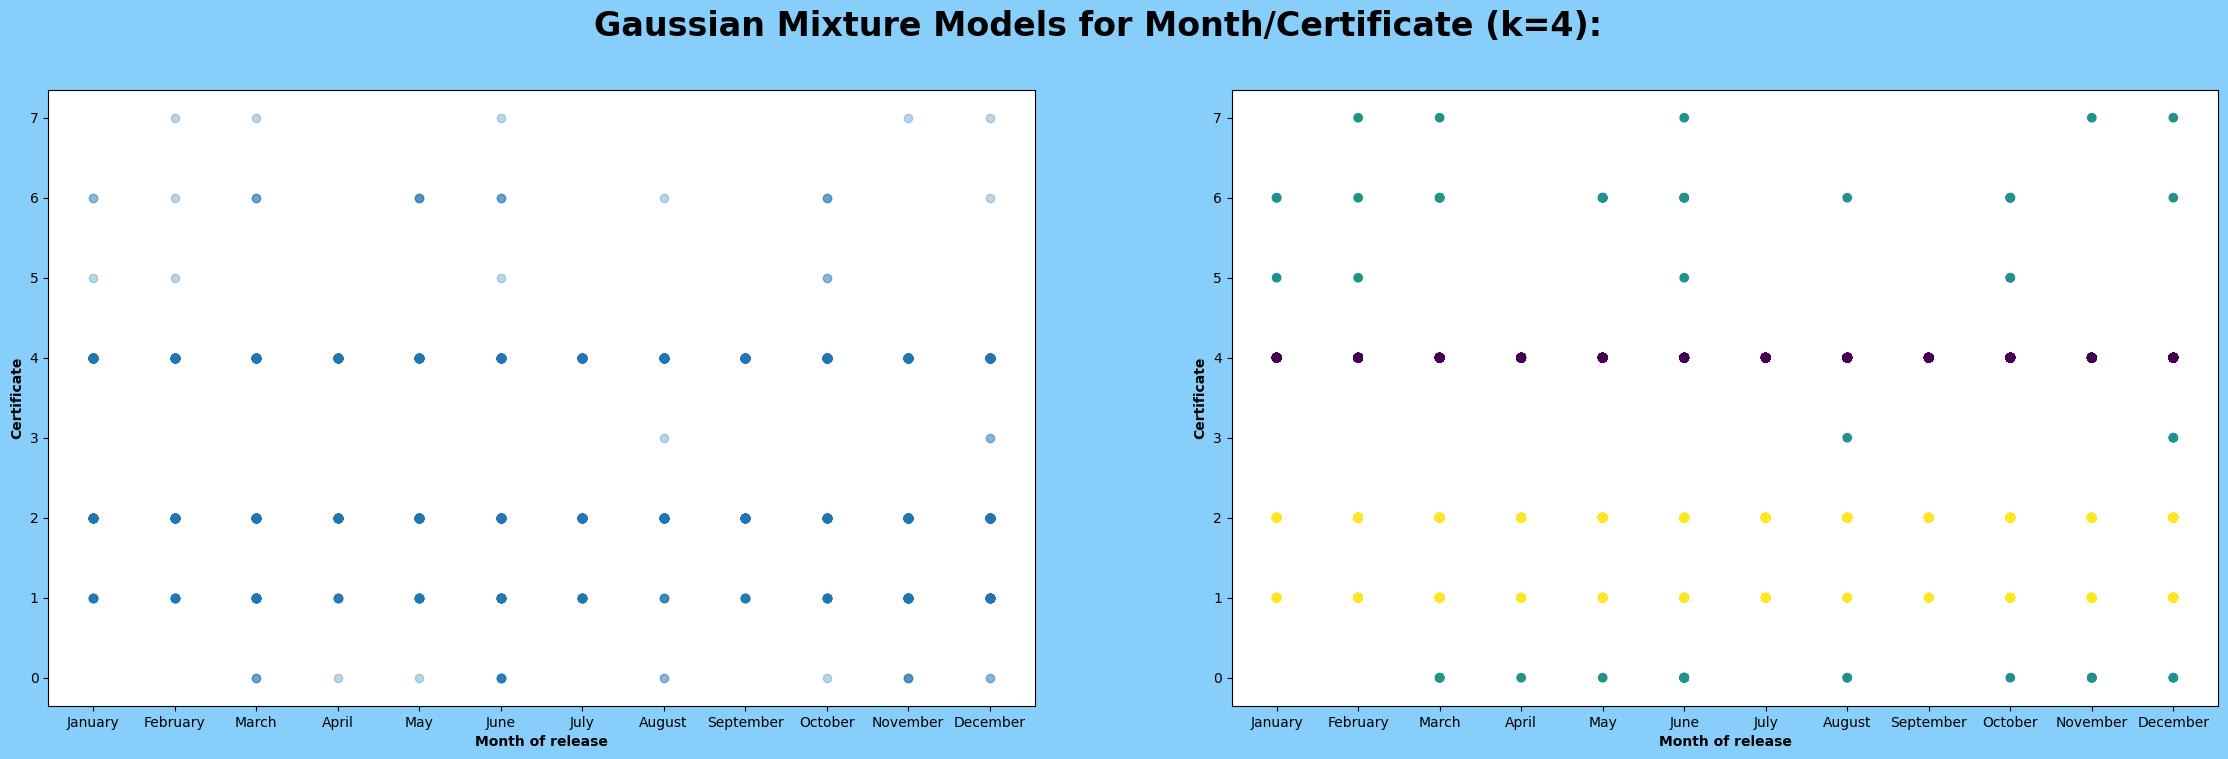

In [52]:
# GMM for month of release and certificate.

# Format data.
cert_df2 = buds[buds['Certificate'] != 'Not Rated']

months_cert = cert_df2[cert_df2['Month'] != '2008']['Month']
mth_indices = list(map(lambda _: mth_idx_dict.get(_), months_cert))
mth_series = pd.Series(mth_indices).rename('Months')

certs = cert_df2['Certificate']
cert_idxs = list(map(lambda _: cert_dict.get(_), certs))
cert_series = pd.Series(cert_idxs).rename('Certificates')
print(mth_indices)
print(cert_idxs)

zipped = pd.DataFrame(mth_series).join(cert_series)
zipped.columns = ['Months', 'CertMonths']
zipped = zipped.dropna()
print(zipped)

# Cluster and plot.
pmi1, mu1, sig1, p1, d1 = GMM(zipped, 4)
clust_assign = np.argmax(pmi1, axis=1)

# Creating display of GMM for clustering by month of release and runtime of film.
fig, ax = plt.subplots(1, 2, figsize=(28, 8), facecolor="lightskyblue")
fig.suptitle('Gaussian Mixture Models for Month/Certificate (k=4):', fontsize=24, fontweight='bold')
x_ticks = mth_idx_dict.keys()

ax[0].scatter(zipped['Months'], zipped['CertMonths'], alpha = 0.3)
ax[0].set_xlabel('Month of release', fontweight='bold')
ax[0].set_xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
ax[0].set_xticklabels(x_ticks)
ax[0].set_ylabel('Certificate', fontweight='bold')

ax[1].scatter(zipped['Months'], zipped['CertMonths'], c=clust_assign)
ax[1].set_xlabel('Month of release', fontweight='bold')
ax[1].set_xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
ax[1].set_xticklabels(x_ticks)
ax[1].set_ylabel('Certificate', fontweight='bold')

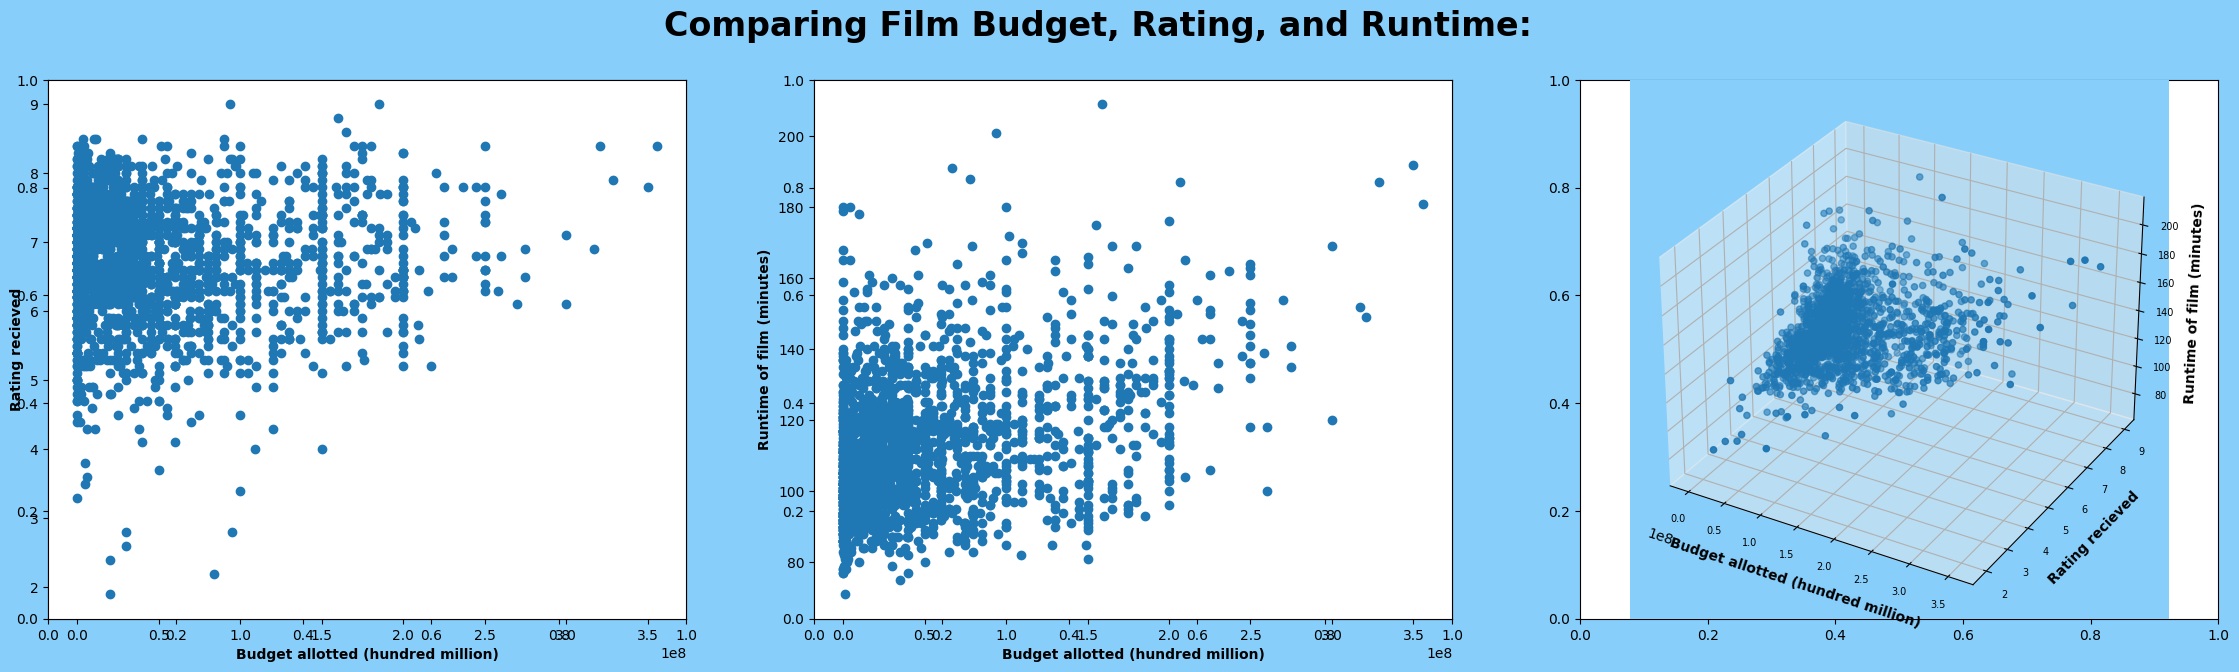

In [53]:
# 3D display for budget, rating, and runtime.
fig, ax = plt.subplots(1, 3, figsize=(28, 7), facecolor="lightskyblue")
# fig = plt.figure(figsize=(28, 7), facecolor="lightskyblue")
# ax = plt.axes()
ax[0] = fig.add_subplot(1, 3, 1)
ax[1] = fig.add_subplot(1, 3, 2)
ax[2] = fig.add_subplot(1, 3, 3, facecolor="lightskyblue", projection="3d")
fig.suptitle('Comparing Film Budget, Rating, and Runtime:', fontsize=24, fontweight='bold')
x_ticks = list(cert_dict.keys())

ax[0].scatter(BI['Budget'], BI['Rating'])
ax[0].set_xlabel('Budget allotted (hundred million)', fontweight='bold')
ax[0].set_ylabel('Rating recieved', fontweight='bold')

ax[1].scatter(BI['Budget'], BI['Runtime'])
ax[1].set_xlabel('Budget allotted (hundred million)', fontweight='bold')
ax[1].set_ylabel('Runtime of film (minutes)', fontweight='bold')

ax[2].scatter(BI['Budget'], BI['Rating'], BI['Runtime'])
ax[2].set_xlabel('Budget allotted (hundred million)', fontweight ='bold')
ax[2].set_ylabel('Rating recieved', fontweight ='bold')
ax[2].set_zlabel('Runtime of film (minutes)', fontweight ='bold')
ax[2].tick_params(axis='both', which='both', labelsize=7)

Observations: There seems to be many movies bundled around the same ranges of budget, rating, and runtime.

There is a cluster of movies having a budget of less than $200,000,000, an average rating of 5/10 - 8.5/10, and a runtime of between 80 - 160 minutes.

It will be interesting to see if these movies produce high net profits.

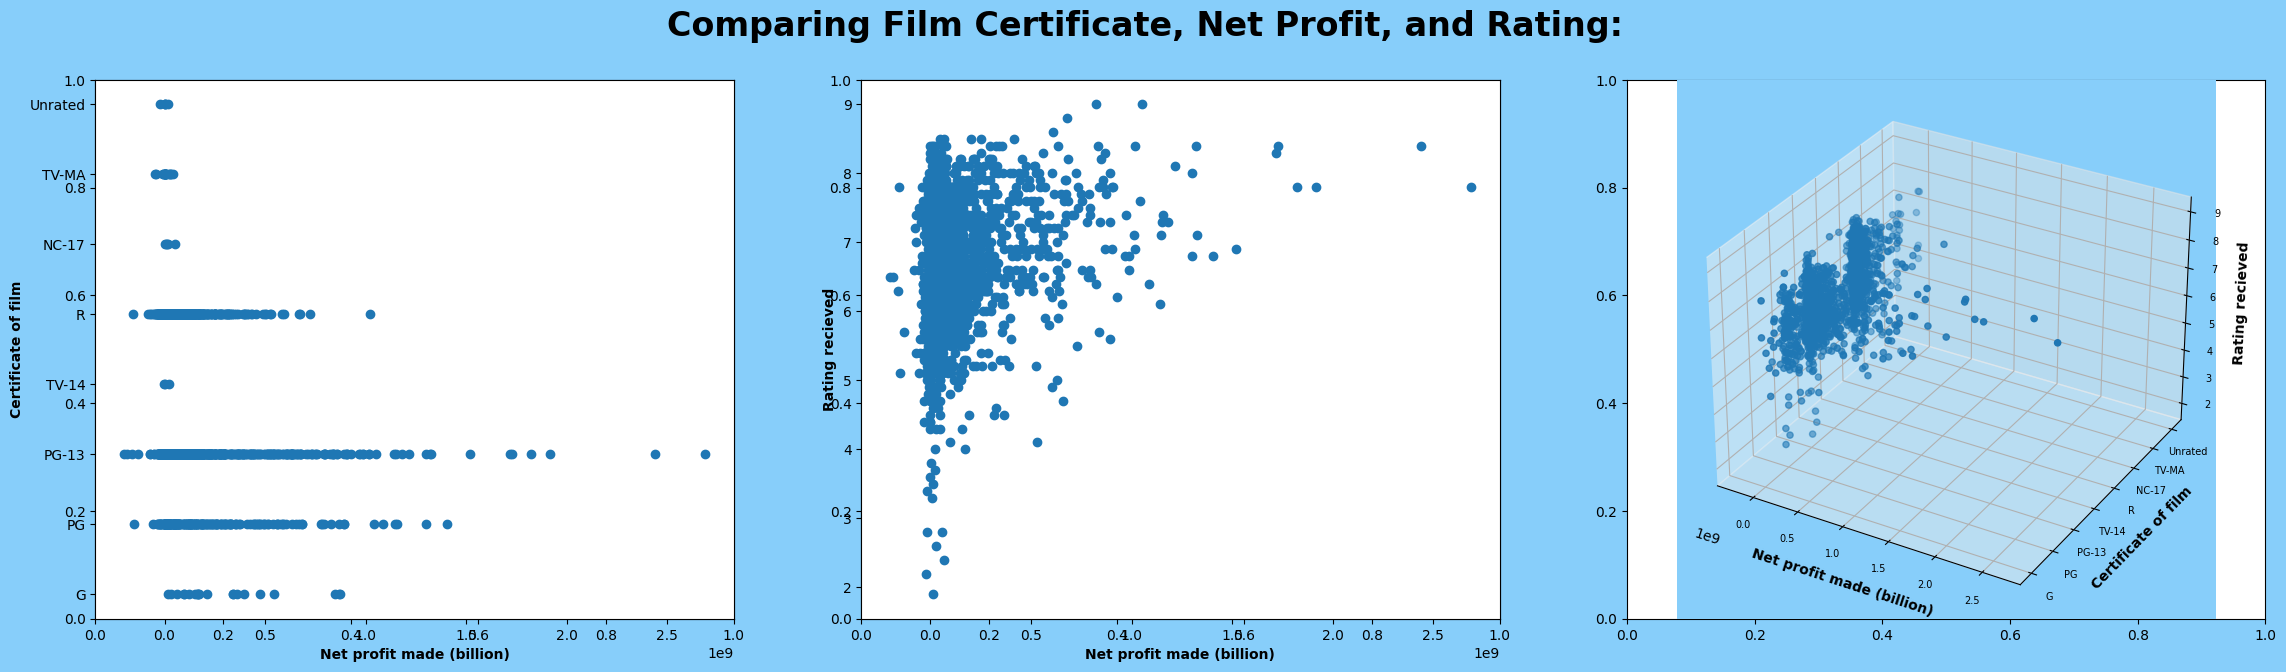

In [54]:
# 3D display for certificate, net gain, and rating.
netGain2 = buds.loc[:, 'Income'] - buds.loc[:, 'Budget']
ratings2 = list(buds['Rating'])

# fig = plt.figure(figsize=(28, 7), facecolor="lightskyblue")
fig, ax = plt.subplots(1, 3, figsize=(28, 7), facecolor="lightskyblue")
ax[0] = fig.add_subplot(1, 3, 1)
ax[1] = fig.add_subplot(1, 3, 2)
ax[2] = fig.add_subplot(1, 3, 3, facecolor="lightskyblue", projection="3d")
fig.suptitle('Comparing Film Certificate, Net Profit, and Rating:', fontsize=24, fontweight='bold')
y_ticks = list(cert_dict.keys())

ax[0].scatter(netGain2, cert_idxs)
ax[0].set_xlabel('Net profit made (billion)', fontweight='bold')
ax[0].set_ylabel('Certificate of film', fontweight='bold')
ax[0].set_yticks([0, 1, 2, 3, 4, 5, 6, 7])
ax[0].set_yticklabels(y_ticks)

ax[1].scatter(netGain2, ratings2)
ax[1].set_xlabel('Net profit made (billion)', fontweight='bold')
ax[1].set_ylabel('Rating recieved', fontweight='bold')

ax[2].scatter(netGain2, cert_idxs, ratings2)
ax[2].set_xlabel('Net profit made (billion)', fontweight ='bold')
ax[2].set_ylabel('Certificate of film', fontweight ='bold')
ax[2].set_yticks([0, 1, 2, 3, 4, 5, 6, 7])
ax[2].set_yticklabels(y_ticks)
ax[2].set_zlabel('Rating recieved', fontweight ='bold')
ax[2].tick_params(axis='both', which='both', labelsize=7)

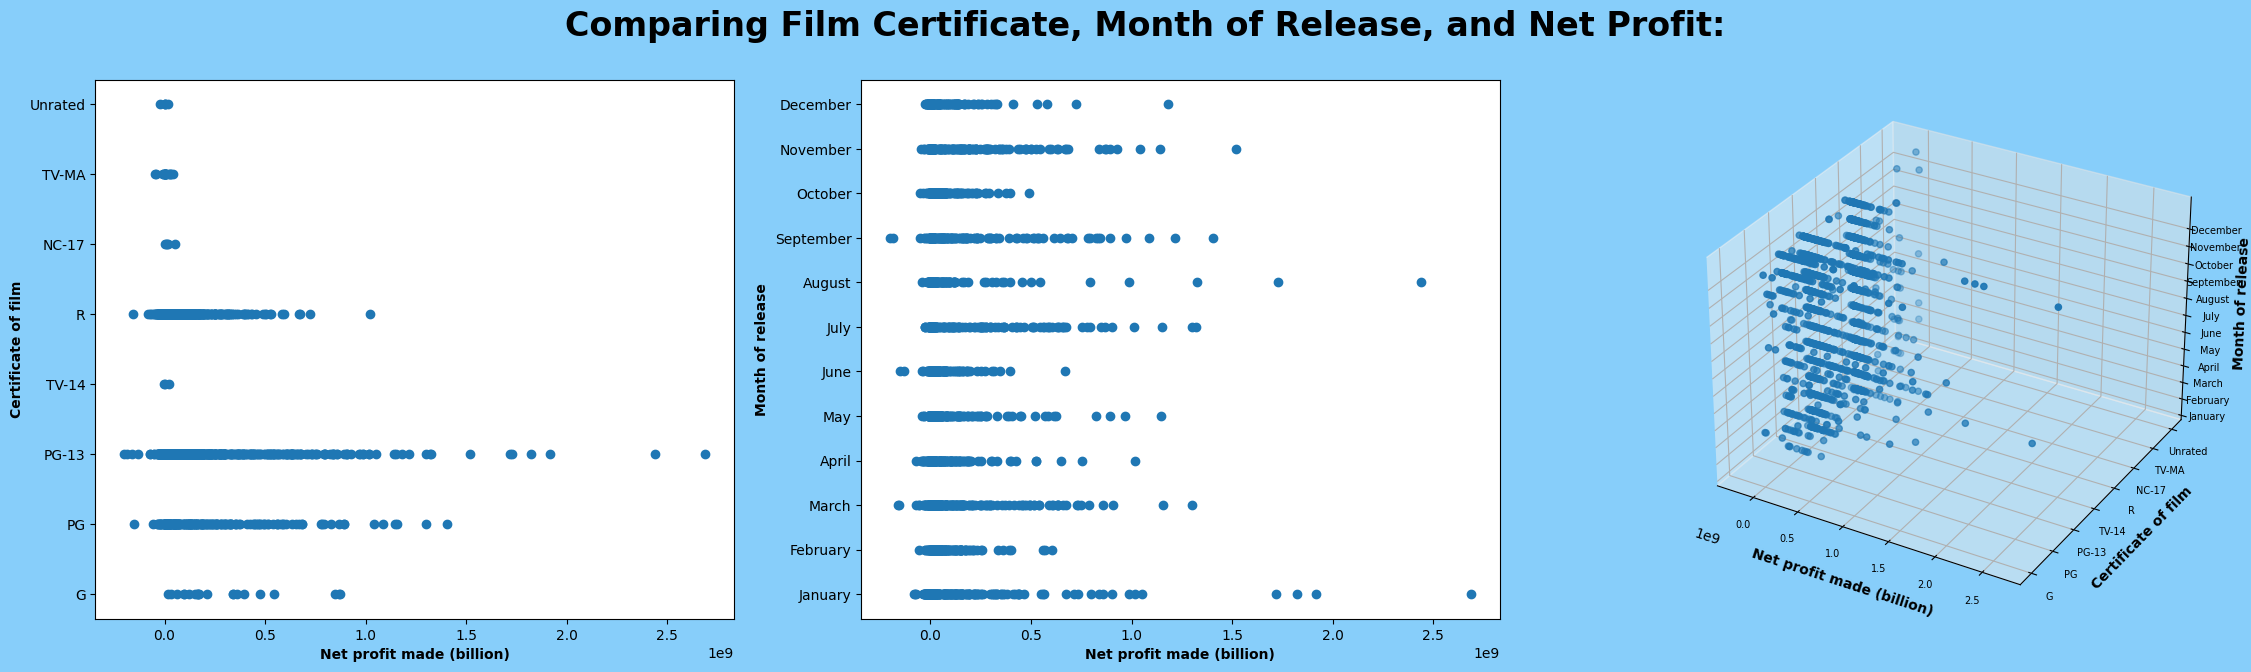

In [55]:
# Creating 3D display for certificate, month of release, and net profit.
cert_df = cert_df[cert_df['Month'] != '2008']
cert_idxs2 = list(map(lambda _: cert_dict.get(_), cert_df['Certificate']))
months2 = list(cert_df[cert_df['Month'] != '2008']['Month'])
mth_indices2 = list(map(lambda _: mth_idx_dict.get(_), months2))
netGain2 = list(cert_df.loc[:, 'Income'] - cert_df.loc[:, 'Budget'])

# certificates (w/ month): cert_idxs2
# net profit: netGain2
# ratings: cert_df['Rating']
# month indices: mth_indices2

fig = plt.figure(figsize=(28, 7), facecolor="lightskyblue")
ax[0] = fig.add_subplot(1, 3, 1)
ax[1] = fig.add_subplot(1, 3, 2)
ax[2] = fig.add_subplot(1, 3, 3, facecolor="lightskyblue", projection="3d")
fig.suptitle('Comparing Film Certificate, Month of Release, and Net Profit:', fontsize=24, fontweight='bold')
cert_ticks = list(cert_dict.keys())
mth_ticks = list(mth_idx_dict.keys())

ax[0].scatter(netGain2, cert_idxs2)
ax[0].set_xlabel('Net profit made (billion)', fontweight='bold')
ax[0].set_ylabel('Certificate of film', fontweight='bold')
ax[0].set_yticks([0, 1, 2, 3, 4, 5, 6, 7])
ax[0].set_yticklabels(cert_ticks)

ax[1].scatter(netGain2, months2)
ax[1].set_xlabel('Net profit made (billion)', fontweight='bold')
ax[1].set_ylabel('Month of release', fontweight='bold')
ax[1].set_yticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
ax[1].set_yticklabels(mth_ticks)

ax[2].scatter(netGain2, cert_idxs2, mth_indices2)
ax[2].set_xlabel('Net profit made (billion)', fontweight ='bold')
ax[2].set_ylabel('Certificate of film', fontweight ='bold')
ax[2].set_yticks([0, 1, 2, 3, 4, 5, 6, 7])
ax[2].set_yticklabels(cert_ticks)
ax[2].set_zlabel('Month of release', fontweight ='bold')
ax[2].set_zticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
ax[2].set_zticklabels(mth_ticks)
ax[2].tick_params(axis='both', which='both', labelsize=7)


sns.pairplot(df2)

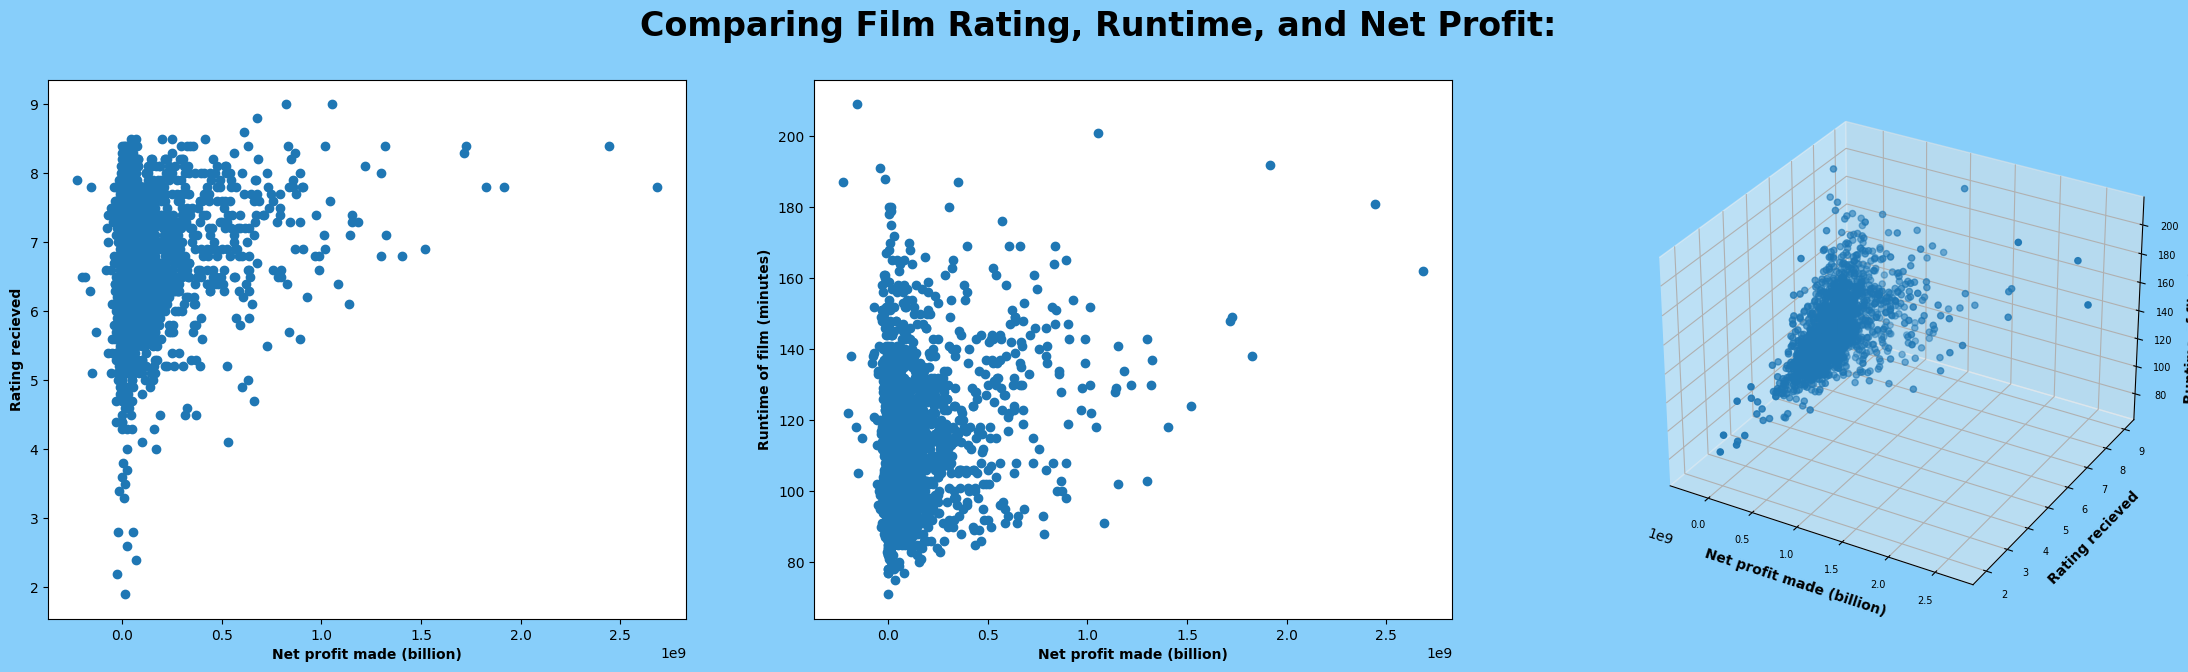

In [56]:
# Creating comparison for rating, runtime, and net profit.
# 3D display for budget, rating, and runtime.
# fig, ax = plt.subplots(1, 3, figsize=(28, 7), facecolor="lightskyblue")
fig = plt.figure(figsize=(28, 7), facecolor="lightskyblue")
ax[0] = fig.add_subplot(1, 3, 1)
ax[1] = fig.add_subplot(1, 3, 2)
ax[2] = fig.add_subplot(1, 3, 3, facecolor="lightskyblue", projection="3d")
fig.suptitle('Comparing Film Rating, Runtime, and Net Profit:', fontsize=24, fontweight='bold')
x_ticks = list(cert_dict.keys())

ax[0].scatter(netGain, BI['Rating'])
ax[0].set_xlabel('Net profit made (billion)', fontweight='bold')
ax[0].set_ylabel('Rating recieved', fontweight='bold')

ax[1].scatter(netGain, BI['Runtime'])
ax[1].set_xlabel('Net profit made (billion)', fontweight='bold')
ax[1].set_ylabel('Runtime of film (minutes)', fontweight='bold')

ax[2].scatter(netGain, BI['Rating'], BI['Runtime'])
ax[2].set_xlabel('Net profit made (billion)', fontweight ='bold')
ax[2].set_ylabel('Rating recieved', fontweight ='bold')
ax[2].set_zlabel('Runtime of film (minutes)', fontweight ='bold')
ax[2].tick_params(axis='both', which='both', labelsize=7)

Observations: The two months of release with the most net profit made by movie releases were January and August. 